<a href="https://colab.research.google.com/github/Ben-tech254/Global-Spice-Imports-Exports-and-Consumption-Analysis/blob/main/Global_spice_consumption_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**GLOBAL SPICE CONSUMPTION DATASET ANALYSIS**

**Author :** Benedict Kiprono

**Tools used :**Python, pandas, numpy, seaborn, matplotlib


---


**OBJECTIVES :**

* To identify the countries that produce the highest and those that produce lowest amount of spices.
* To identify the countries that have the highest and those with the lowest amounts of spice consumption.
* To identify the countries that import the highest and those that import the lowest amount of spices.
* To identify the countries that export the highest and those that export the lowest amount of spices.
* To identify the trends of spice production from the year 1993 to 2023.
* To identify the trends of spice consumption from the year 1993 to 2023.
* To identify trends in spice production per spice from the year 1993 to the year 2023.
* To identify trends in spice consumption per spice from the year 1993 to the year 2023.







In [ ]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Downloading the zip file of the dataset directly from kaggle.com
import os

# Set Kaggle credentials as environment variables
os.environ['KAGGLE_USERNAME'] = "benronoh"  # Replace with your username
os.environ['KAGGLE_KEY'] = "YOUR_KAGGLE_KEY"            # Replace with your API key

# Now download the dataset
!kaggle datasets download -d harishthakur995/global-spice-consumption

Dataset URL: https://www.kaggle.com/datasets/harishthakur995/global-spice-consumption
License(s): CC-BY-NC-SA-4.0


In [ ]:
#Unzipping the downloaded zip file of the dataset
!unzip /content/global-spice-consumption.zip

Archive:  /content/global-spice-consumption.zip
replace Export.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
#Reading and loading the csv file
data = pd.read_csv('/content/Export.csv')

In [ ]:
#Extracting the first 5 rows of data in the dataset
data.head()

Domain Code                        Domain  Area Code (M49)         Area  \
0         TCL  Crops and livestock products                4  Afghanistan   
1         TCL  Crops and livestock products                4  Afghanistan   
2         TCL  Crops and livestock products                4  Afghanistan   
3         TCL  Crops and livestock products                4  Afghanistan   
4         TCL  Crops and livestock products                4  Afghanistan   

   Element Code  Item Code (CPC)  \
0          5610             1654   
1          5610             1654   
2          5610             1654   
3          5610             1654   
4          5610             1654   

                                                Item  Year Unit   Import  \
0  Anise, badian, coriander, cumin, caraway, fenn...  2014    t   283.85   
1  Anise, badian, coriander, cumin, caraway, fenn...  2015    t  1000.16   
2  Anise, badian, coriander, cumin, caraway, fenn...  2016    t   814.88   
3  Anise, badian, coriander, cumin, caraway, fenn...  2017    t     3.67   
4  Anise, badian, coriander, cumin, caraway, fenn...  2018    t   112.30   

   Export   Production  Consumption  
0  21099.0    21500.00       684.85  
1  17340.0    18000.00      1660.16  
2   8353.0    17333.33      9795.21  
3   8500.0    18234.12      9737.79  
4   9456.0    17855.82      8512.12

In [ ]:
#Extracting the last 5 rows of data in the dataset
data.tail()

Domain Code                        Domain  Area Code (M49)      Area  \
45316         TCL  Crops and livestock products              716  Zimbabwe   
45317         TCL  Crops and livestock products              716  Zimbabwe   
45318         TCL  Crops and livestock products              716  Zimbabwe   
45319         TCL  Crops and livestock products              716  Zimbabwe   
45320         TCL  Crops and livestock products              716  Zimbabwe   

       Element Code  Item Code (CPC)          Item  Year Unit  Import  \
45316          5610             1658  Vanilla, raw  2014    t    0.04   
45317          5610             1658  Vanilla, raw  2015    t    0.10   
45318          5610             1658  Vanilla, raw  2016    t    0.01   
45319          5610             1658  Vanilla, raw  2019    t    0.02   
45320          5610             1658  Vanilla, raw  2023    t    0.12   

       Export   Production  Consumption  
45316      0.0       10.09        10.13  
45317      0.0       10.11        10.21  
45318      0.0        9.73         9.74  
45319      0.0        9.88         9.90  
45320      0.0        9.92        10.04

In [ ]:
#Extracting some information from the data (data types of the data, no. of rows and columns, memory usage, etc)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45321 entries, 0 to 45320
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Domain Code      45321 non-null  object 
 1   Domain           45321 non-null  object 
 2   Area Code (M49)  45321 non-null  int64  
 3   Area             45321 non-null  object 
 4   Element Code     45321 non-null  int64  
 5   Item Code (CPC)  45321 non-null  int64  
 6   Item             45321 non-null  object 
 7   Year             45321 non-null  int64  
 8   Unit             45321 non-null  object 
 9   Import           45321 non-null  float64
 10  Export           45321 non-null  float64
 11  Production       45321 non-null  float64
 12  Consumption      45321 non-null  float64
dtypes: float64(4), int64(4), object(5)
memory usage: 4.5+ MB


In [ ]:
#Check for missing values
data.isnull().sum()

Domain Code        0
Domain             0
Area Code (M49)    0
Area               0
Element Code       0
Item Code (CPC)    0
Item               0
Year               0
Unit               0
Import             0
Export             0
Production         0
Consumption        0
dtype: int64

##**Check for missing values**

There are no missing values in this dataset.

In [ ]:
#Check for duplicates
data.duplicated().sum()

np.int64(0)

##**Check for duplicate values**

There are no duplicate values in this dataset.

In [ ]:
#Shortening some very long country names for easy scaling of figure size during visualizations
data['Area'] = data['Area'].replace({'United Kingdom of Great Britain and Northern Ireland': 'UK & Northern Ireland', 'Netherlands (Kingdom of the)': 'Netherlands', 'United Republic of Tanzania': 'Tanzania'})


Area
China                       4.074802e+08
China, mainland             3.719337e+08
India                       7.805300e+07
Türkiye                     6.064429e+07
United States of America    5.116156e+07
Indonesia                   4.936219e+07
Mexico                      4.899840e+07
Nigeria                     2.739499e+07
Spain                       1.767899e+07
Germany                     1.144071e+07
Name: Consumption, dtype: float64


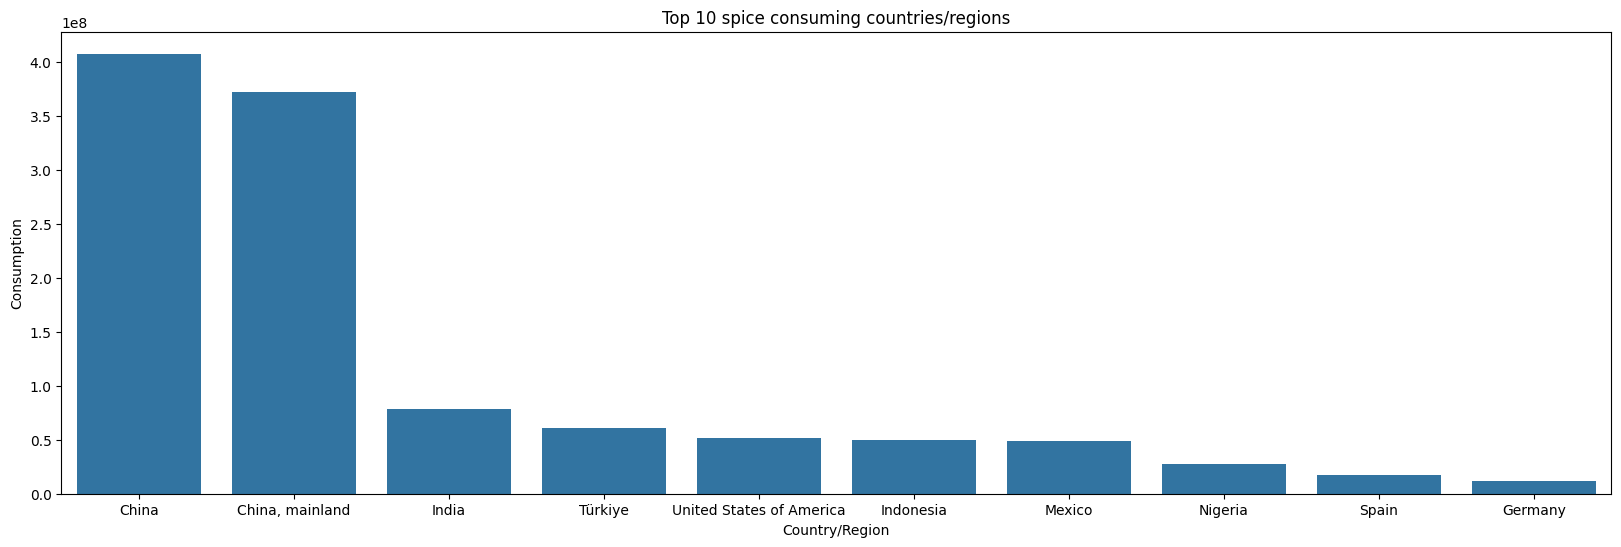

In [ ]:
#Top 10 spice consuming countries
top_10_consuming_areas = data.groupby('Area')['Consumption'].sum().sort_values(ascending=False)
print(top_10_consuming_areas.head(10))

#Visualizing the data
plt.figure(figsize=(20,6))
sns.barplot(x=top_10_consuming_areas.index[:10], y=top_10_consuming_areas.values[:10])
plt.title('Top 10 spice consuming countries/regions')
plt.xlabel('Country/Region')
plt.ylabel('Consumption')
plt.show()

##**Check for the countries with the highest spice consumption**

China is the country with the highest spice consumption of a whooping 407,480,200 tonnes.

Area
Niue                        8.49
Tuvalu                     32.31
Nauru                      84.03
Solomon Islands           150.16
Kiribati                  192.82
Cook Islands              296.40
Equatorial Guinea         347.85
Eritrea                   732.85
Sao Tome and Principe     776.12
Chad                     1276.02
Name: Consumption, dtype: float64


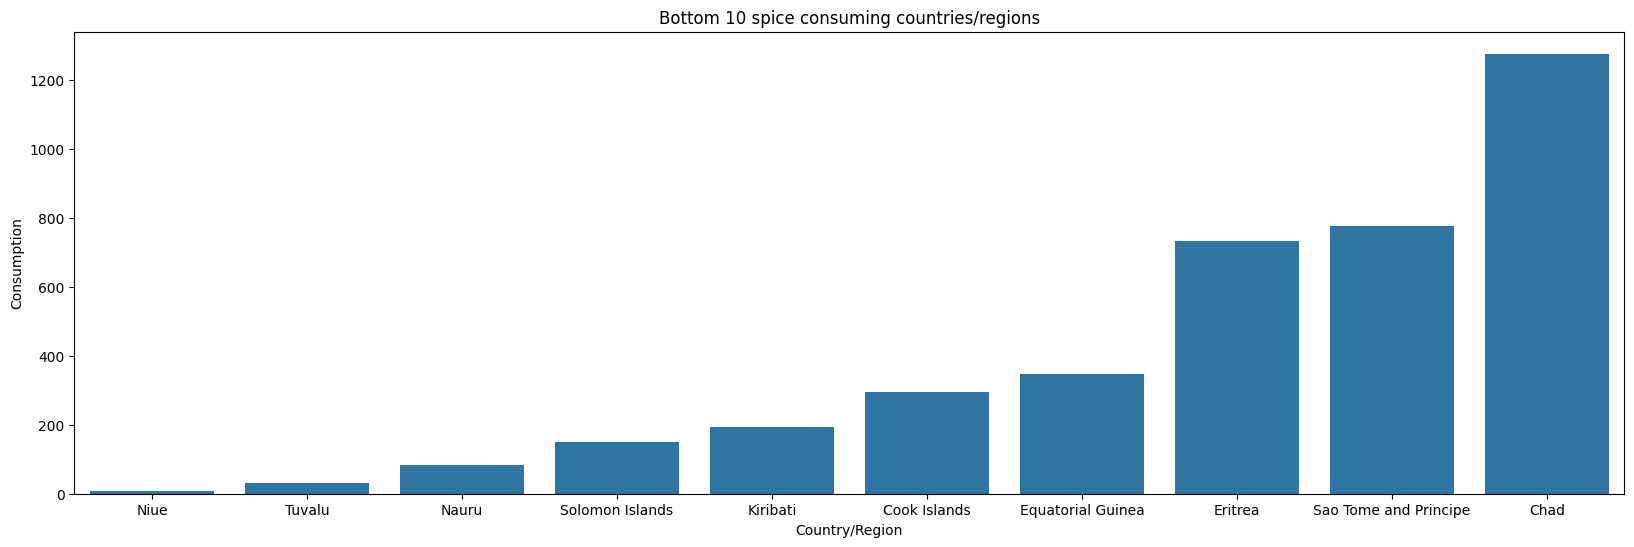

In [ ]:
#Bottom 10 spice consuming countries
bottom_10_consuming_areas = data.groupby('Area')['Consumption'].sum().sort_values(ascending=True)
print(bottom_10_consuming_areas[4:14])

#Visualizing the data
plt.figure(figsize=(20,6))
sns.barplot(x=bottom_10_consuming_areas.index[4:14], y=bottom_10_consuming_areas.values[4:14])
plt.title('Bottom 10 spice consuming countries/regions')
plt.xlabel('Country/Region')
plt.ylabel('Consumption')
plt.show()

##**Check for the countries with the lowest spice consumption**

Niue is the country with the lowest spice consumption of just 8.49 tonnes.

Area
China                       4.207289e+08
China, mainland             3.855042e+08
India                       8.867536e+07
Mexico                      6.814656e+07
Türkiye                     6.296945e+07
Indonesia                   5.194429e+07
Spain                       3.333206e+07
Nigeria                     2.778293e+07
United States of America    2.498321e+07
Thailand                    1.094662e+07
Name: Production, dtype: float64


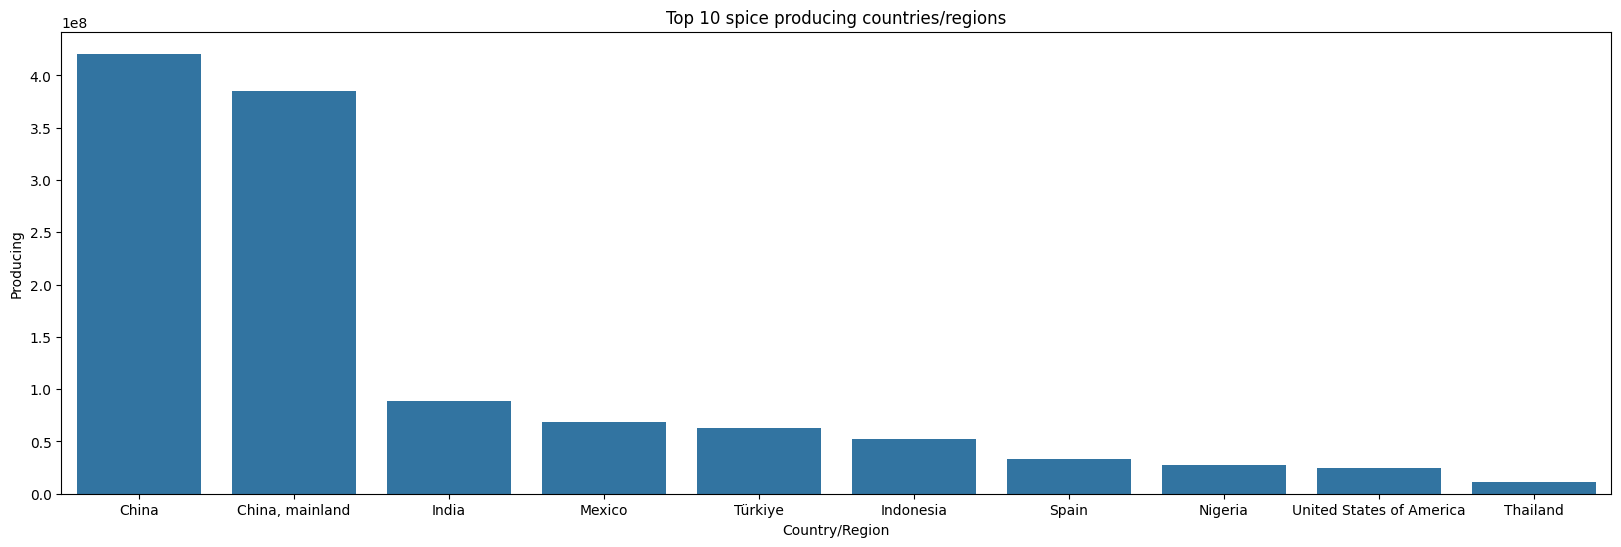

In [ ]:
#Top 10 spice producing countries
top_10_producing_areas = data.groupby('Area')['Production'].sum().sort_values(ascending=False)
print(top_10_producing_areas.head(10))

#Visualizing the data
plt.figure(figsize=(20,6))
sns.barplot(x=top_10_producing_areas.index[:10], y=top_10_producing_areas.values[:10])
plt.title('Top 10 spice producing countries/regions')
plt.xlabel('Country/Region')
plt.ylabel('Producing')
plt.show()


##**Check for the countries with the highest spice production**

China is the country with the highest spice production of a whooping 420,728,900 tonnes.

Area
Angola                         0.00
Armenia                        0.00
Belarus                        0.00
Bahamas                        0.00
Burundi                        0.00
Botswana                       0.00
China, Hong Kong SAR           0.00
Chad                           0.00
Eritrea                        0.00
Estonia                        0.00
Eswatini                       0.00
Equatorial Guinea              0.00
Congo                          0.00
Guinea                         0.00
Gambia                         0.00
Nauru                          0.00
Kiribati                       0.00
Liberia                        0.00
Lesotho                        0.00
Latvia                         0.00
Luxembourg                     0.00
Mozambique                     0.00
Mauritania                     0.00
Malta                          0.00
Mongolia                       0.00
New Caledonia                  0.00
Haiti                          0.00
Iceland                

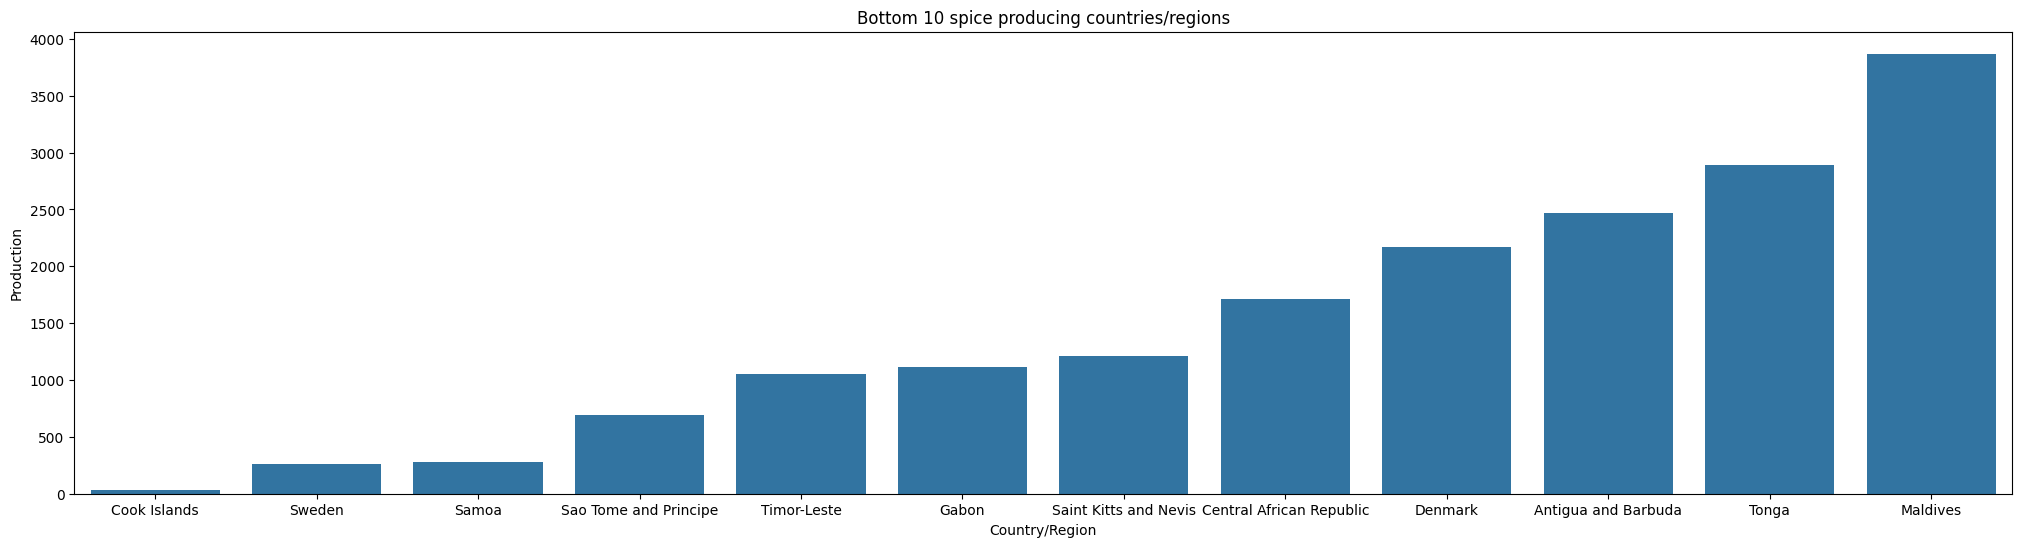

In [ ]:
#Bottom 10 spice producing countries
bottom_10_producing_areas = data.groupby('Area')['Production'].sum().sort_values(ascending=True)
print(bottom_10_producing_areas.head(50))

#Visualizing the data
plt.figure(figsize=(25,6))
sns.barplot(x=bottom_10_producing_areas.index[38:50], y=bottom_10_producing_areas.values[38:50])
plt.title('Bottom 10 spice producing countries/regions')
plt.xlabel('Country/Region')
plt.ylabel('Production')
plt.show()

##**Check for the countries with the lowest spice production**

* There are 38 countries/regions that have not recorded even a single tonne of spice production, namely : *Angola,
Armenia, Belarus, Bahamas, Burundi, Botswana, China, Hong Kong SAR, Chad, Eritrea, Estonia,  Eswatini, Equatorial Guinea, Congo, Guinea, Gambia, Nauru, Kiribati, Liberia, Lesotho, Latvia, Luxembourg, Mozambique, Mauritania, Malta, Mongolia, New Caledonia, Haiti, Iceland, Guinea Bissau, Faroe Islands, Norway, Niue, Singapore, Solomon Islands, Somalia, Suriname, Tuvalu and Turkmenistan*

* Among the countries that recorded at least a tonne of spice production, Cook Islands is the country that recorded the lowest spice production that sums up to only 35.21 tonnes.

Area
Mexico                      20435119.43
Spain                       18059759.63
China                       16050728.41
China, mainland             15591500.48
India                       13561481.59
Netherlands                 12609004.08
Indonesia                    4095373.18
Viet Nam                     3775880.23
United States of America     3613161.68
Canada                       2834218.43
Name: Export , dtype: float64


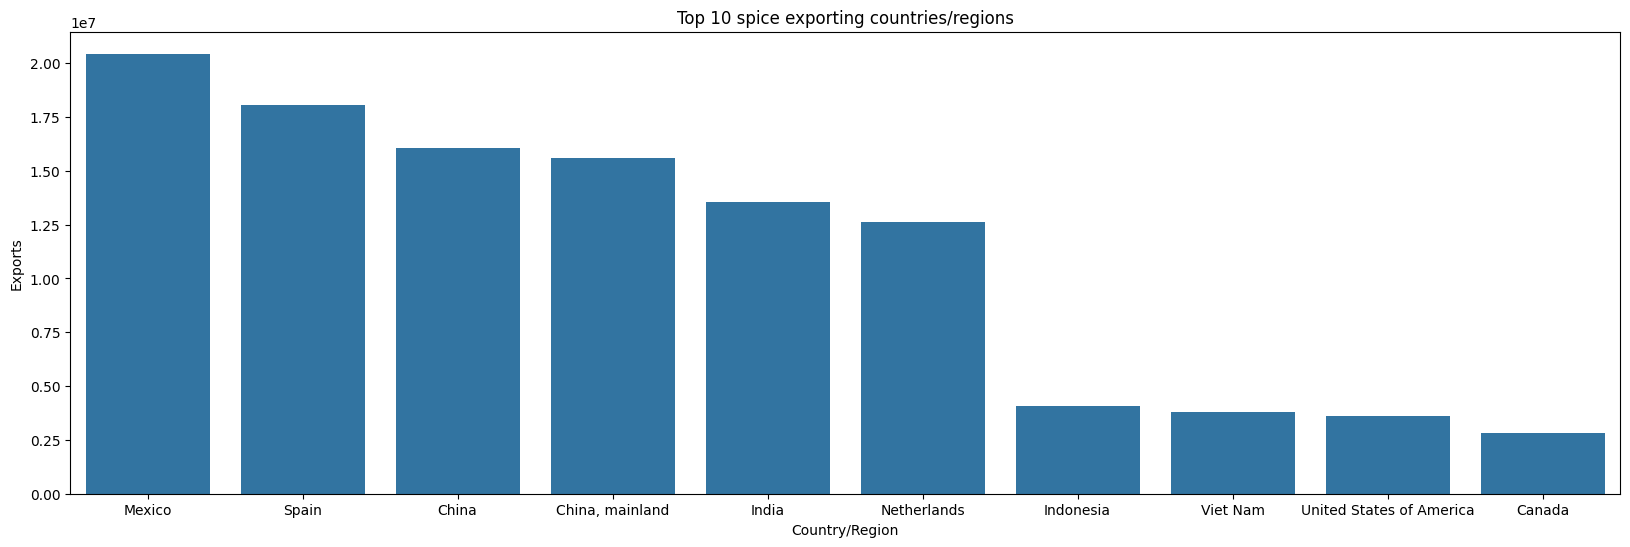

In [ ]:
#Top 10 spice exporting countries
top_10_exporting_areas = data.groupby('Area')['Export '].sum().sort_values(ascending=False)
print(top_10_exporting_areas.head(10))

#Visualizing the data
plt.figure(figsize=(20,6))
sns.barplot(x=top_10_exporting_areas.index[:10], y=top_10_exporting_areas.values[:10])
plt.title('Top 10 spice exporting countries/regions')
plt.xlabel('Country/Region')
plt.ylabel('Exports')
plt.show()

##**Check for the countries with the highest spice exports**

* Mexico is the country with the highest amount of spice exports having exported 20, 435, 119.43 tonnes of spice.

Area
Kiribati           0.00
Nauru              0.00
Tuvalu             0.00
Niue               0.00
Solomon Islands    0.17
Cabo Verde         0.99
Samoa              1.21
Faroe Islands      1.52
South Sudan        2.61
Maldives           4.37
Name: Export , dtype: float64


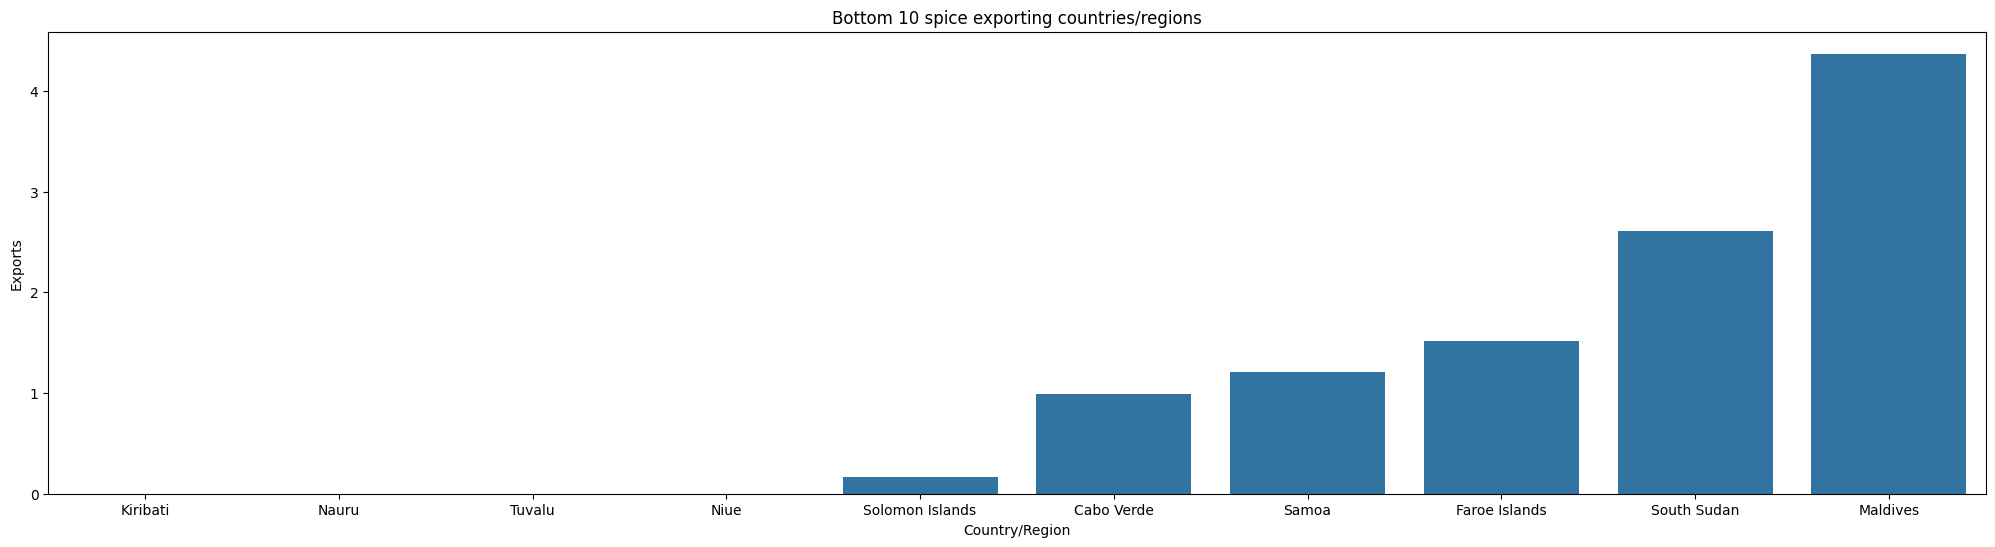

In [ ]:
#Bottom 10 spice exporting countries
bottom_10_exporting_areas = data.groupby('Area')['Export '].sum().sort_values(ascending=True)
print(bottom_10_exporting_areas.head(10))

#Visualizing the data
plt.figure(figsize=(25,6))
sns.barplot(x=bottom_10_exporting_areas.index[0:10], y=bottom_10_exporting_areas.values[0:10])
plt.title('Bottom 10 spice exporting countries/regions')
plt.xlabel('Country/Region')
plt.ylabel('Exports')
plt.show()

##**Check for the countries with the lowest spice exports**

* There are 4 countries that did not record any exports of spice, namely: *Kiribati, Nauru, Tuvalu and Niue*
* Solomon Islands and Cabo Verde recorded exports that are less than 1 tonne, that is 0.17 and 0.99 tonnes respectively.

Area
United States of America    29791513.00
Germany                     12305845.31
UK & Northern Ireland        6032582.14
Netherlands                  4869270.77
France                       4840979.49
Canada                       4210866.95
Malaysia                     4185798.17
Japan                        4044886.92
United Arab Emirates         3404445.85
Russian Federation           3064618.20
Name: Import, dtype: float64


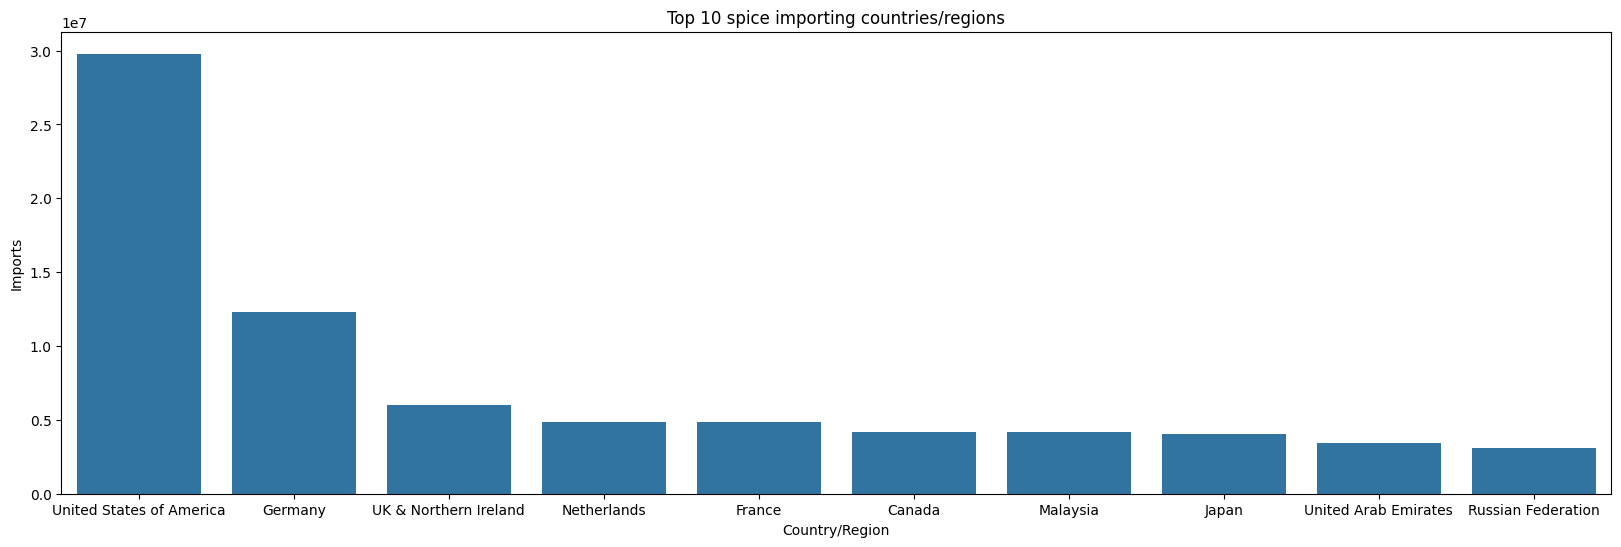

In [ ]:
#Top 10 spice importing countries
top_10_importing_areas = data.groupby('Area')['Import'].sum().sort_values(ascending=False)
print(top_10_importing_areas.head(10))

#Visualizing the data
plt.figure(figsize=(20,6))
sns.barplot(x=top_10_importing_areas.index[:10], y=top_10_importing_areas.values[:10])
plt.title('Top 10 spice importing countries/regions')
plt.xlabel('Country/Region')
plt.ylabel('Imports')
plt.show()

##**Check for the countries with the highest spice imports from the year 1993 to the year 2023**
* United States of America is the country wich recorded the highest amounts of spice imports with a total of 29, 791, 513 tonnes of spice, followed by Germany with 12, 305, 845.31 tonnes of spice, then UK & Northern Ireland with 6, 032, 582.14 tonnes of spice.

Area
Niue                       8.49
Tuvalu                    32.31
Nauru                     84.03
Guinea-Bissau            100.49
Solomon Islands          150.33
Kiribati                 192.82
Sao Tome and Principe    244.14
Cook Islands             297.16
Vanuatu                  383.79
Tonga                    437.09
Name: Import, dtype: float64


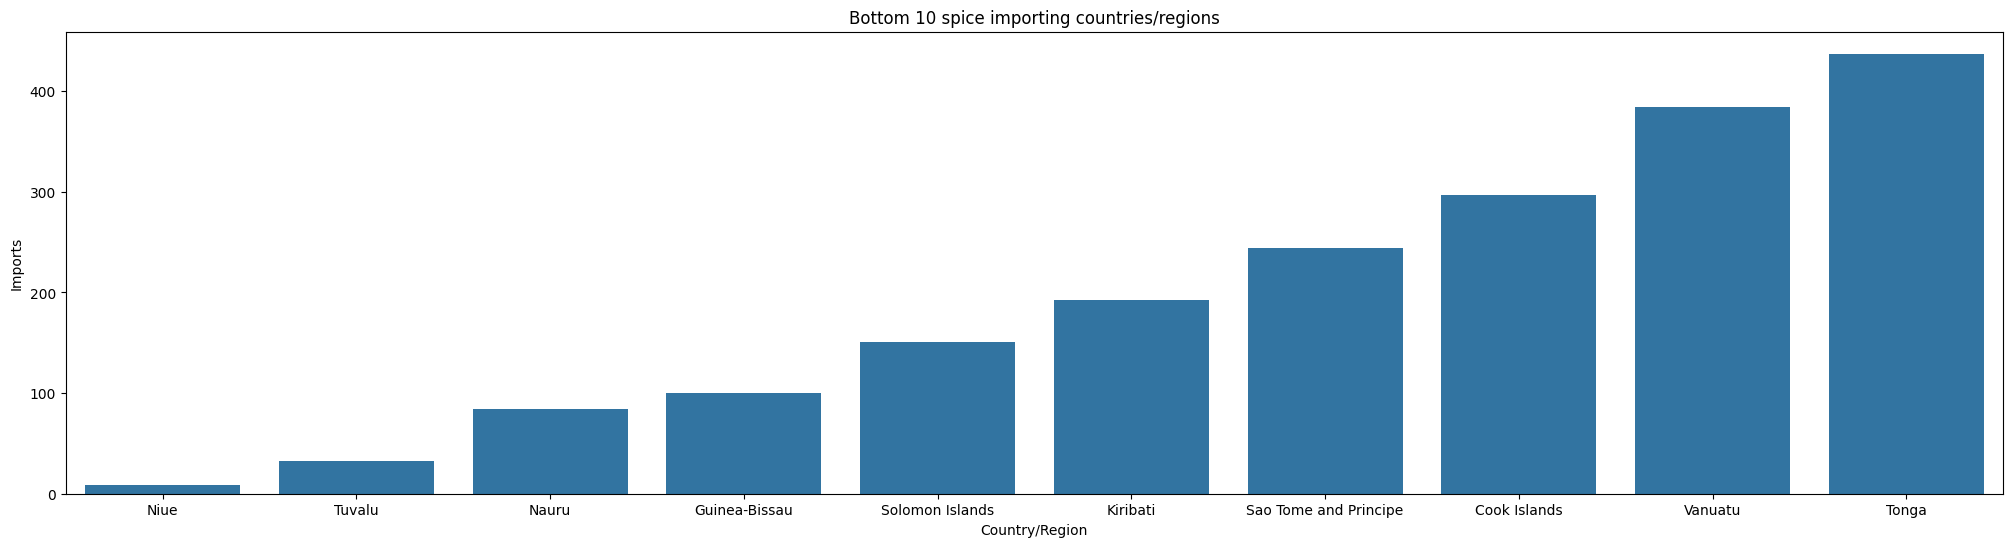

In [ ]:
#Bottom 10 spice importing countries
bottom_10_importing_areas = data.groupby('Area')['Import'].sum().sort_values(ascending=True)
print(bottom_10_importing_areas.head(10))

#Visualizing the data
plt.figure(figsize=(25,6))
sns.barplot(x=bottom_10_importing_areas.index[0:10], y=bottom_10_importing_areas.values[0:10])
plt.title('Bottom 10 spice importing countries/regions')
plt.xlabel('Country/Region')
plt.ylabel('Imports')
plt.show()

##**Check for the countries with the lowest spice imports from the year 1993 to the year 2023**

* Niue is the country with the least amount of spice imports recorded with a total of only 8.49 tonnes of spice imports recorded, followed by Tuvalu with 32.31 tonnes of spice imports recorded, then Nauru with 84.03 tonnes of spice imports recorded.

Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw
                           Area  \
84                        India   
115                      Mexico   
185                     Türkiye   
35                        China   
39              China, mainland   
86   Iran (Islamic Republic of)   
118                     Morocco   
190    United States of America   
57                        Egypt   
85                    Indonesia   

                                                  Item  Consumption  
84   Anise, badian, coriander, cumin, caraway, fenn...  16158935.47  
115  Anise, badian, coriander, cumin, caraway, fenn...   1971988.18  
185  Anise, badian, coriander, cumin, caraway, fenn...   1888516.20  
35   Anise, badian, coriander, cumin, caraway, fenn...   1331364.47  
39   Anise, badian, coriander, cumin, caraway, fenn...   1282820.55  
86   Anise, badian, coriander, cumin, caraway, fenn...    818563.64  
118  Anise, badian, coriander, cumin, caraway, fen

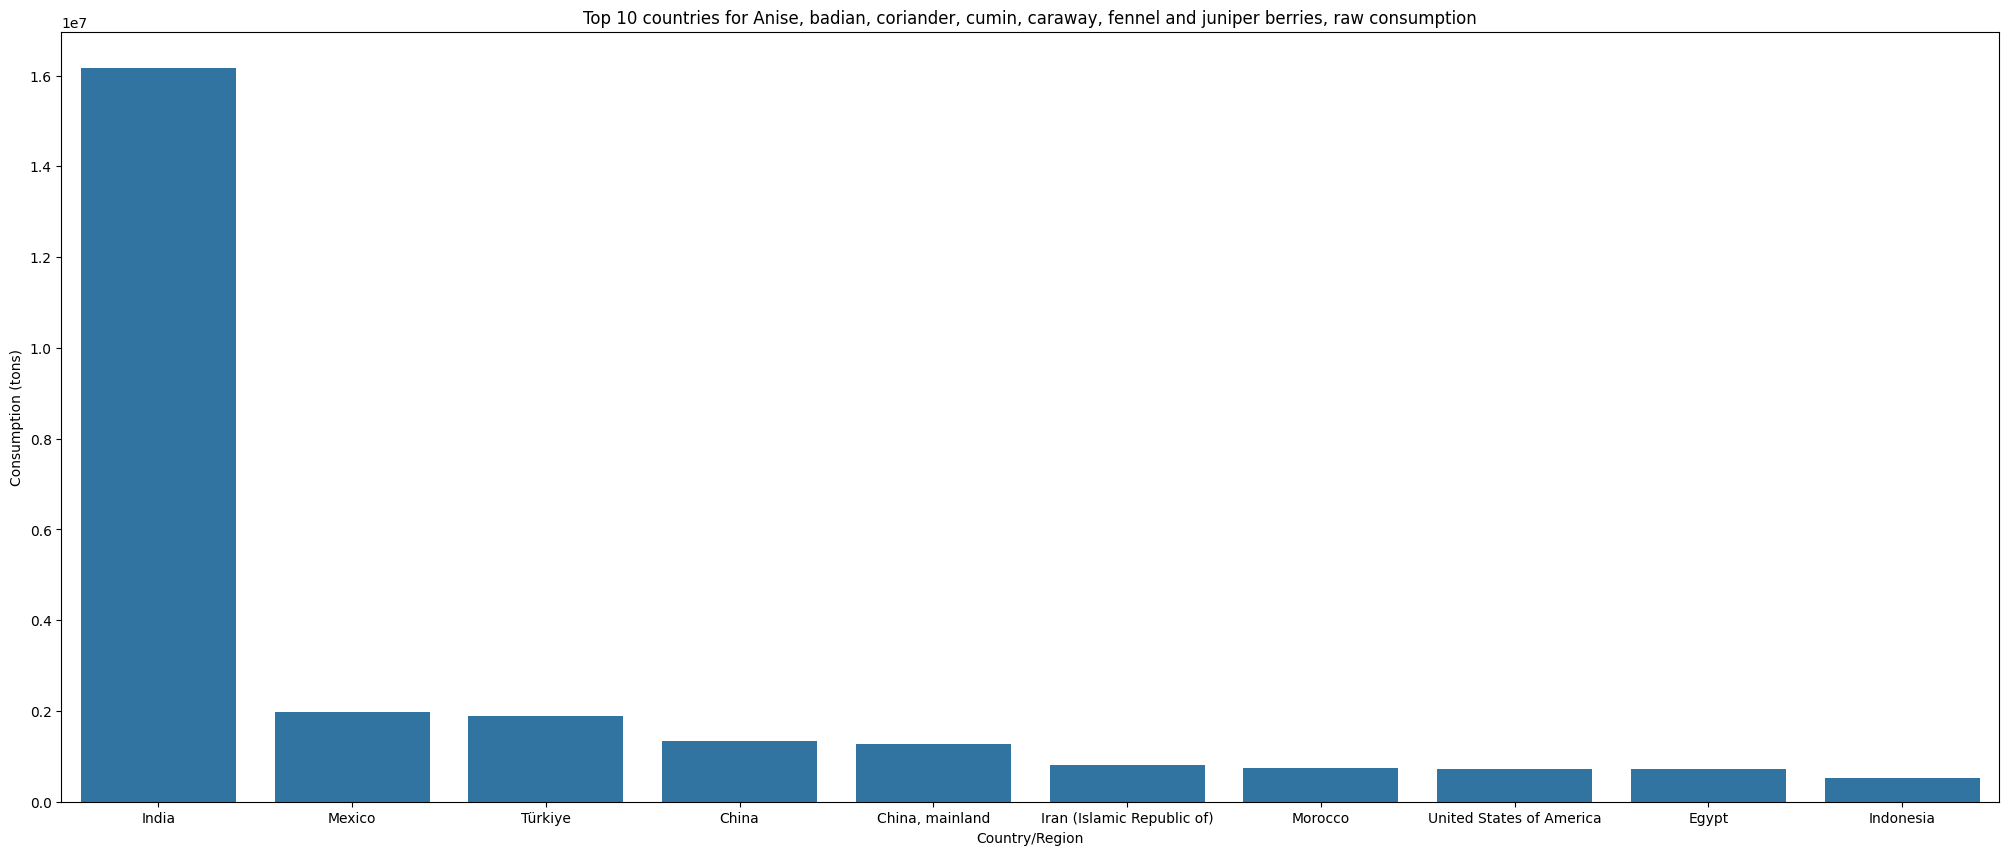

Chillies and peppers, dry (Capsicum spp., Pimenta spp.), raw
                         Area  \
84                      India   
177                  Thailand   
12                 Bangladesh   
35                      China   
39            China, mainland   
63                   Ethiopia   
134                  Pakistan   
190  United States of America   
49              Côte d'Ivoire   
73                      Ghana   

                                                  Item  Consumption  
84   Chillies and peppers, dry (Capsicum spp., Pime...  35265845.06  
177  Chillies and peppers, dry (Capsicum spp., Pime...   6938842.96  
12   Chillies and peppers, dry (Capsicum spp., Pime...   5670927.96  
35   Chillies and peppers, dry (Capsicum spp., Pime...   5425010.51  
39   Chillies and peppers, dry (Capsicum spp., Pime...   5320653.85  
63   Chillies and peppers, dry (Capsicum spp., Pime...   4933009.15  
134  Chillies and peppers, dry (Capsicum spp., Pime...   4037778.96  
190  Chillies a

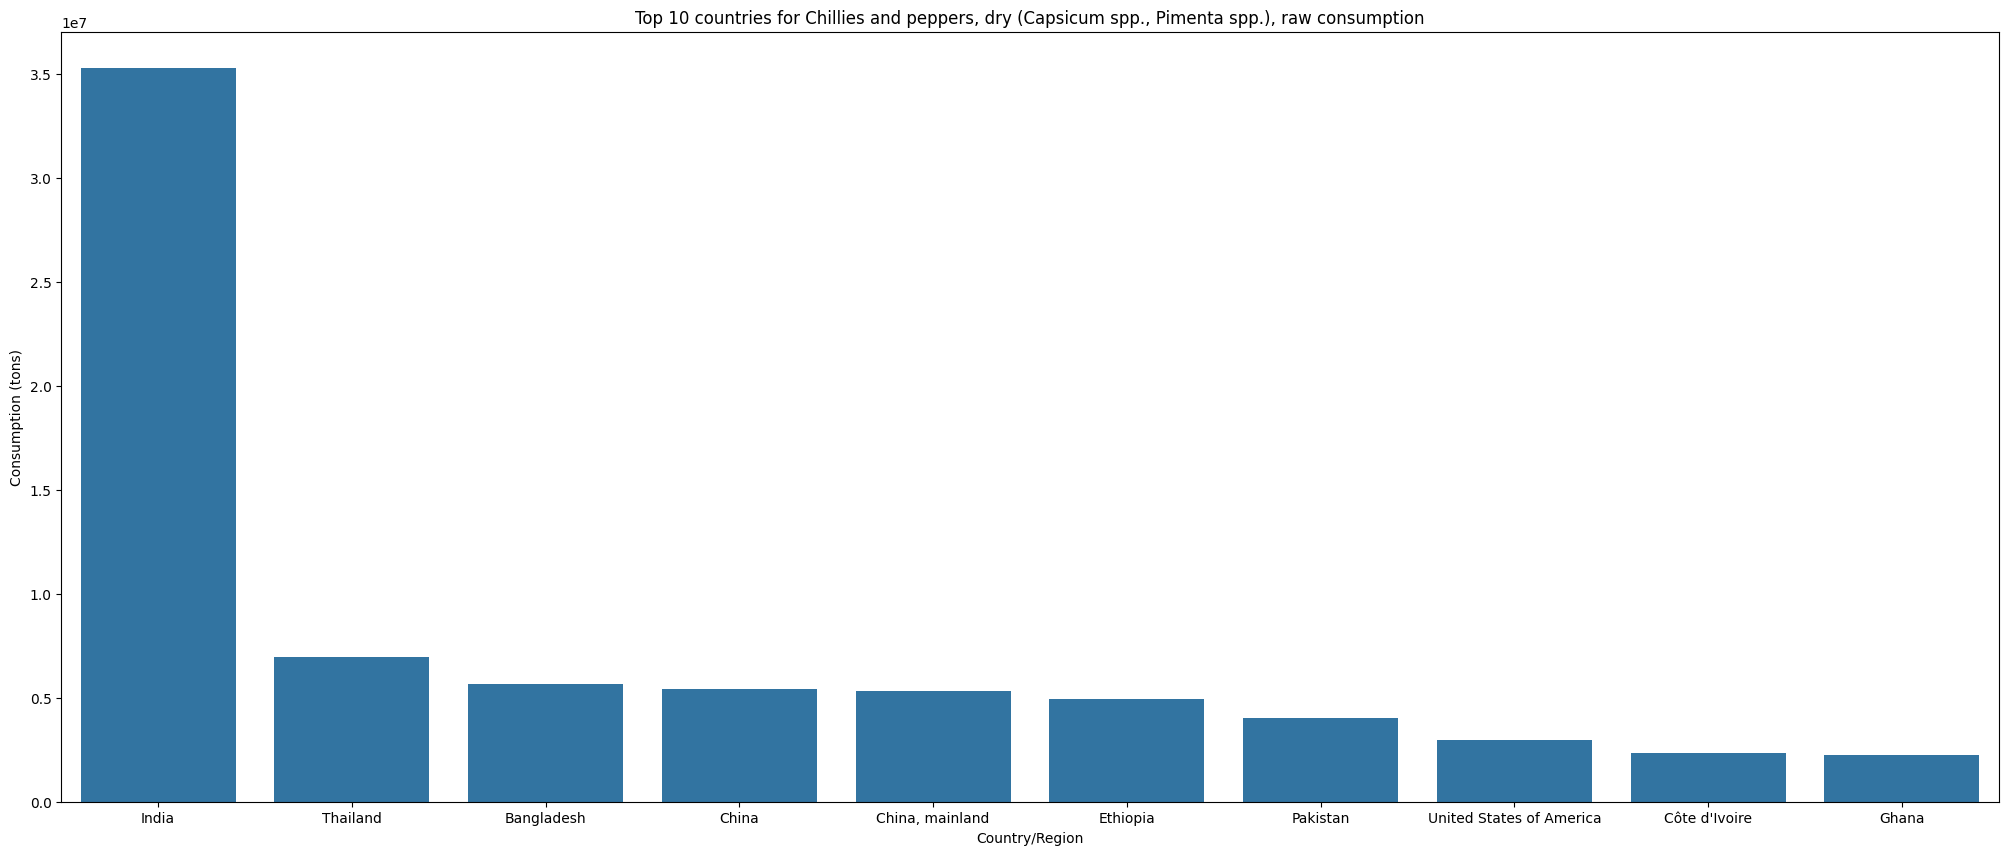

Chillies and peppers, green (Capsicum spp. and Pimenta spp.)
                         Area  \
35                      China   
39            China, mainland   
184                   Türkiye   
115                    Mexico   
189  United States of America   
85                  Indonesia   
166                     Spain   
129                   Nigeria   
90                      Italy   
72                    Germany   

                                                  Item   Consumption  
35   Chillies and peppers, green (Capsicum spp. and...  3.956917e+08  
39   Chillies and peppers, green (Capsicum spp. and...  3.613872e+08  
184  Chillies and peppers, green (Capsicum spp. and...  5.806238e+07  
115  Chillies and peppers, green (Capsicum spp. and...  4.462060e+07  
189  Chillies and peppers, green (Capsicum spp. and...  4.328489e+07  
85   Chillies and peppers, green (Capsicum spp. and...  3.882600e+07  
166  Chillies and peppers, green (Capsicum spp. and...  1.736047e+07  
129  Ch

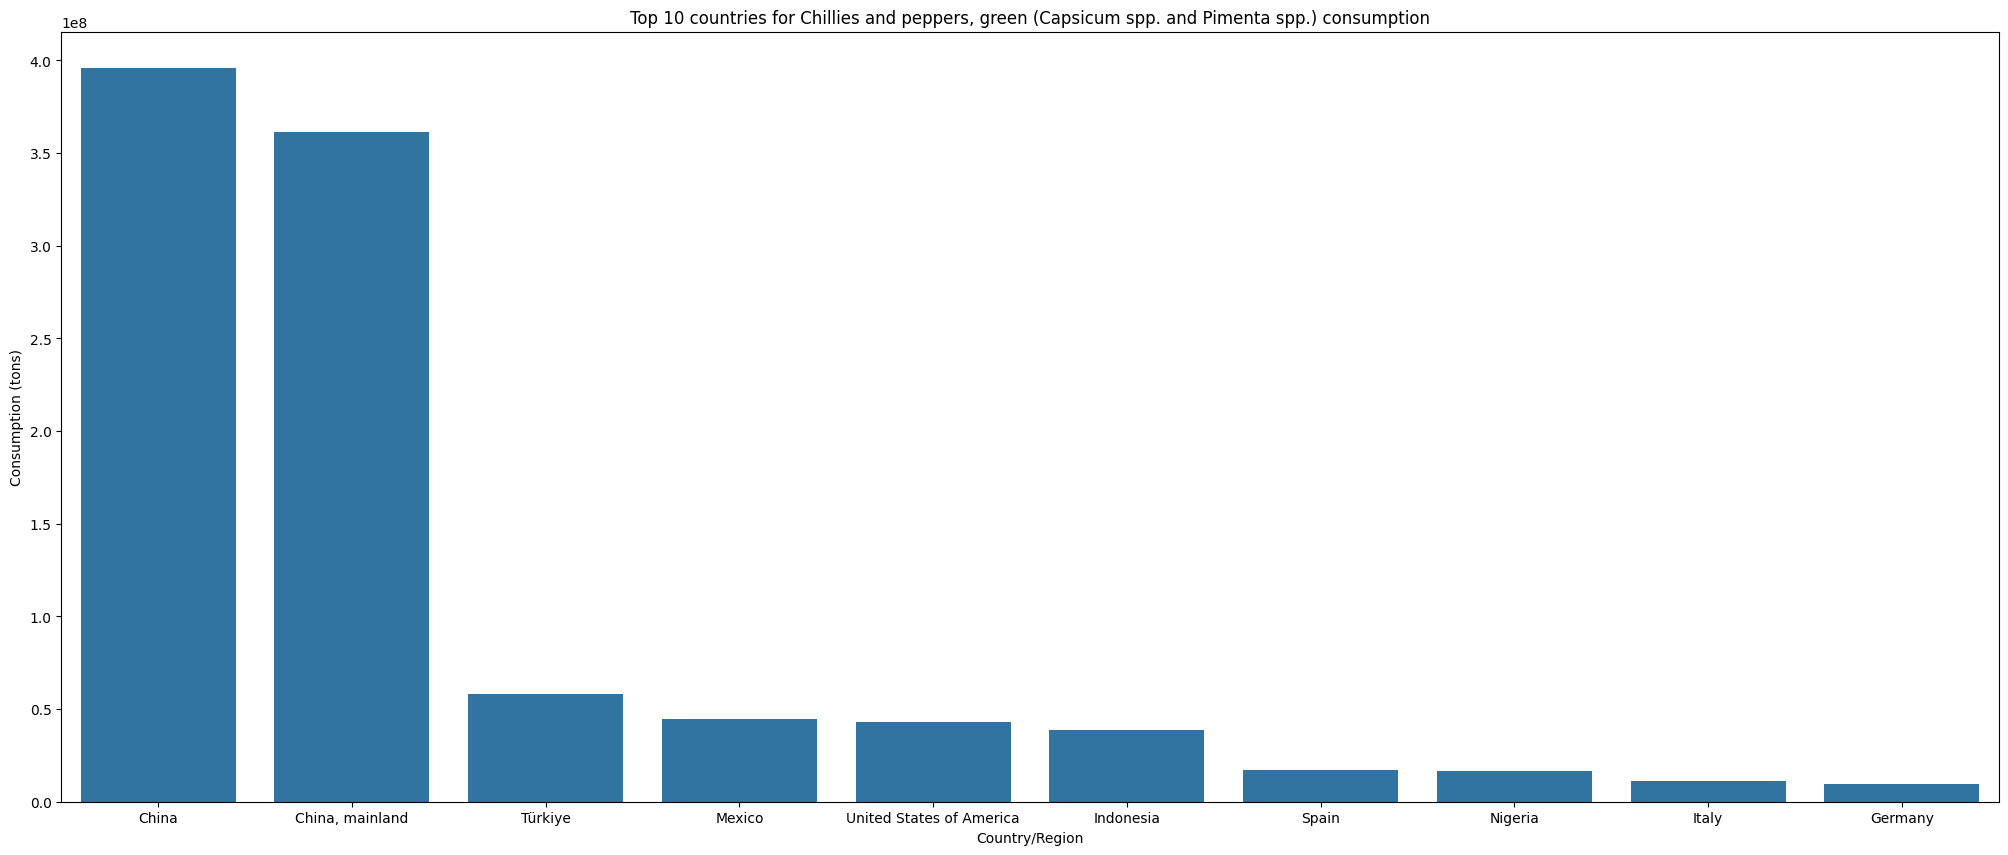

Cinnamon and cinnamon-tree flowers, raw
                         Area                                     Item  \
85                  Indonesia  Cinnamon and cinnamon-tree flowers, raw   
190  United States of America  Cinnamon and cinnamon-tree flowers, raw   
35                      China  Cinnamon and cinnamon-tree flowers, raw   
39            China, mainland  Cinnamon and cinnamon-tree flowers, raw   
84                      India  Cinnamon and cinnamon-tree flowers, raw   
115                    Mexico  Cinnamon and cinnamon-tree flowers, raw   
12                 Bangladesh  Cinnamon and cinnamon-tree flowers, raw   
168                 Sri Lanka  Cinnamon and cinnamon-tree flowers, raw   
154              Saudi Arabia  Cinnamon and cinnamon-tree flowers, raw   
134                  Pakistan  Cinnamon and cinnamon-tree flowers, raw   

     Consumption  
85    1012993.11  
190    664339.08  
35     606757.68  
39     554087.44  
84     520512.42  
115    194086.58  
12     18179

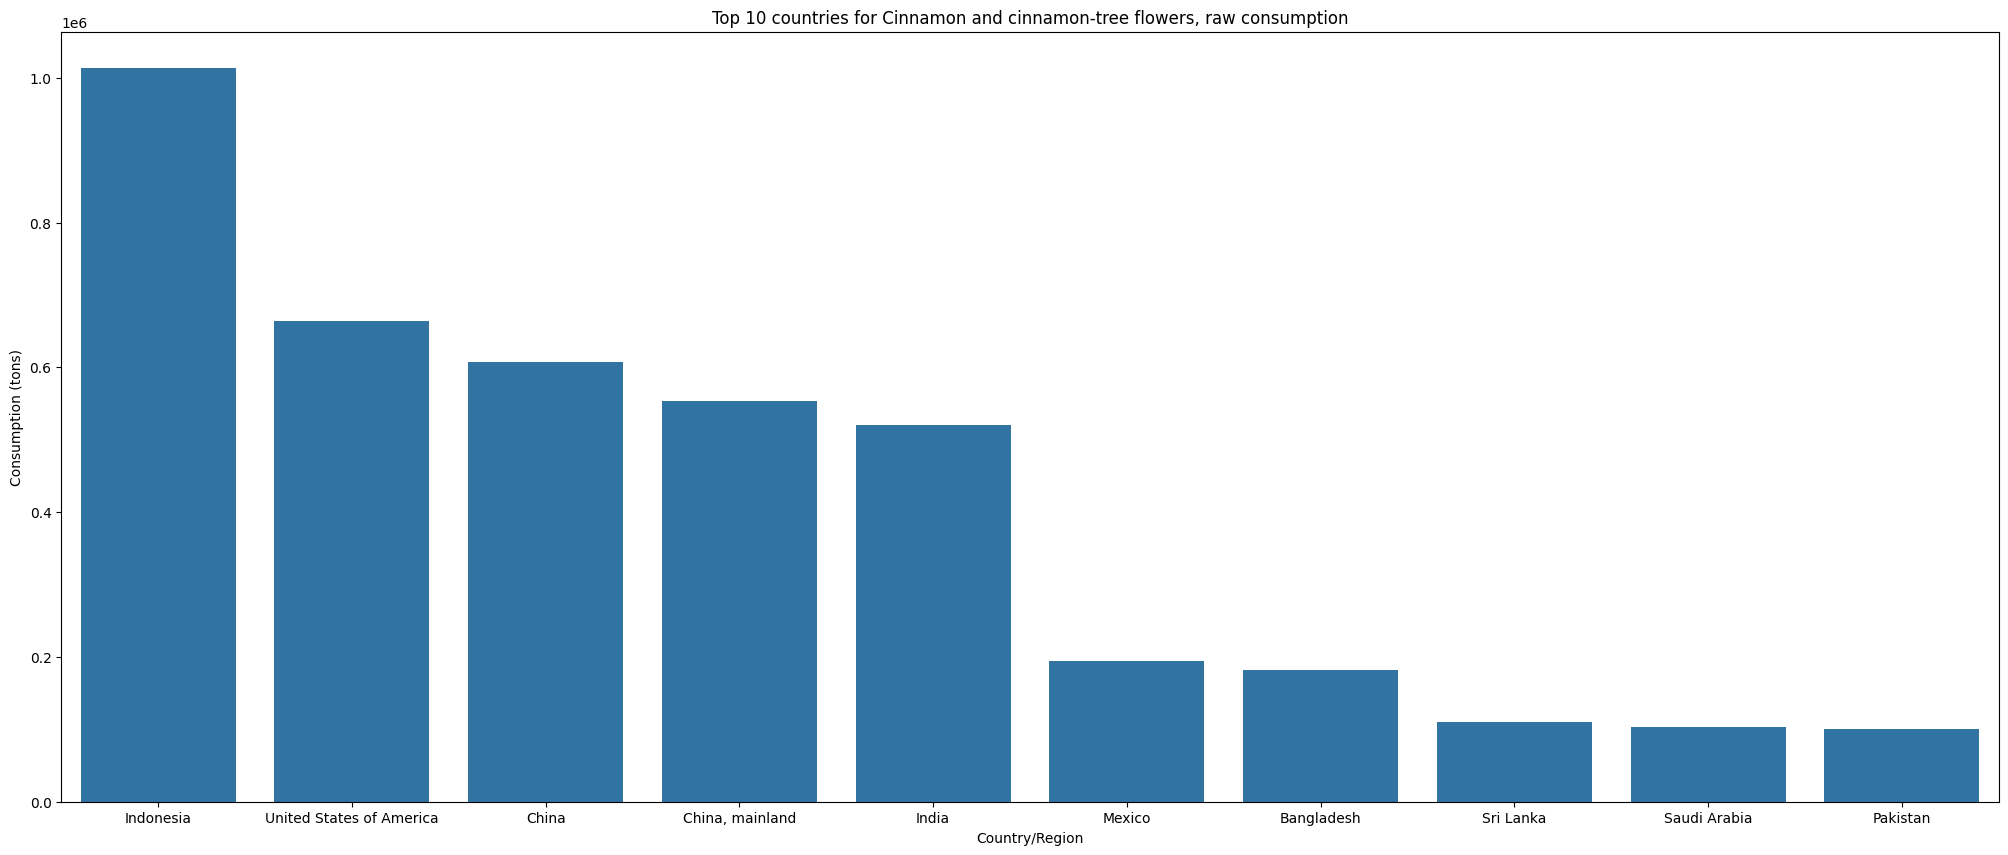

Cloves (whole stems), raw
                         Area                       Item  Consumption
85                  Indonesia  Cloves (whole stems), raw   2724090.42
84                      India  Cloves (whole stems), raw    373628.70
175                  Tanzania  Cloves (whole stems), raw    140974.99
35                      China  Cloves (whole stems), raw     58165.98
153              Saudi Arabia  Cloves (whole stems), raw     50286.09
39            China, mainland  Cloves (whole stems), raw     49196.07
108                  Malaysia  Cloves (whole stems), raw     42155.70
189  United States of America  Cloves (whole stems), raw     41440.68
133                  Pakistan  Cloves (whole stems), raw     38375.46
188      United Arab Emirates  Cloves (whole stems), raw     36561.72


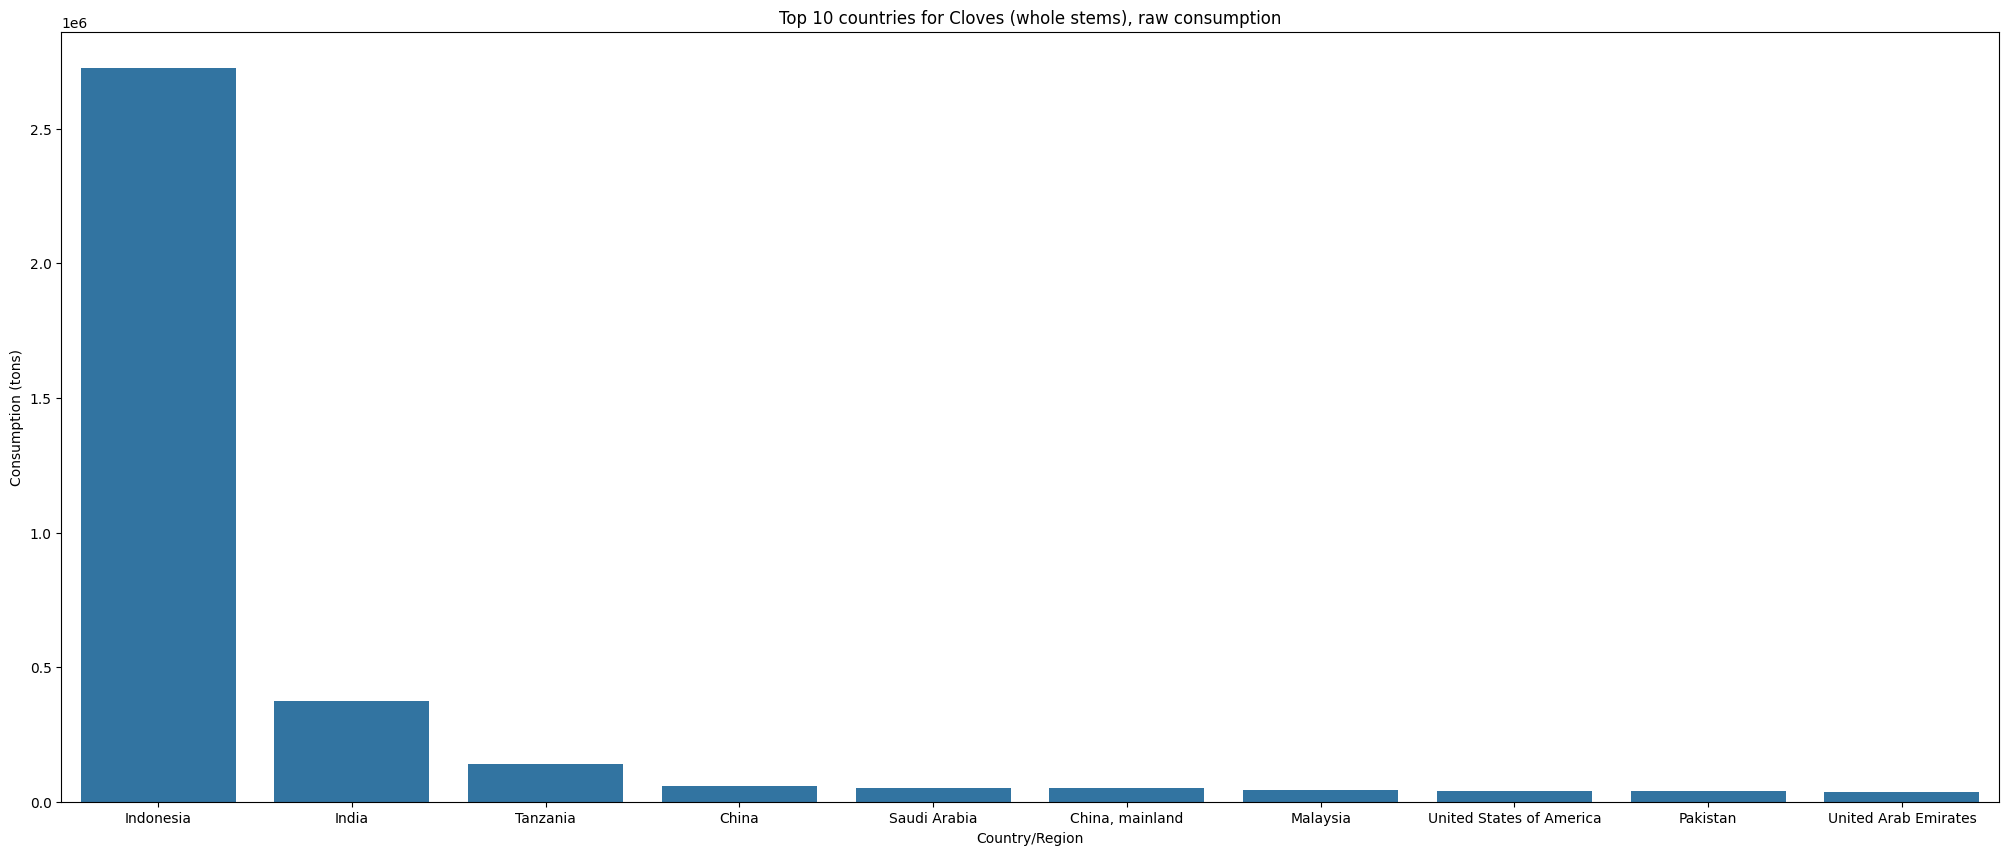

Ginger, raw
                         Area         Item  Consumption
84                      India  Ginger, raw  22751478.20
129                   Nigeria  Ginger, raw   9336528.75
123                     Nepal  Ginger, raw   5053175.51
85                  Indonesia  Ginger, raw   4390565.67
92                      Japan  Ginger, raw   3639335.73
177                  Thailand  Ginger, raw   3428358.42
35                      China  Ginger, raw   3310744.03
12                 Bangladesh  Ginger, raw   3230694.25
39            China, mainland  Ginger, raw   2403949.50
190  United States of America  Ginger, raw   1517524.26


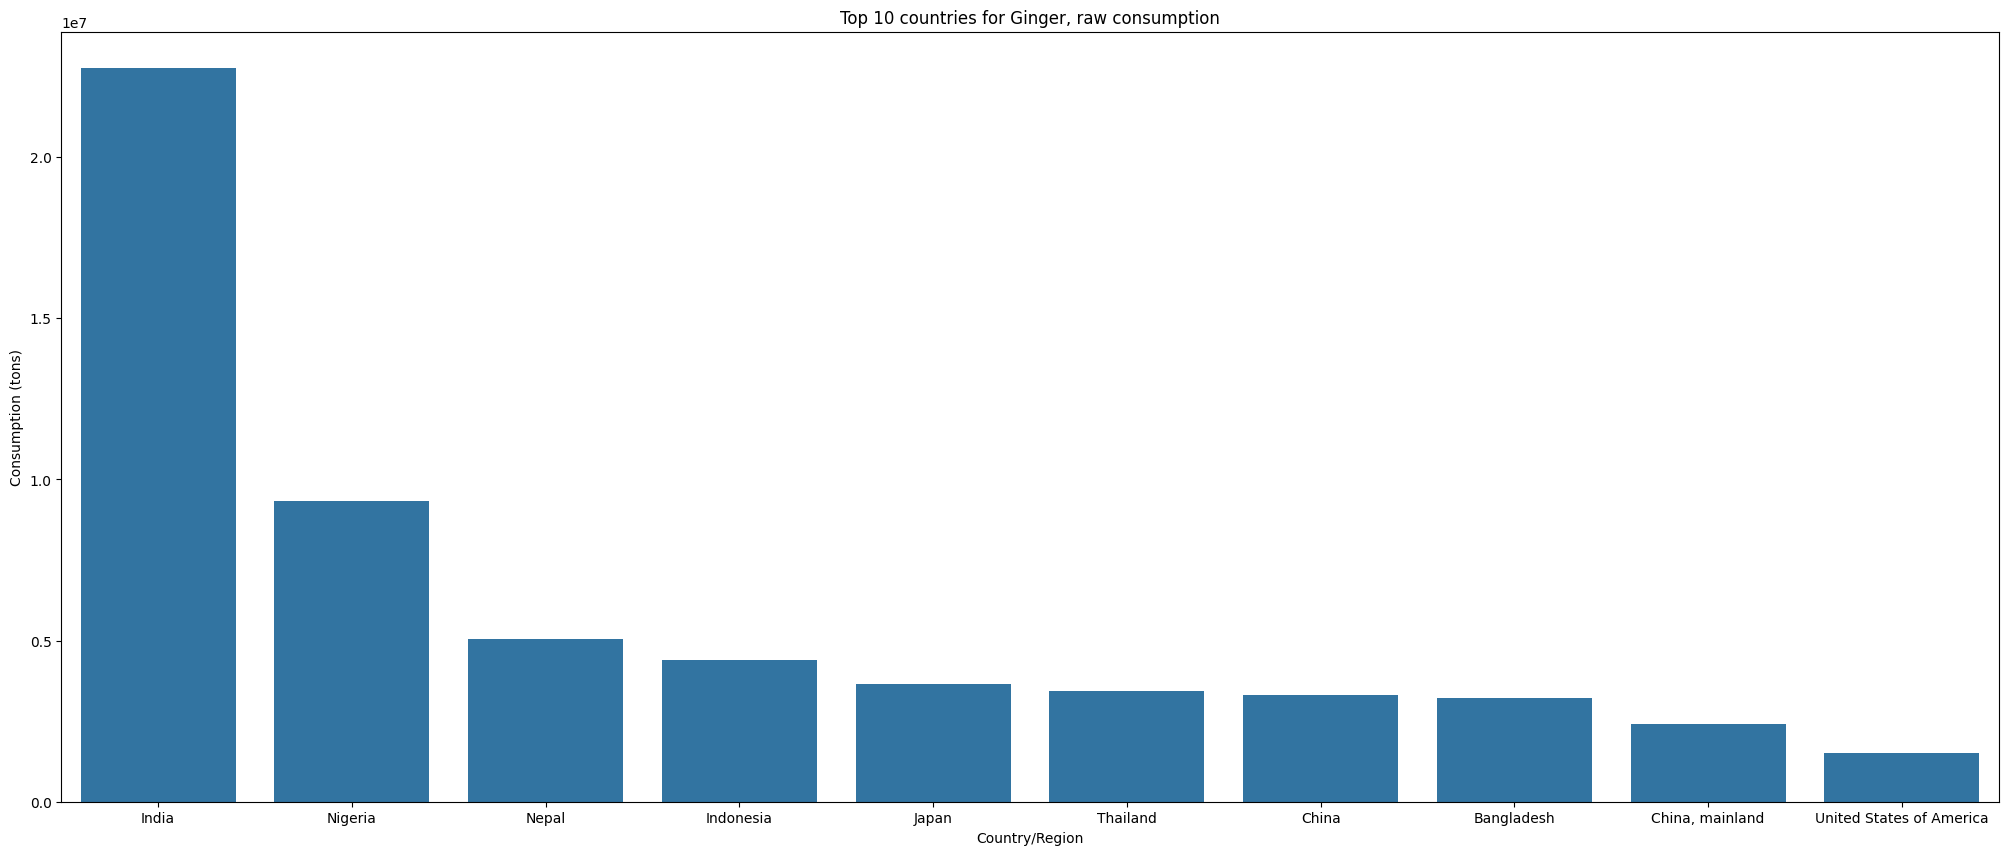

Nutmeg, mace, cardamoms, raw
                     Area                          Item  Consumption
83                  India  Nutmeg, mace, cardamoms, raw    705097.40
153          Saudi Arabia  Nutmeg, mace, cardamoms, raw    257325.34
84              Indonesia  Nutmeg, mace, cardamoms, raw    231772.71
194              Viet Nam  Nutmeg, mace, cardamoms, raw    110899.25
34                  China  Nutmeg, mace, cardamoms, raw    109376.23
188  United Arab Emirates  Nutmeg, mace, cardamoms, raw    107089.81
75              Guatemala  Nutmeg, mace, cardamoms, raw    106439.54
38        China, mainland  Nutmeg, mace, cardamoms, raw    101613.30
122                 Nepal  Nutmeg, mace, cardamoms, raw    100083.62
133              Pakistan  Nutmeg, mace, cardamoms, raw     86839.08


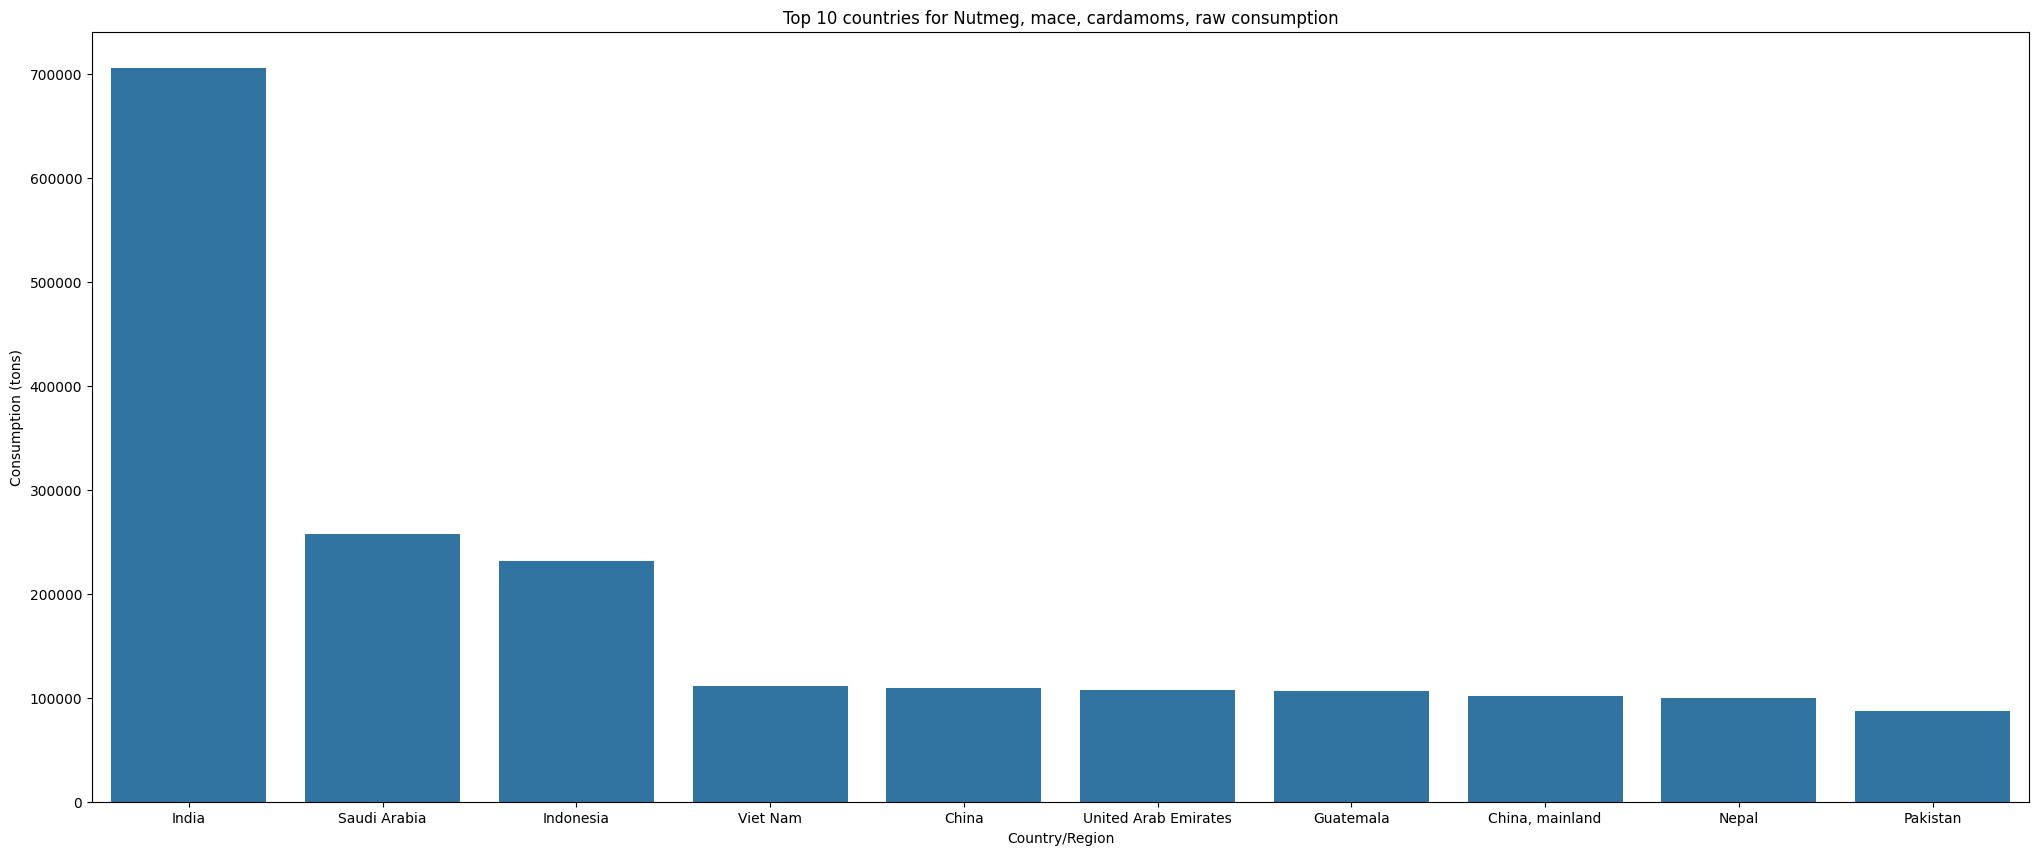

Pepper (Piper spp.), raw
                         Area                      Item  Consumption
190  United States of America  Pepper (Piper spp.), raw   1836254.92
84                      India  Pepper (Piper spp.), raw   1537946.89
85                  Indonesia  Pepper (Piper spp.), raw   1050600.59
35                      China  Pepper (Piper spp.), raw    926255.75
39            China, mainland  Pepper (Piper spp.), raw    813311.78
23                     Brazil  Pepper (Piper spp.), raw    682175.17
195                  Viet Nam  Pepper (Piper spp.), raw    581335.86
26               Burkina Faso  Pepper (Piper spp.), raw    565838.64
168                 Sri Lanka  Pepper (Piper spp.), raw    552861.56
72                    Germany  Pepper (Piper spp.), raw    483201.72


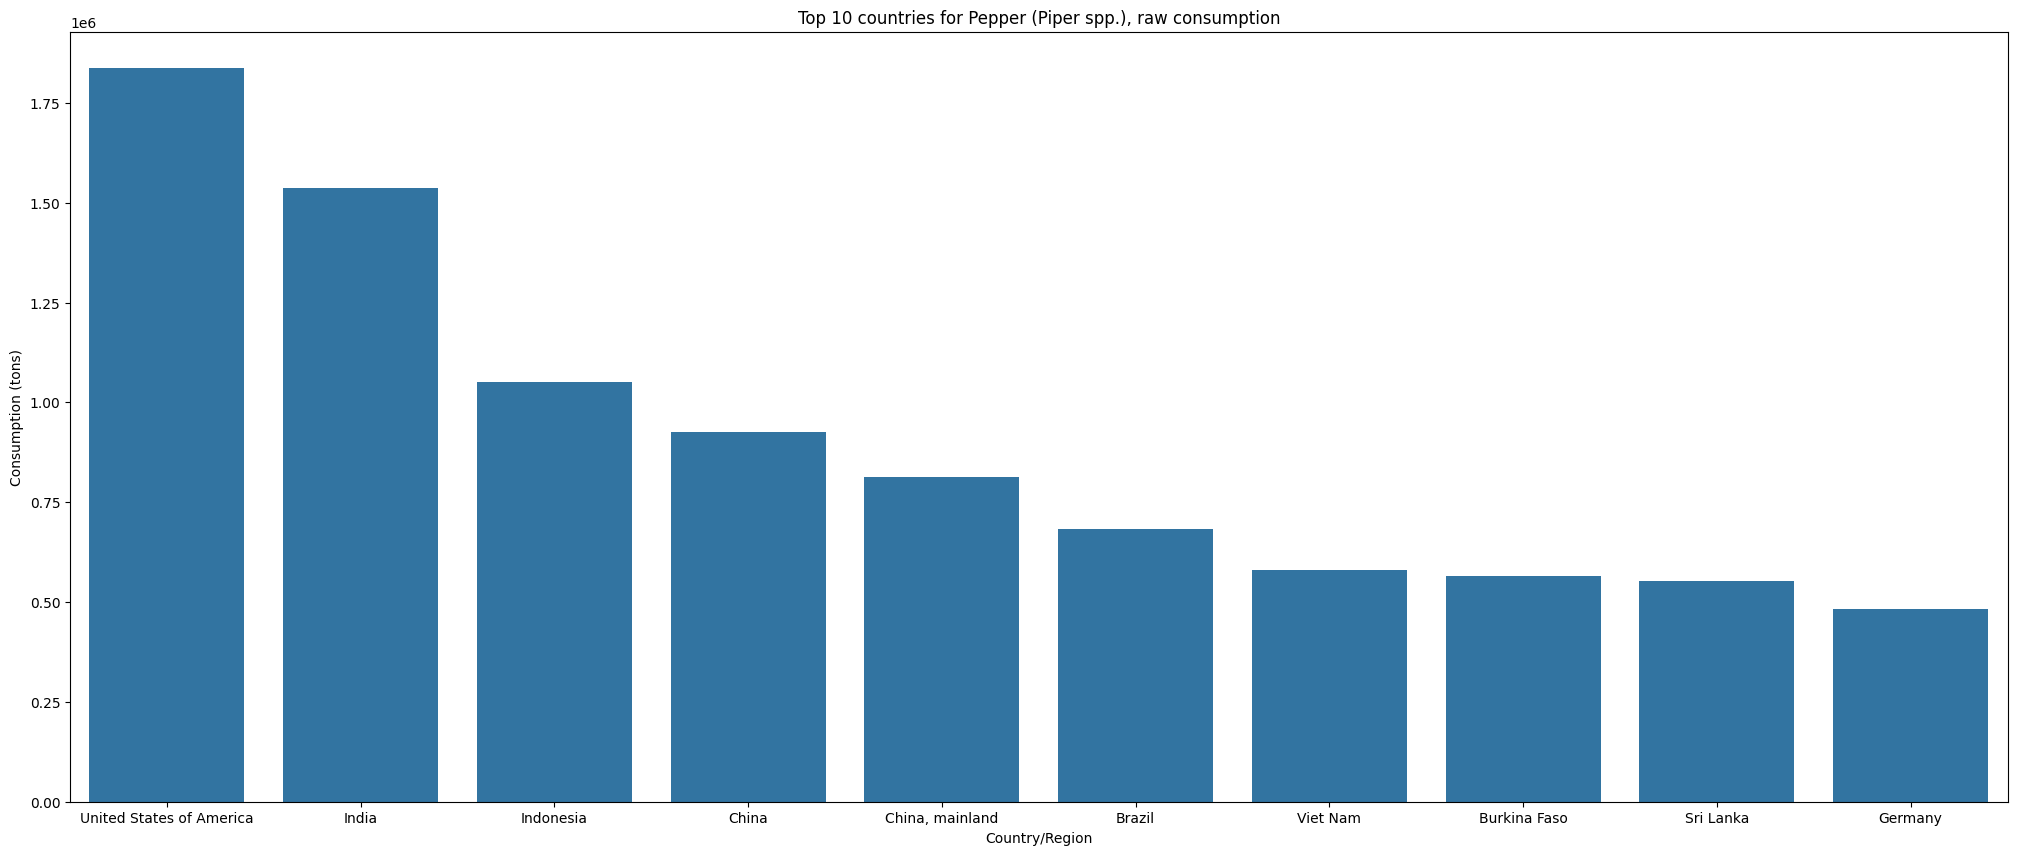

Vanilla, raw
                         Area          Item  Consumption
85                  Indonesia  Vanilla, raw     58413.92
188  United States of America  Vanilla, raw     41132.17
107                Madagascar  Vanilla, raw     21772.11
35                      China  Vanilla, raw     20872.82
39            China, mainland  Vanilla, raw     20798.29
67                     France  Vanilla, raw     11985.31
115                    Mexico  Vanilla, raw      9768.05
72                    Germany  Vanilla, raw      6389.25
184     UK & Northern Ireland  Vanilla, raw      6093.72
136          Papua New Guinea  Vanilla, raw      4147.86


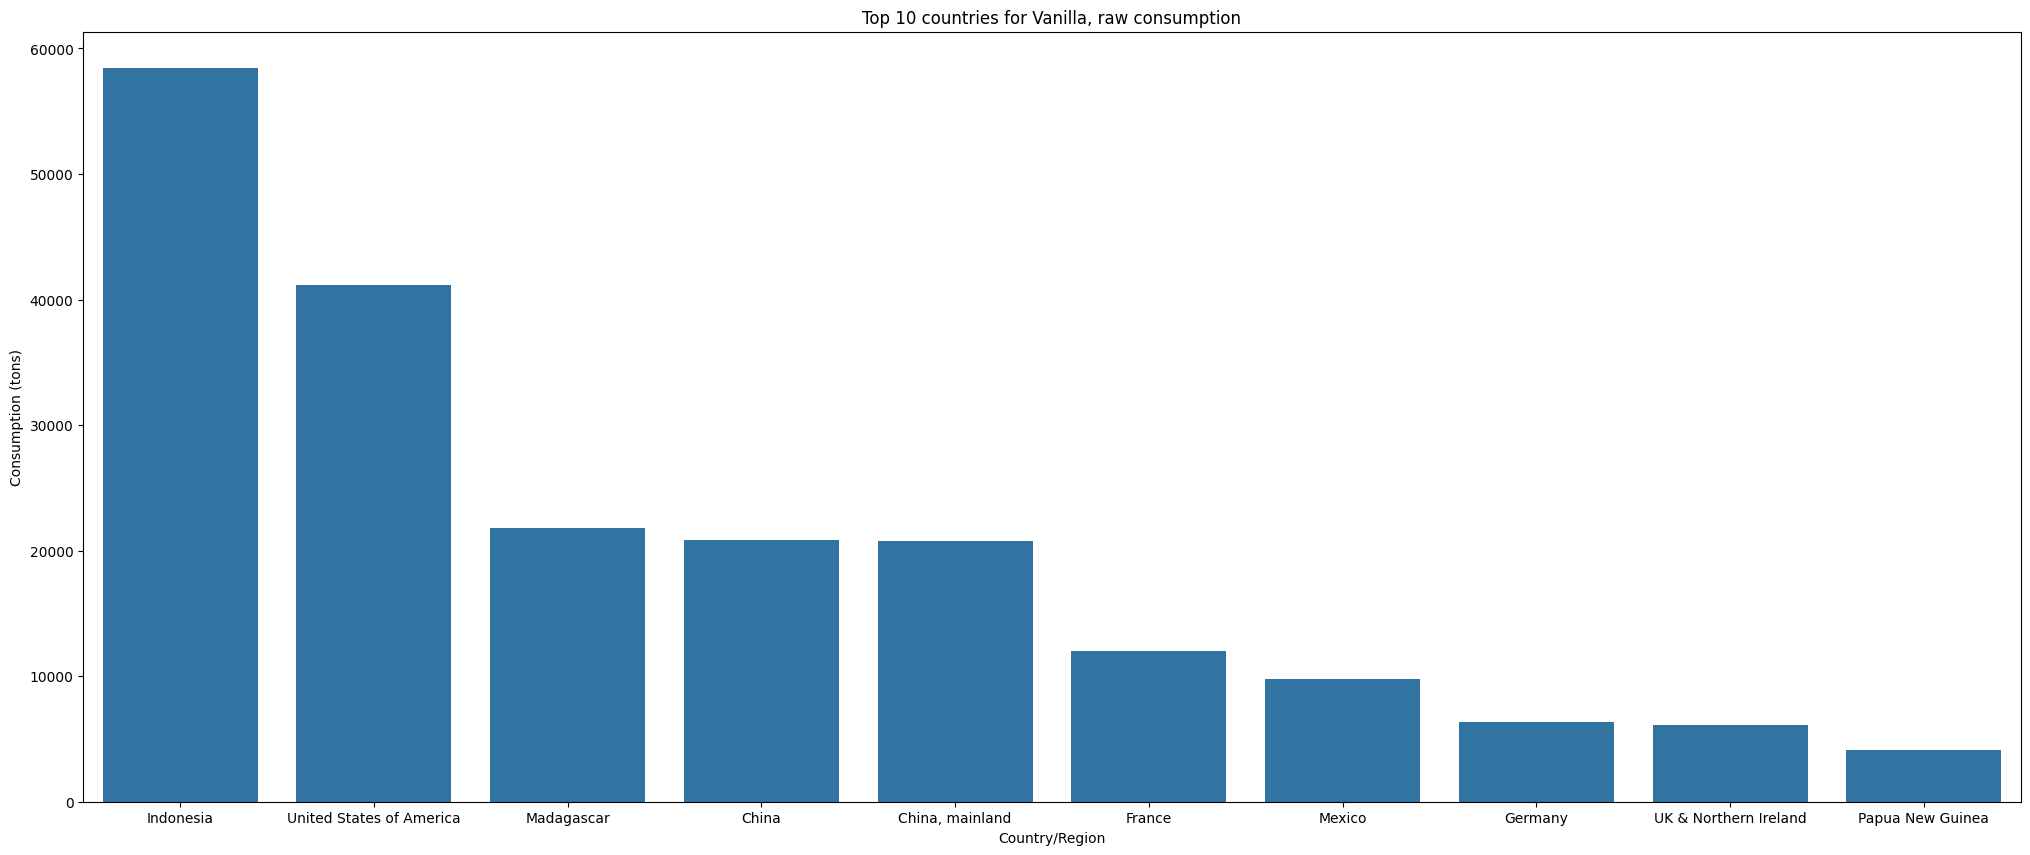

In [ ]:
#Top 10 spice consuming countries per spice
for spice in data['Item'].unique():
  print(spice)
  top_countries_per_spice =(data[data['Item'] == spice].groupby('Area')['Consumption'].sum().reset_index().sort_values(by = ['Consumption'], ascending=False).head(10))
  top_countries_per_spice['Item'] = spice
  result = top_countries_per_spice[['Area', 'Item', 'Consumption']]
  print(result)


  #Visualizing the data
  plt.figure(figsize=(25,10))
  sns.barplot(x = result['Area'], y = result['Consumption'])
  plt.title(f'Top 10 countries for {spice} consumption')
  plt.xlabel('Country/Region')
  plt.ylabel('Consumption (tons)')
  plt.show()

##**Check for the countries with the highest spice consumption recorded per spice from the year 1993 to the year 2023**
* India is the leading country in the consumption of *Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw* with a recorded 16, 158, 935.47 tonnes of the spice consumed followed by Mexico with a total of 1, 971, 988.18 tonnes of the spice recorded, which is followed closely by Turkiye with a total of 1, 888, 516.20 tonnes of the spice recorded.
* India is also the leading country in the consumption of *Chillies and peppers, dry (Capsicum spp., Pimenta spp.), raw* with a recorded 35, 265, 845.06 tonnes of the spice consumed followed by Thailand with a recorded 6, 938, 842.96 tonnes of  the spice consumed, followed by Bangladesh with a recorded 5, 670, 927.96 tonnes of the spice consumed followed closely by China with a recorded 5, 425, 010.51 tonnes of the spice consumed.
* China is the leading country in the consumption of *Chillies and peppers, green (Capsicum spp. and Pimenta spp.)* with a recorded 395, 691,700 tonnes of the spice consumed, followed by China, mainland with a recorded 361, 387, 200 tonnes of the spice consumed, followed by Turkiye with a recorded 58, 062, 380 tonnes of spice consumed, followed by Mexico with a recorded 44, 620, 600 tonnes of spice consumed, followed closely by the United States of America with a recorded 43, 284, 890 tonnes of spice consumed.
* Indonesia is the leading country in the consumption of *Cinnamon and cinnamon-tree flowers, raw* with a recorded 1, 012, 993.11 tonnes of spice consumed followed by the United States of America with a recorded 664, 339.08 tonnes of spice consumed, followed closely by China with a recorded 606, 757.68 tonnes of spice consumed, followed by China, mainland with a recorded 554, 087.44 tonnes of spice consumed, followed by India with a recorded 520, 512.42 tonnes of spice consumed.

* Indonesia is the leading country in the consumption of *Cloves (whole stems), raw* with a recorded 2, 724, 090.42 tonnes of spice consumed, followed by India with a recorded 373, 628.70 tonnes of spice consumed, followed by Tanzania with a recorded 140, 974.99 tonnes of spice consumed,followed by China with a recorded 58, 165.98 tonnes of spice consumed, followed by Saudi Arabia with a recorded 50, 286.09 tonnes of spice consumed.

* India is the leading country in the consumption of *Ginger, raw* with a recorded 22, 751, 478.20 tonnes of spice consumed, followed by Nigeria with a recorded 9, 336, 528.75 tonnes of spice consumed, followed by Nepal with a recorded 5, 053, 175.51 tonnes of spice consumed, followed by Indonesia with a recorded 4, 390, 565.67 tonnes of spice consumed.

* India is also the leading country in the consumption of *Nutmeg, mace, cardamoms, raw* with a recorded 705, 097.40 tonnes of spice consumed, followed by Saudi Arabia with a recorded 257, 325.34 tonnes of spice consumed, followed closely by Indonesia with a recorded 231, 772.71 tonnes of spice consumed, followed by Vietnam with a recorded 110, 899.25 tonnes of spice consumed, followed closely by China with a recorded 109, 376.23 tonnes of spice consumed.

* United States of America is the leading country in the consumption of *Pepper (Piper spp.), raw* with a recorded 1, 836, 254.92 tonnes of spice consumed, followed by India with a recorded 1, 537, 946.89 tonnes of spice consumed, followed by Indonesia with a recorded 1, 050, 600.59 tonnes of spice consumed, followed by China with a recorded 926, 255.75 tonnes of spice consumed.

* Indonesia is the leading country in the consumption of *Vanilla, raw* with a recorded 58, 413.92 tonnes of spice consumed, followed by the United States of America with a recorded 41, 132.17 tonnes of spice consumed, followed by Madagascar with a recorded 21, 772.11 tonnes of spice consumed, followed by China with a recorded 20, 872.82 tonnes of spice consumed.

Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw
                           Area  \
84                        India   
185                     Türkiye   
115                      Mexico   
86   Iran (Islamic Republic of)   
174        Syrian Arab Republic   
39              China, mainland   
35                        China   
118                     Morocco   
57                        Egypt   
147          Russian Federation   

                                                  Item   Production  
84   Anise, badian, coriander, cumin, caraway, fenn...  19480852.62  
185  Anise, badian, coriander, cumin, caraway, fenn...   2132523.00  
115  Anise, badian, coriander, cumin, caraway, fenn...   1887796.17  
86   Anise, badian, coriander, cumin, caraway, fenn...   1345233.34  
174  Anise, badian, coriander, cumin, caraway, fenn...   1309090.30  
39   Anise, badian, coriander, cumin, caraway, fenn...   1215250.09  
35   Anise, badian, coriander, cumin, caraway, fen

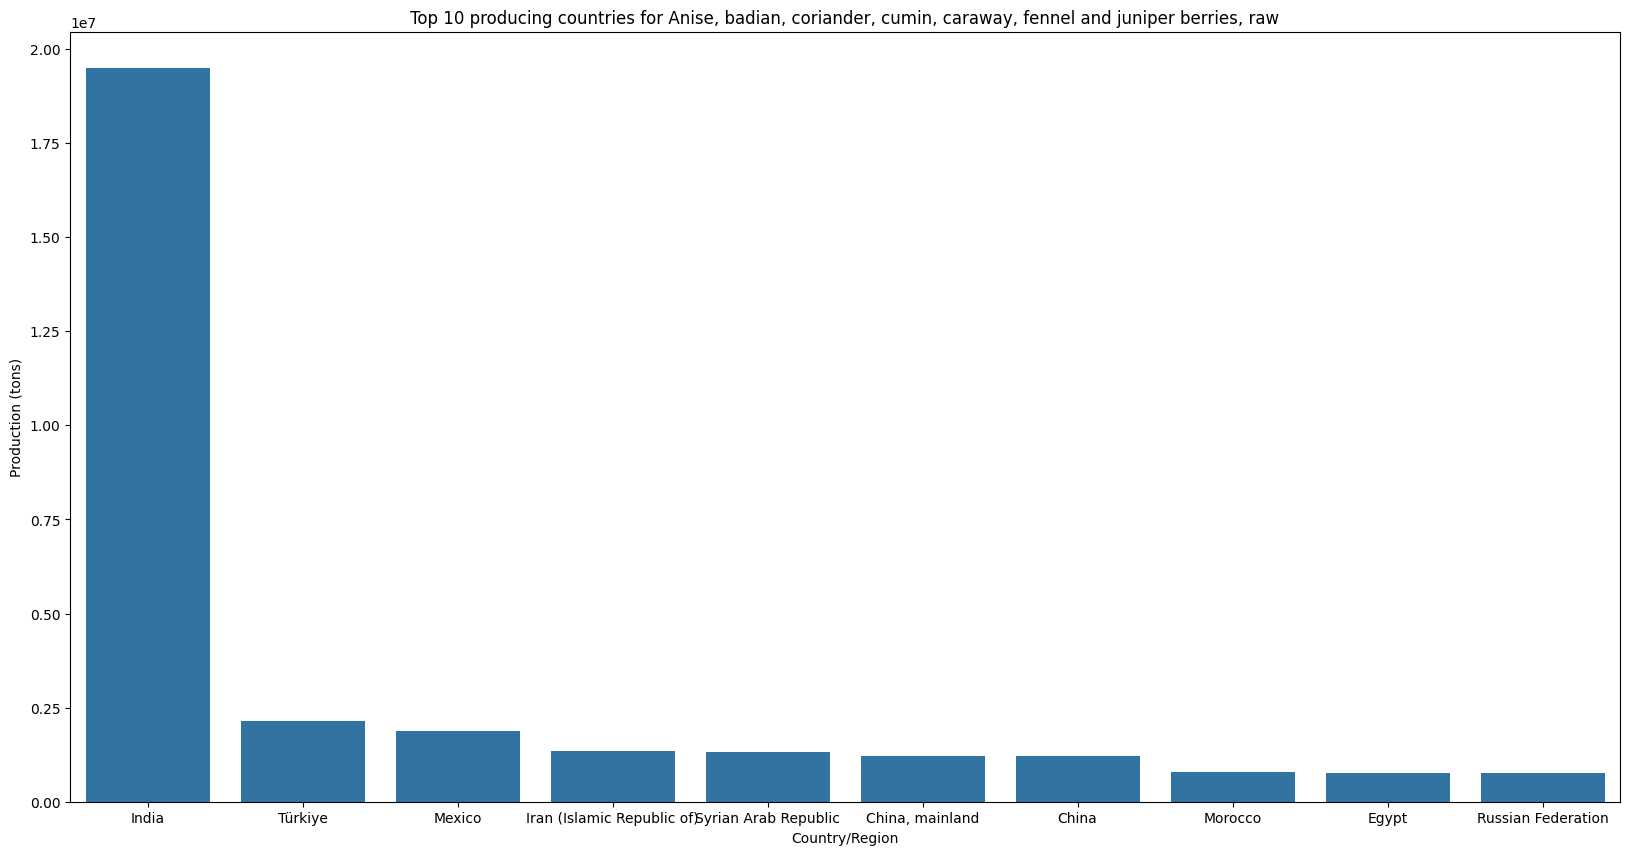

Chillies and peppers, dry (Capsicum spp., Pimenta spp.), raw
                Area                                               Item  \
84             India  Chillies and peppers, dry (Capsicum spp., Pime...   
39   China, mainland  Chillies and peppers, dry (Capsicum spp., Pime...   
35             China  Chillies and peppers, dry (Capsicum spp., Pime...   
177         Thailand  Chillies and peppers, dry (Capsicum spp., Pime...   
12        Bangladesh  Chillies and peppers, dry (Capsicum spp., Pime...   
63          Ethiopia  Chillies and peppers, dry (Capsicum spp., Pime...   
134         Pakistan  Chillies and peppers, dry (Capsicum spp., Pime...   
49     Côte d'Ivoire  Chillies and peppers, dry (Capsicum spp., Pime...   
73             Ghana  Chillies and peppers, dry (Capsicum spp., Pime...   
115           Mexico  Chillies and peppers, dry (Capsicum spp., Pime...   

      Production  
84   42264431.00  
39    8013792.65  
35    8013792.65  
177   5827870.71  
12    5121116.00  

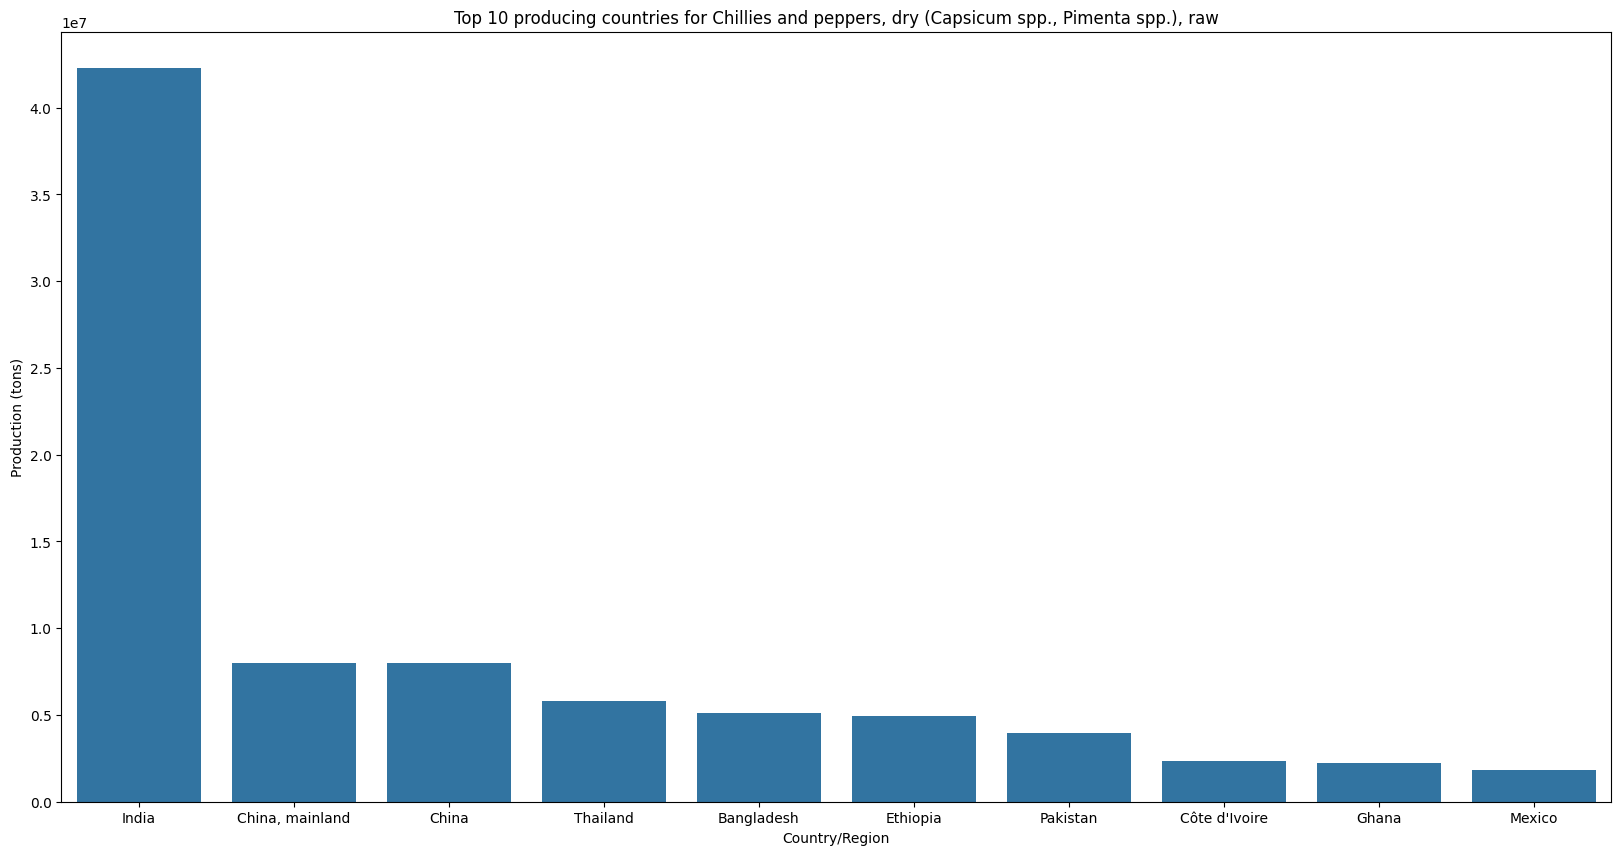

Chillies and peppers, green (Capsicum spp. and Pimenta spp.)
                         Area  \
35                      China   
39            China, mainland   
115                    Mexico   
184                   Türkiye   
85                  Indonesia   
166                     Spain   
189  United States of America   
129                   Nigeria   
124               Netherlands   
2                     Algeria   

                                                  Item    Production  
35   Chillies and peppers, green (Capsicum spp. and...  3.969695e+08  
39   Chillies and peppers, green (Capsicum spp. and...  3.626488e+08  
115  Chillies and peppers, green (Capsicum spp. and...  6.420159e+07  
184  Chillies and peppers, green (Capsicum spp. and...  6.031464e+07  
85   Chillies and peppers, green (Capsicum spp. and...  3.882684e+07  
166  Chillies and peppers, green (Capsicum spp. and...  3.311176e+07  
189  Chillies and peppers, green (Capsicum spp. and...  2.484582e+07  
129  Ch

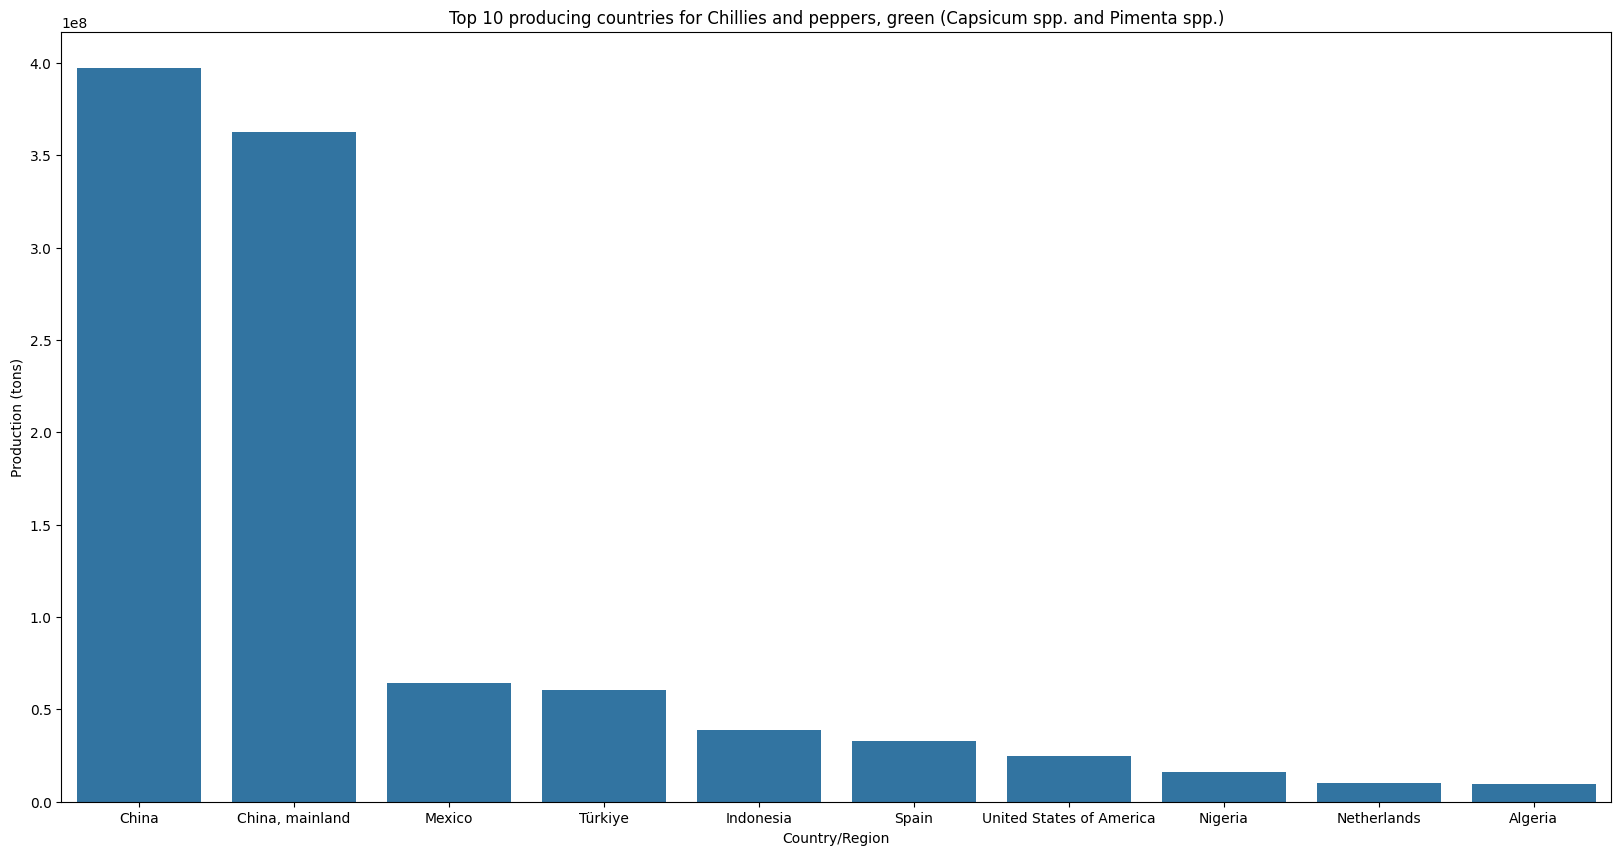

Cinnamon and cinnamon-tree flowers, raw
                      Area                                     Item  \
85               Indonesia  Cinnamon and cinnamon-tree flowers, raw   
39         China, mainland  Cinnamon and cinnamon-tree flowers, raw   
35                   China  Cinnamon and cinnamon-tree flowers, raw   
195               Viet Nam  Cinnamon and cinnamon-tree flowers, raw   
168              Sri Lanka  Cinnamon and cinnamon-tree flowers, raw   
107             Madagascar  Cinnamon and cinnamon-tree flowers, raw   
158             Seychelles  Cinnamon and cinnamon-tree flowers, raw   
75                 Grenada  Cinnamon and cinnamon-tree flowers, raw   
178            Timor-Leste  Cinnamon and cinnamon-tree flowers, raw   
153  Sao Tome and Principe  Cinnamon and cinnamon-tree flowers, raw   

     Production  
85   2116633.10  
39   1768095.39  
35   1768095.39  
195   694380.25  
168   507427.85  
107    68874.33  
158     5290.20  
75      1512.76  
178     1048.96 

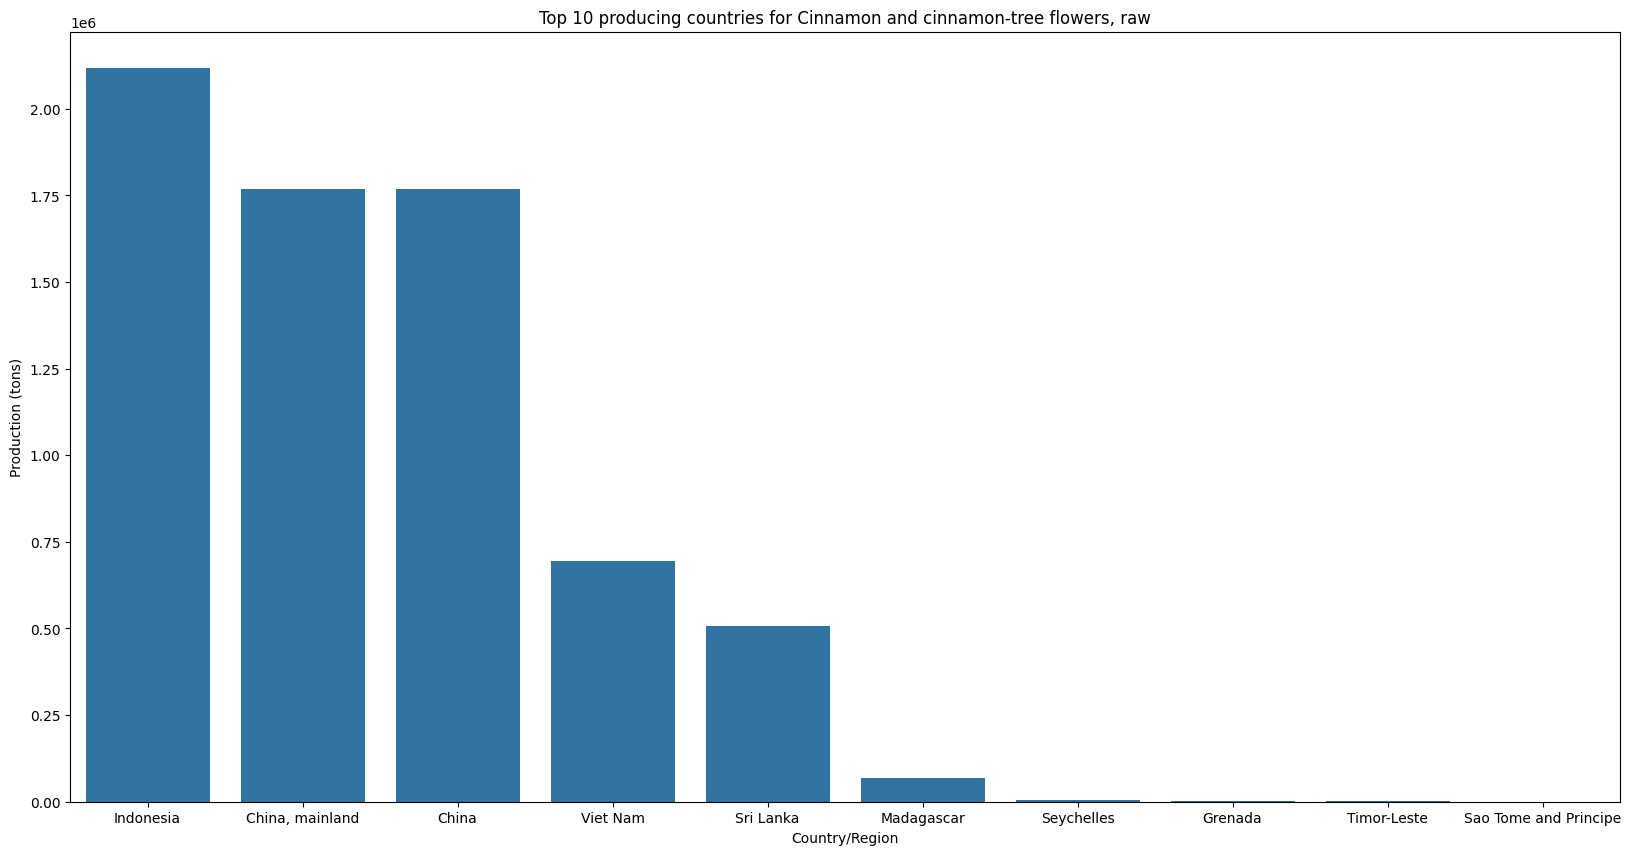

Cloves (whole stems), raw
                Area                       Item  Production
85         Indonesia  Cloves (whole stems), raw  2847540.61
106       Madagascar  Cloves (whole stems), raw   284420.52
175         Tanzania  Cloves (whole stems), raw   246442.78
167        Sri Lanka  Cloves (whole stems), raw   123286.23
95             Kenya  Cloves (whole stems), raw    42427.75
39   China, mainland  Cloves (whole stems), raw    26541.68
35             China  Cloves (whole stems), raw    26541.68
41           Comoros  Cloves (whole stems), raw    21996.56
108         Malaysia  Cloves (whole stems), raw     6798.06
75           Grenada  Cloves (whole stems), raw      730.41


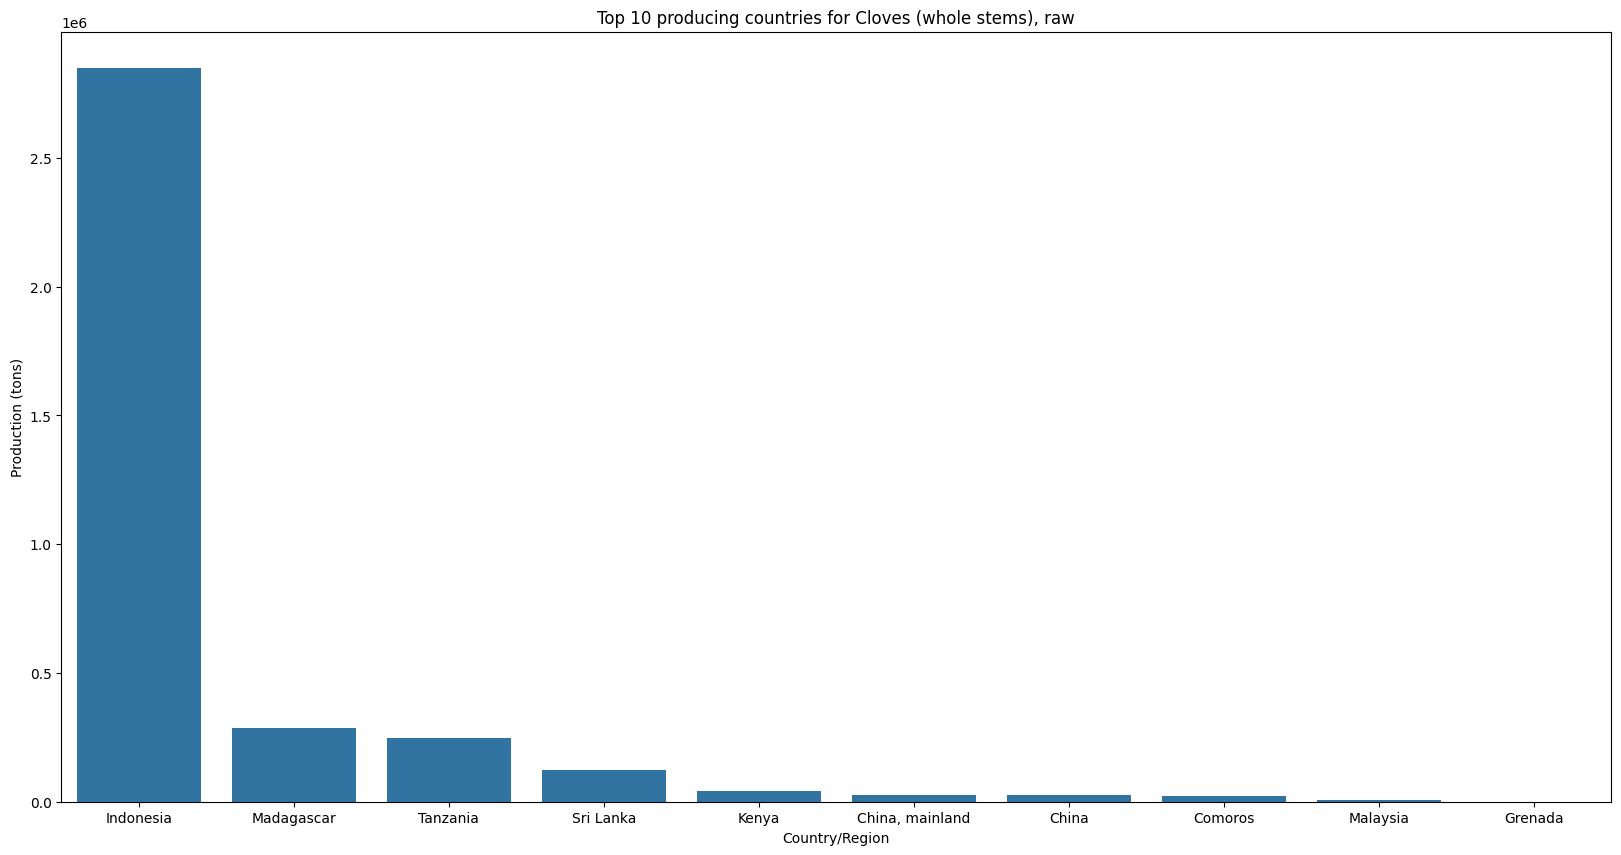

Ginger, raw
                          Area         Item   Production
84                       India  Ginger, raw  22951757.28
35                       China  Ginger, raw  11922773.54
39             China, mainland  Ginger, raw  11024710.70
129                    Nigeria  Ginger, raw   9756071.47
123                      Nepal  Ginger, raw   5548549.60
85                   Indonesia  Ginger, raw   4860762.26
177                   Thailand  Ginger, raw   4425031.84
12                  Bangladesh  Ginger, raw   1906563.00
92                       Japan  Ginger, raw   1284588.63
38   China, Taiwan Province of  Ginger, raw    898062.83


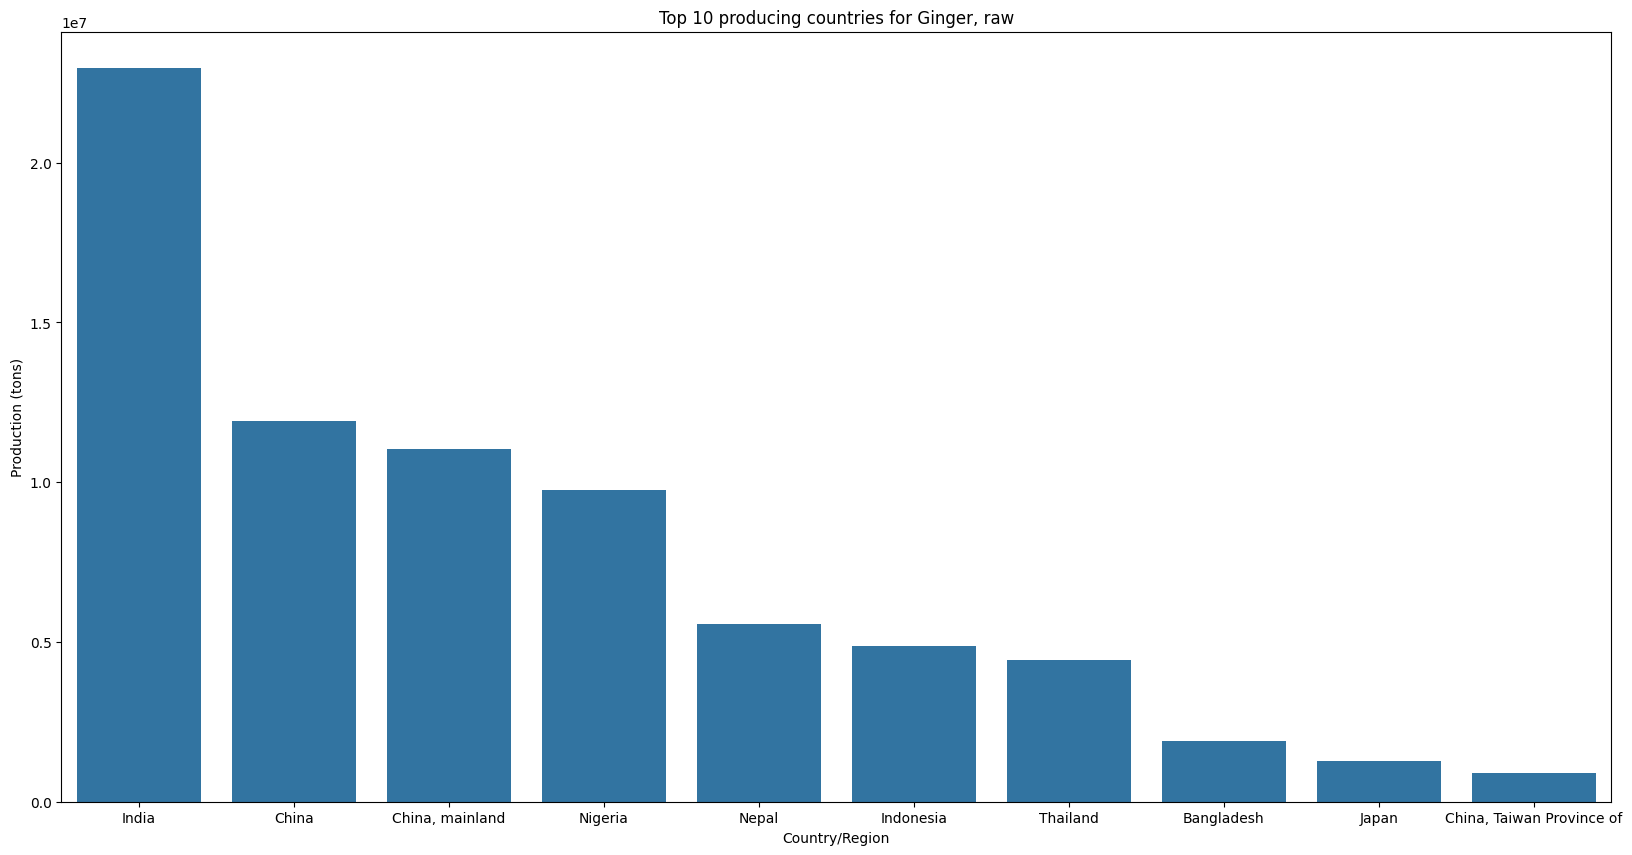

Nutmeg, mace, cardamoms, raw
                                 Area                          Item  \
75                          Guatemala  Nutmeg, mace, cardamoms, raw   
84                          Indonesia  Nutmeg, mace, cardamoms, raw   
83                              India  Nutmeg, mace, cardamoms, raw   
122                             Nepal  Nutmeg, mace, cardamoms, raw   
167                         Sri Lanka  Nutmeg, mace, cardamoms, raw   
98   Lao People's Democratic Republic  Nutmeg, mace, cardamoms, raw   
175                          Tanzania  Nutmeg, mace, cardamoms, raw   
19                             Bhutan  Nutmeg, mace, cardamoms, raw   
74                            Grenada  Nutmeg, mace, cardamoms, raw   
80                           Honduras  Nutmeg, mace, cardamoms, raw   

     Production  
75    997775.48  
84    826404.00  
83    702741.00  
122   185378.69  
167    61311.89  
98     54073.71  
175    24940.96  
19     23660.96  
74     17049.99  
80     14

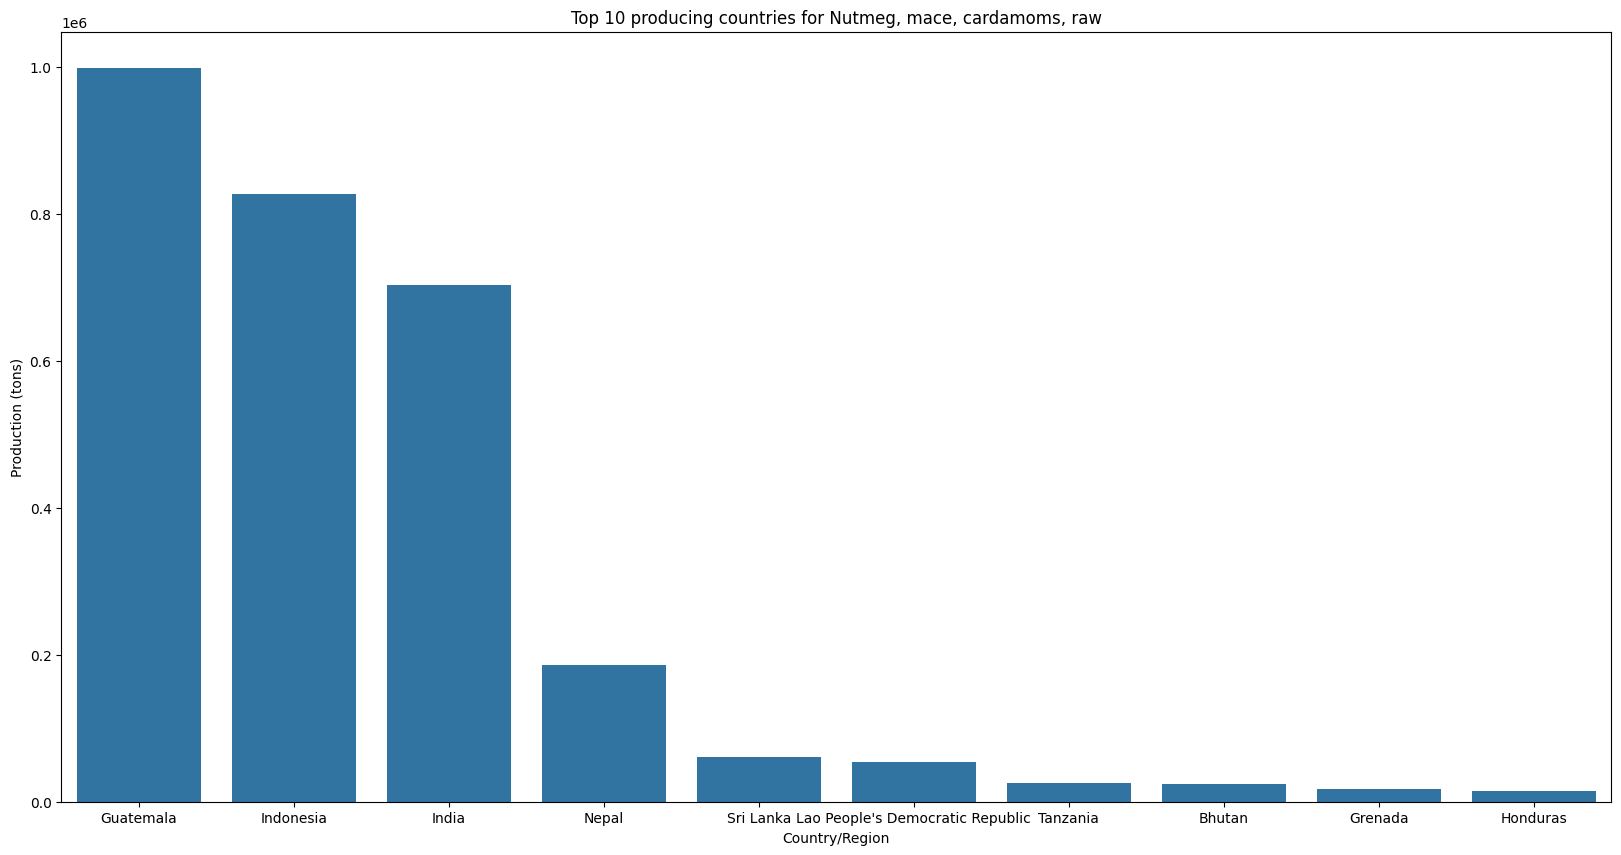

Pepper (Piper spp.), raw
                Area                      Item  Production
195         Viet Nam  Pepper (Piper spp.), raw  2637702.58
85         Indonesia  Pepper (Piper spp.), raw  2396086.00
23            Brazil  Pepper (Piper spp.), raw  1978708.00
84             India  Pepper (Piper spp.), raw  1898134.48
168        Sri Lanka  Pepper (Piper spp.), raw   801982.04
35             China  Pepper (Piper spp.), raw   792168.19
39   China, mainland  Pepper (Piper spp.), raw   786219.71
109         Malaysia  Pepper (Piper spp.), raw   769206.31
26      Burkina Faso  Pepper (Piper spp.), raw   564770.43
198         Zimbabwe  Pepper (Piper spp.), raw   350068.84


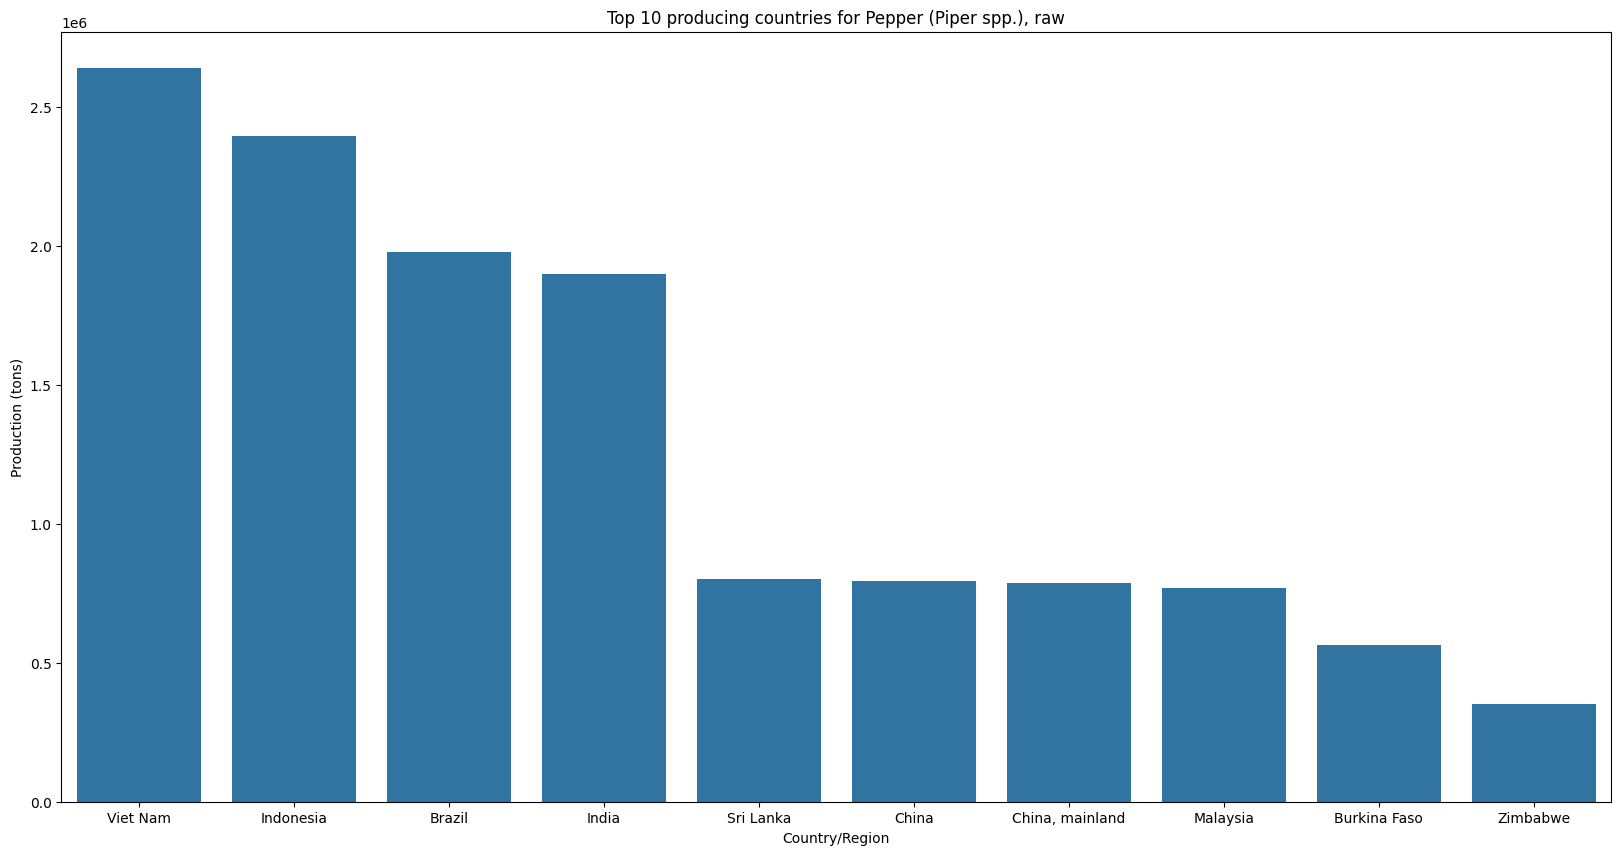

Vanilla, raw
                 Area          Item  Production
85          Indonesia  Vanilla, raw    70030.98
107        Madagascar  Vanilla, raw    63143.43
35              China  Vanilla, raw    20699.76
39    China, mainland  Vanilla, raw    20699.76
115            Mexico  Vanilla, raw    10821.41
136  Papua New Guinea  Vanilla, raw     9890.61
183           Türkiye  Vanilla, raw     6350.21
185            Uganda  Vanilla, raw     4762.88
41            Comoros  Vanilla, raw     3573.73
178             Tonga  Vanilla, raw     2889.02


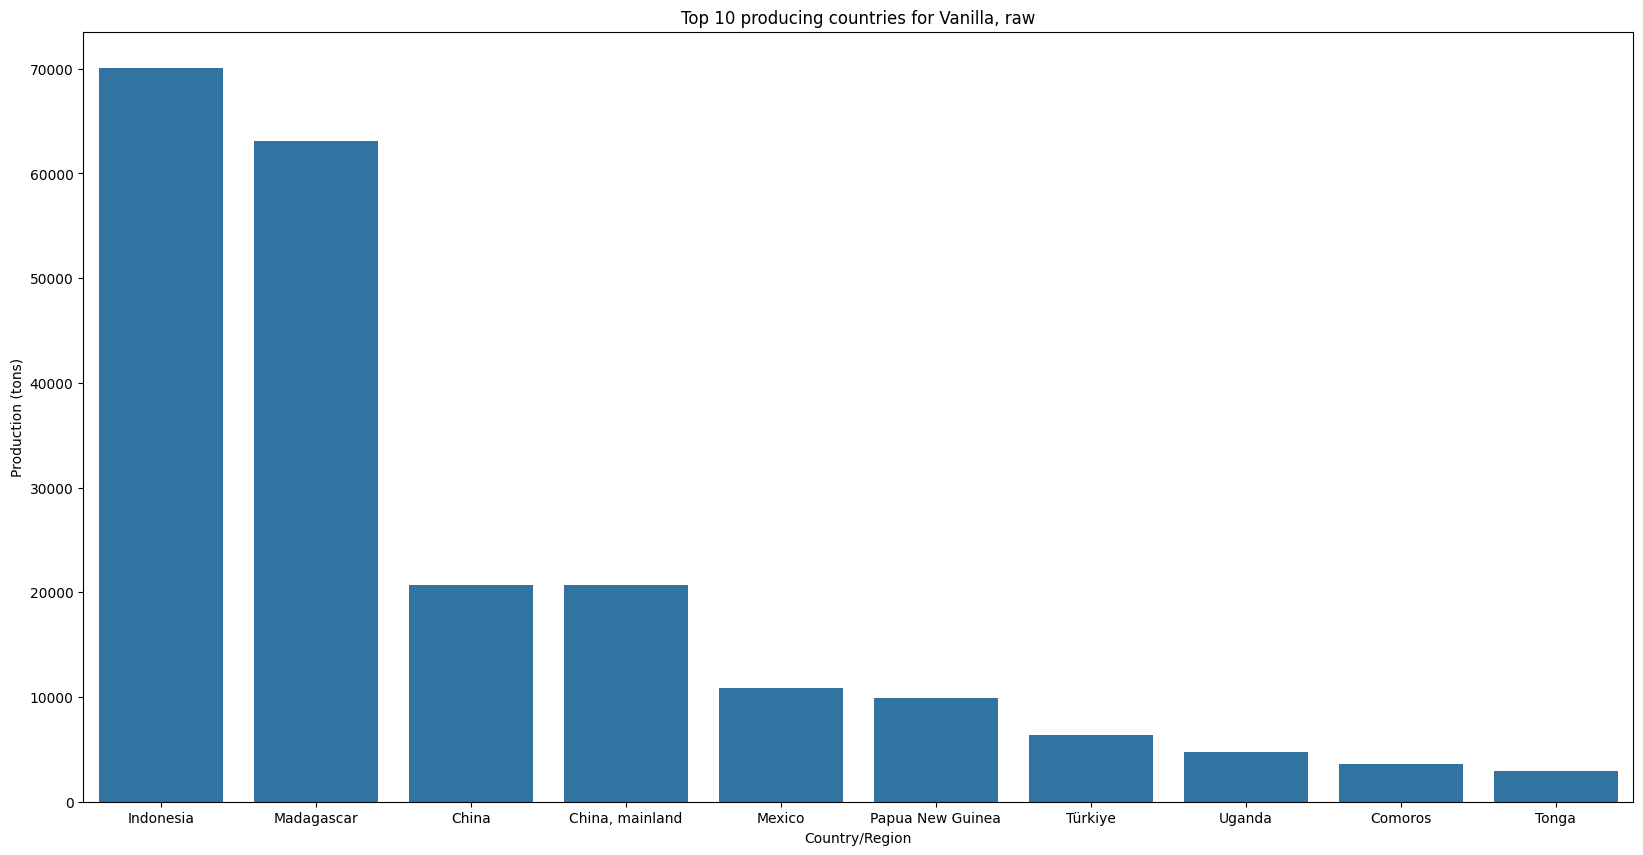

In [ ]:
#Top 10 producing countries by spice
for spice in data['Item'].unique():
  top_10_producing_countries = (data[data['Item'] == spice].groupby('Area')['Production'].sum().reset_index().sort_values(by = 'Production', ascending = False).head(10))
  top_10_producing_countries['Item'] = spice
  top_10_producing_countries = top_10_producing_countries[['Area', 'Item', 'Production']]
  print(spice)
  print(top_10_producing_countries)


  #Visualizing the data
  plt.figure(figsize = (20,10))
  sns.barplot(x = top_10_producing_countries['Area'], y = top_10_producing_countries['Production'])
  plt.title(f'Top 10 producing countries for {spice}')
  plt.xlabel('Country/Region')
  plt.ylabel('Production (tons)')
  plt.show()

##**Check for the countries with the highest spice production recorded per spice from the year 1993 to the year 2023**
* India is the leading country in the production of *Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw* with a recorded 19, 480, 852.62 tonnes of spice produced, followed by Turkiye with a recorded 2, 132, 523 tonnes of spice produced, followed by Mexico with a recorded 1, 887, 796.17 tonnes of spice produced, followed by Iran with a recorded 1, 345, 233.34 tonnes of spice produced.
* India is also the leading country in the production of *Chillies and peppers, dry (Capsicum spp., Pimenta spp.), raw* with a recorded 42, 264, 431 tonnes of spice produced, followed by China, mainland and China both with a recorded 8, 013, 792.65 tonnes of spice produced, followed by Thailand with a recorded 5, 827, 870.71 tonnes of spice produced, followed by Bangladesh with a recorded 5, 121, 116 tonnes of spice produced.
* China is the leading country in the production of *Chillies and peppers, green (Capsicum spp. and Pimenta spp.)* with a recorded 396, 969, 500 tonnes of spice produced, followed by China, mainland with a recorded 362, 648, 800 tonnes of spice produced, followed by Mexico with a recorded 64, 201, 590 tonnes of spice produced, followed by Turkiye with a recorded 60, 314, 640 tonnes of spice produced.
* Indonesia is the leading country in the production of *Cinnamon and cinnamon-tree flowers, raw* with a recorded 2, 116, 633.10 tonnes of spice produced, followed by China, mainland and China both with a recorded 1, 768, 095.39 tonnes of spice produced, followed by Vietnam with  recorded 694, 380.25 tonnes of spice produced, followed by Sri Lanka with a recorded 507, 427.85 tonnes of spice produced.
* Indonesia is also the leading country in the production of *Cloves (whole stems), raw* with a recorded 2, 847, 540.61 tonnes of spice produced, followed by Madagascar with a recorded 284, 420.52 tonnes of spice produced, followed by Tanzania with a recorded 246, 442.78 tonnes of spice produced, followed by Sri Lanka with a recorded 123, 286.23 tonnes of spice produced, followed by Kenya with a recorded 42, 427.75 tonnes of spice produced.

* India is the leading country in the production of *Ginger, raw* with a recorded 22, 951, 757.28 tonnes of spice produced, followed by China with a recorded 11, 922, 773.54 tonnes of spice produced, followed by China, mainland with a recorded 11, 024, 710.70 tonnes of spice produced, followed by Nigeria with a recorded 9, 756, 071.47 tonnes of spice produced, followed by Nepal with a recorded 5, 548, 549.60 tonnes of spice produced.
* Guatemala is the leading country in the production of *Nutmeg, mace, cardamoms, raw* with a recorded 997, 775.48 tonnes of spice produced, followed by Indonesia with a recorded 826, 404 tonnes of spice produced, followed by India with a recorded 702, 741 tonnes of spice produced, folowed by Nepal with a recorded 185, 378.69 tonnes of spice produced, followed by Sri Lanka with a recorded 61, 311.89 tonnes of spice produced.
* Vietnam is the leading country in the production of *Pepper (Piper spp.), raw* with a recorded 2, 637, 702.58 tonnes of spice produced, followed by Indonesia with a recorded 2, 396, 086 tonnes of spice produced, followed by Brazil with a recorded 1, 978, 708 tonnes of spice produced, followed by India with a recorded 1, 898, 134.48 tonnes of spice produced, followed by Sri Lanka with a recorded 801, 982.04 tonnes of spice produced.
* Indonesia is the leading country in the production of *Vanilla, raw* with a recorded 70, 030.98 tonnes of spice produced, followed by Madagascar with a recorded 63, 143.43 tonnes of spice produced, followed by China with a recorded 20, 699.76 tonnes of spice produced, followed by Mexico with a recorded 10, 821.41 tonnes of spice produced, followed by Papua New Guinea with a recorded 9, 890.61 tonnes of spice produced, followed by Turkiye with a recorded 6, 350.21 tonnes of spice produced, followed by Uganda with a recorded 4, 762.88 tonnes of spice produced.

Top 10 exporting countries for Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw
                           Area  \
84                        India   
174        Syrian Arab Republic   
25                     Bulgaria   
86   Iran (Islamic Republic of)   
147          Russian Federation   
57                        Egypt   
185                     Türkiye   
35                        China   
39              China, mainland   
189        United Arab Emirates   

                                                  Item     Export   
84   Anise, badian, coriander, cumin, caraway, fenn...  3874256.43  
174  Anise, badian, coriander, cumin, caraway, fenn...   916048.71  
25   Anise, badian, coriander, cumin, caraway, fenn...   638633.07  
86   Anise, badian, coriander, cumin, caraway, fenn...   549574.52  
147  Anise, badian, coriander, cumin, caraway, fenn...   495485.41  
57   Anise, badian, coriander, cumin, caraway, fenn...   418505.15  
185  Anise, badian, corian

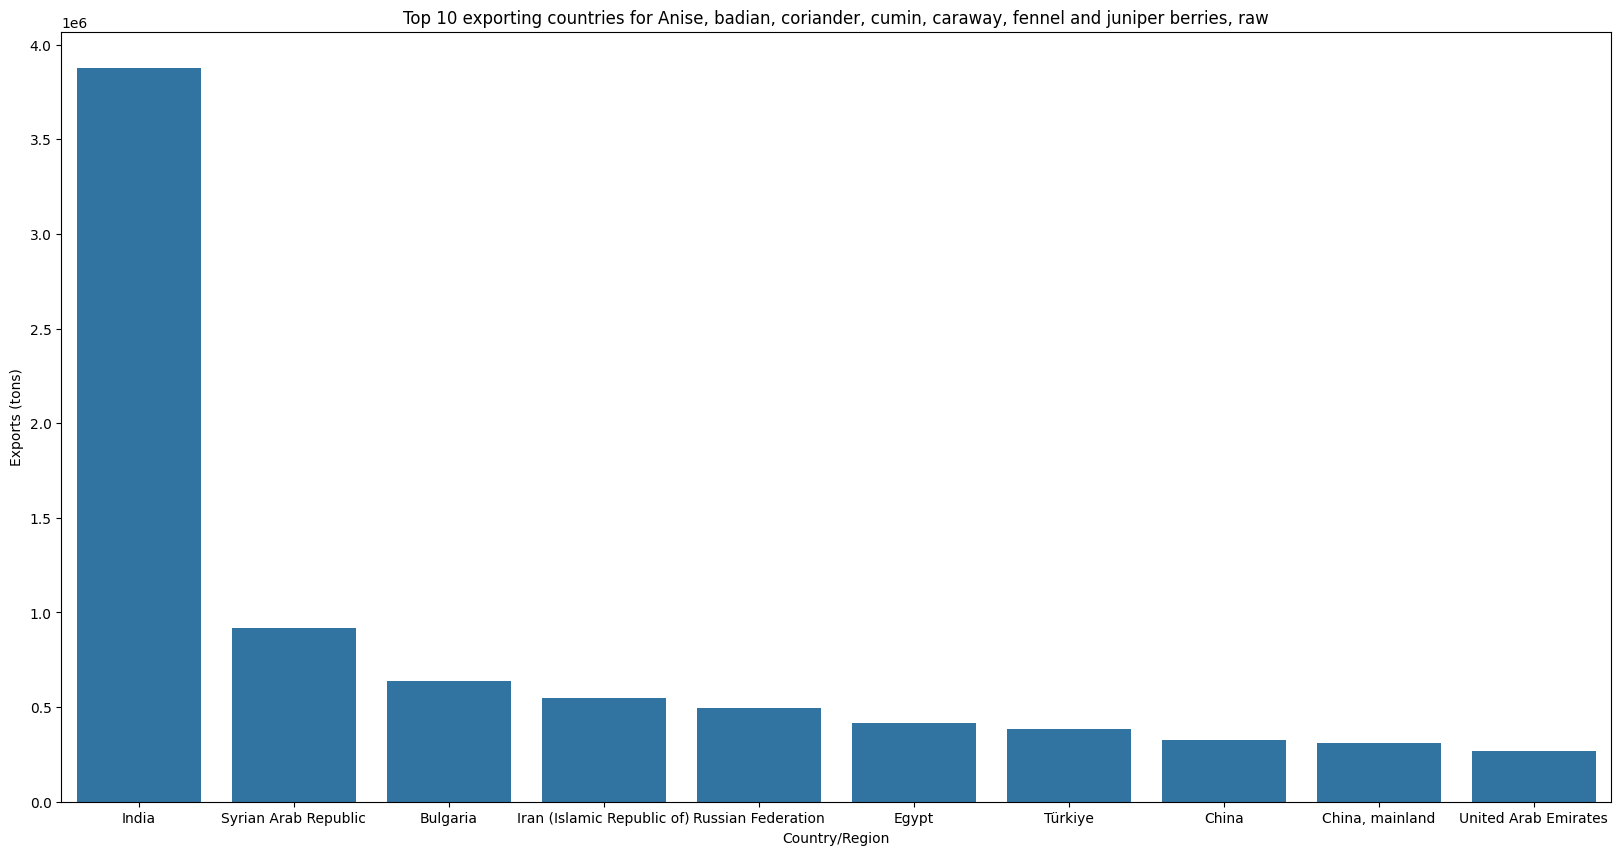

Top 10 exporting countries for Chillies and peppers, dry (Capsicum spp., Pimenta spp.), raw
                         Area  \
84                      India   
35                      China   
39            China, mainland   
167                     Spain   
139                      Peru   
115                    Mexico   
109                  Malaysia   
182                   Tunisia   
190  United States of America   
177                  Thailand   

                                                  Item     Export   
84   Chillies and peppers, dry (Capsicum spp., Pime...  7034182.41  
35   Chillies and peppers, dry (Capsicum spp., Pime...  3735581.80  
39   Chillies and peppers, dry (Capsicum spp., Pime...  3681565.08  
167  Chillies and peppers, dry (Capsicum spp., Pime...  1207350.45  
139  Chillies and peppers, dry (Capsicum spp., Pime...   890240.56  
115  Chillies and peppers, dry (Capsicum spp., Pime...   562636.63  
109  Chillies and peppers, dry (Capsicum spp., Pime...   3785

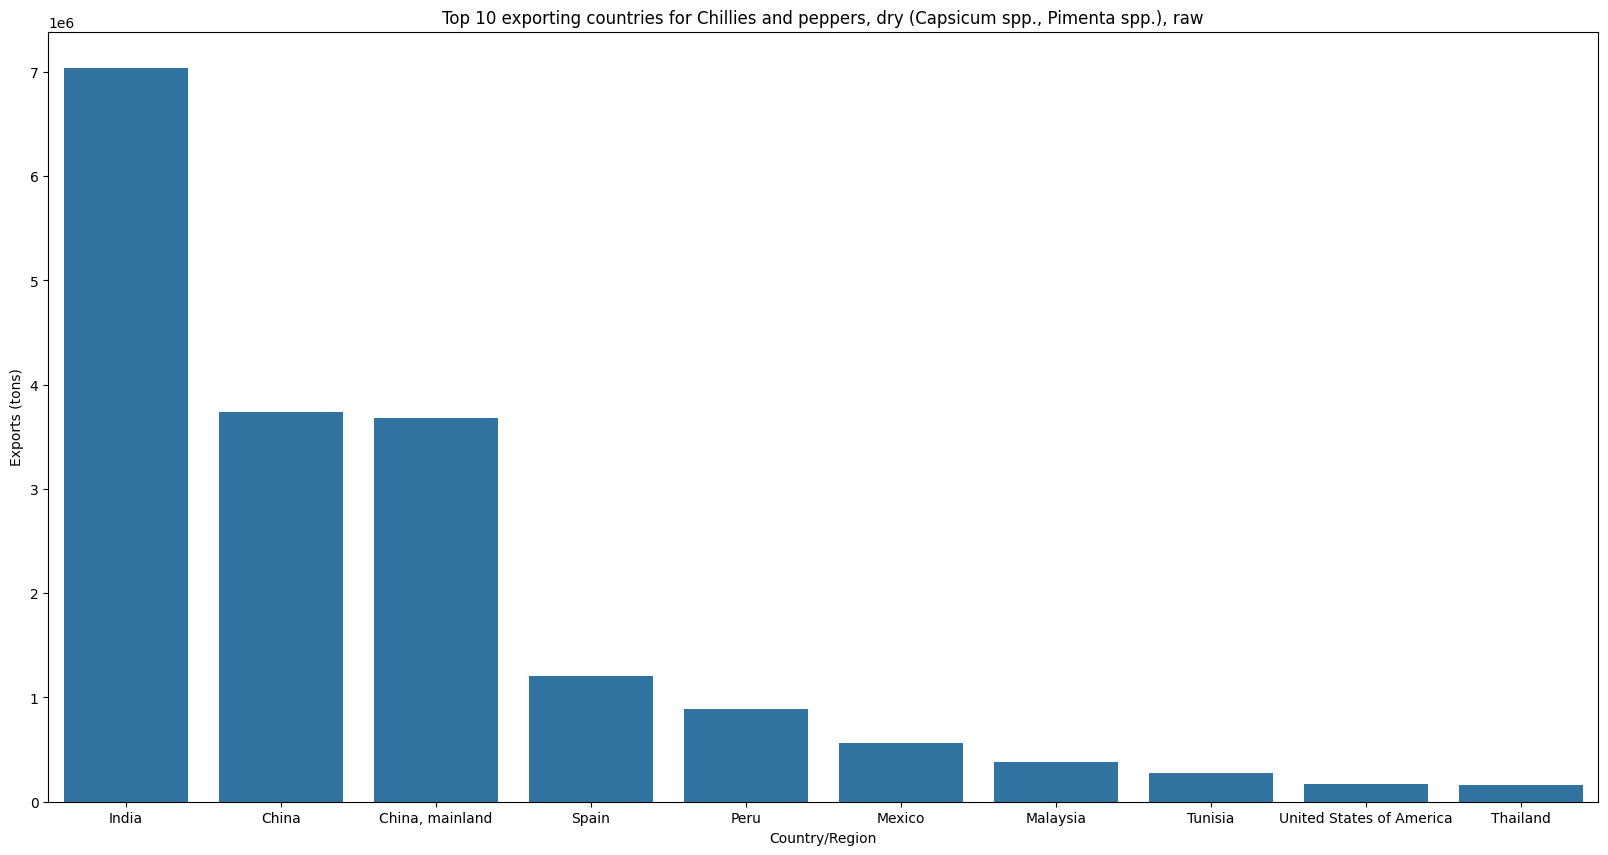

Top 10 exporting countries for Chillies and peppers, green (Capsicum spp. and Pimenta spp.)
                         Area  \
115                    Mexico   
166                     Spain   
124               Netherlands   
189  United States of America   
31                     Canada   
184                   Türkiye   
118                   Morocco   
35                      China   
89                     Israel   
39            China, mainland   

                                                  Item      Export   
115  Chillies and peppers, green (Capsicum spp. and...  19695951.95  
166  Chillies and peppers, green (Capsicum spp. and...  16669541.61  
124  Chillies and peppers, green (Capsicum spp. and...  11053114.26  
189  Chillies and peppers, green (Capsicum spp. and...   3058930.58  
31   Chillies and peppers, green (Capsicum spp. and...   2594312.53  
184  Chillies and peppers, green (Capsicum spp. and...   2262600.41  
118  Chillies and peppers, green (Capsicum spp. and...

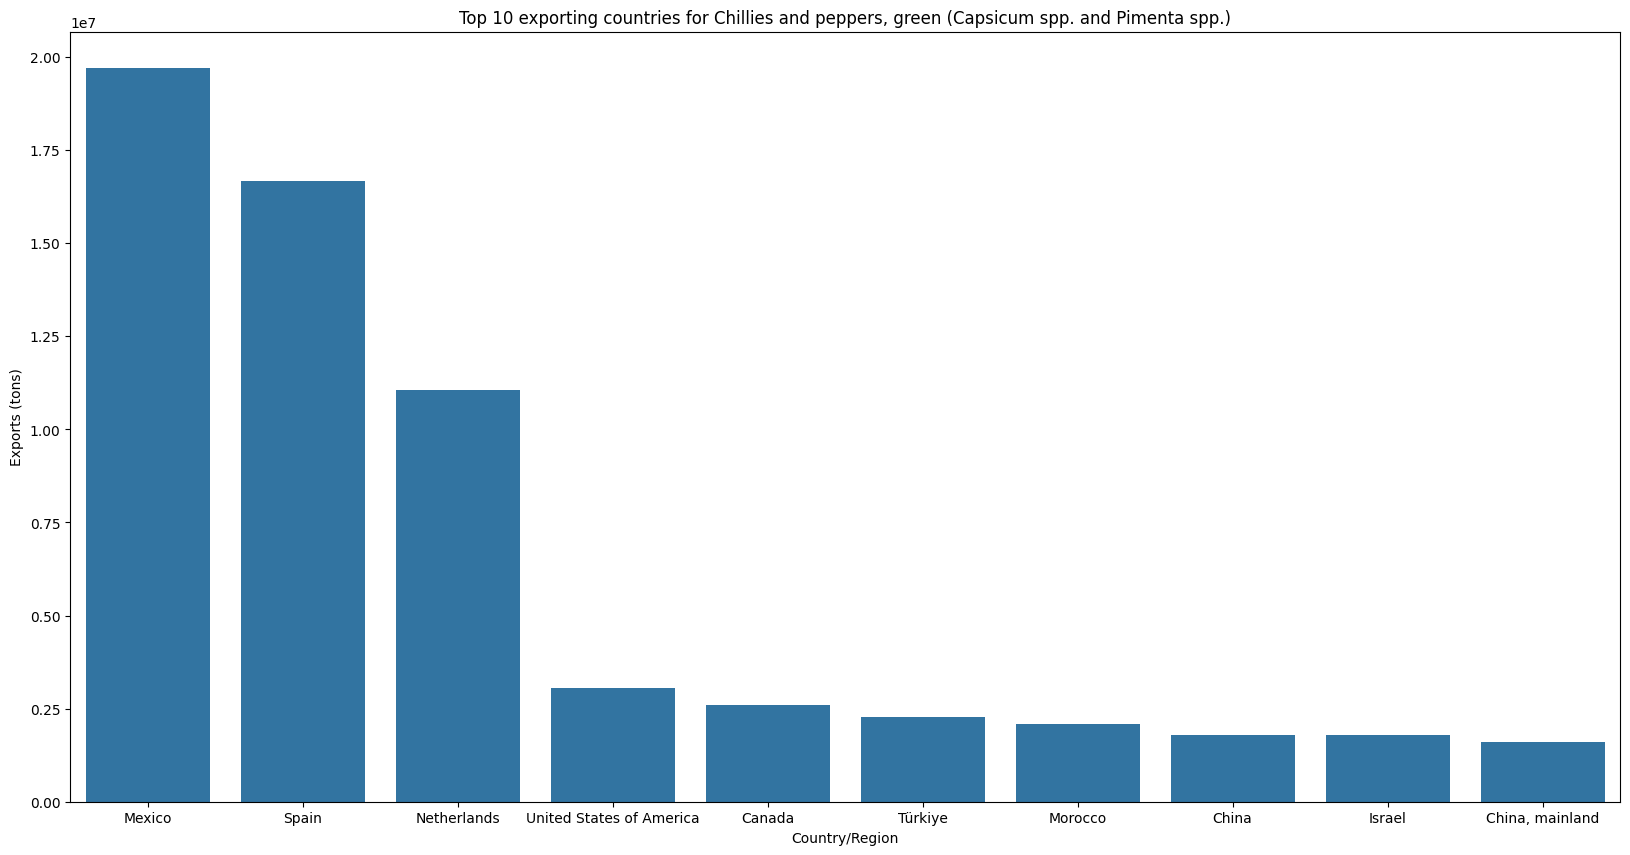

Top 10 exporting countries for Cinnamon and cinnamon-tree flowers, raw
                         Area                                     Item  \
35                      China  Cinnamon and cinnamon-tree flowers, raw   
39            China, mainland  Cinnamon and cinnamon-tree flowers, raw   
85                  Indonesia  Cinnamon and cinnamon-tree flowers, raw   
195                  Viet Nam  Cinnamon and cinnamon-tree flowers, raw   
168                 Sri Lanka  Cinnamon and cinnamon-tree flowers, raw   
124               Netherlands  Cinnamon and cinnamon-tree flowers, raw   
160                 Singapore  Cinnamon and cinnamon-tree flowers, raw   
189      United Arab Emirates  Cinnamon and cinnamon-tree flowers, raw   
36       China, Hong Kong SAR  Cinnamon and cinnamon-tree flowers, raw   
190  United States of America  Cinnamon and cinnamon-tree flowers, raw   

        Export   
35   1276069.52  
39   1226889.63  
85   1134986.83  
195   819745.59  
168   397414.45  
124   

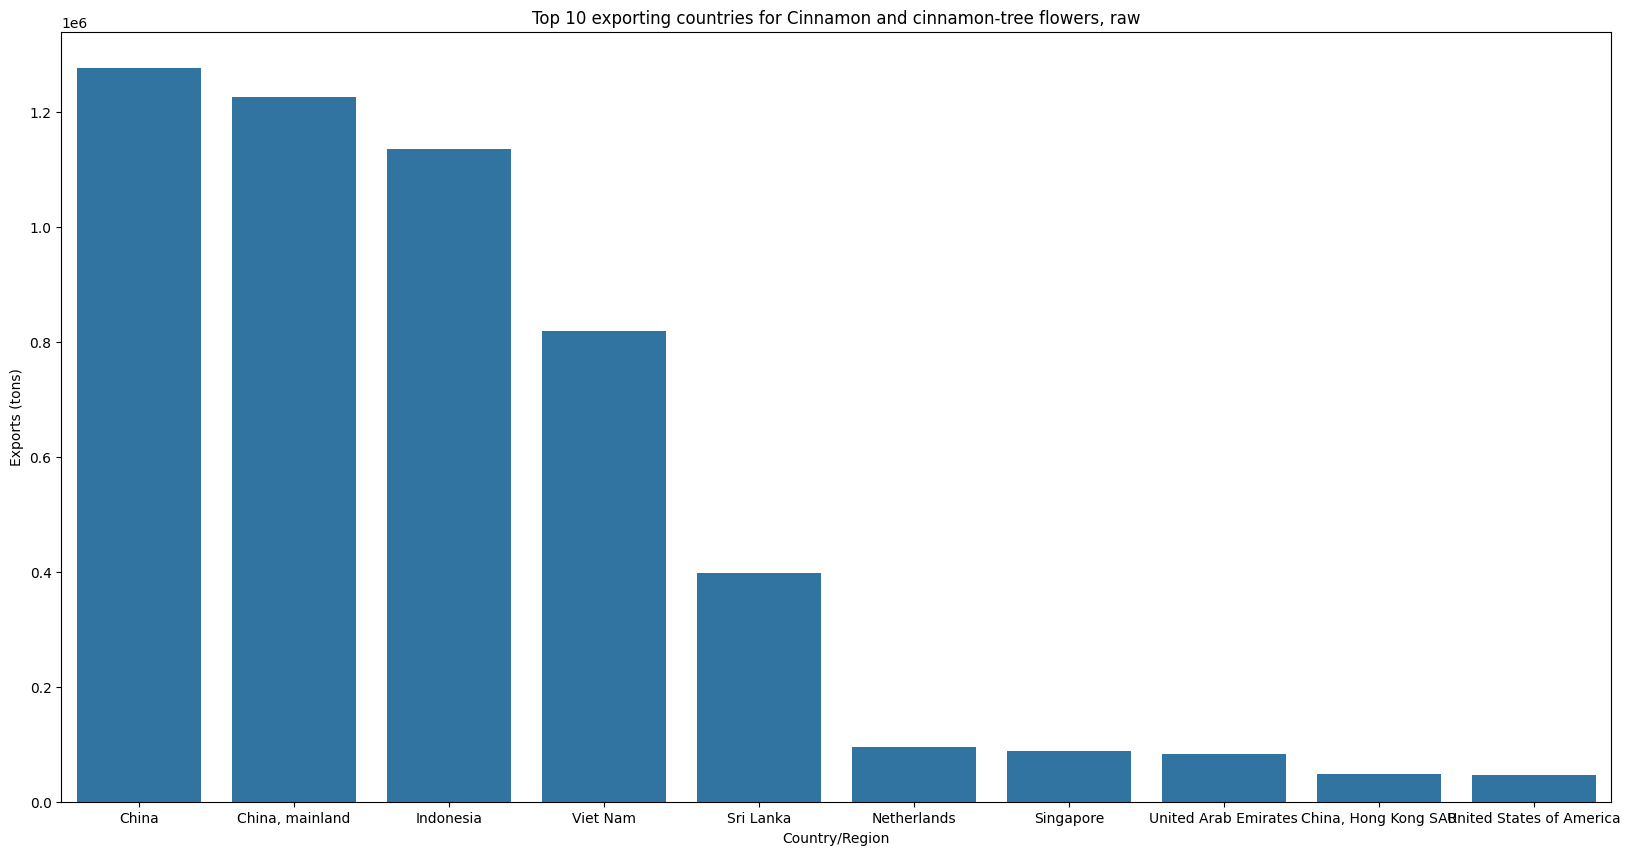

Top 10 exporting countries for Cloves (whole stems), raw
                     Area                       Item    Export 
106            Madagascar  Cloves (whole stems), raw  312146.94
85              Indonesia  Cloves (whole stems), raw  307659.17
159             Singapore  Cloves (whole stems), raw  301409.35
167             Sri Lanka  Cloves (whole stems), raw  111097.37
175              Tanzania  Cloves (whole stems), raw  105916.12
23                 Brazil  Cloves (whole stems), raw   75636.63
188  United Arab Emirates  Cloves (whole stems), raw   64307.39
41                Comoros  Cloves (whole stems), raw   17837.16
123           Netherlands  Cloves (whole stems), raw   16457.45
95                  Kenya  Cloves (whole stems), raw   16259.43


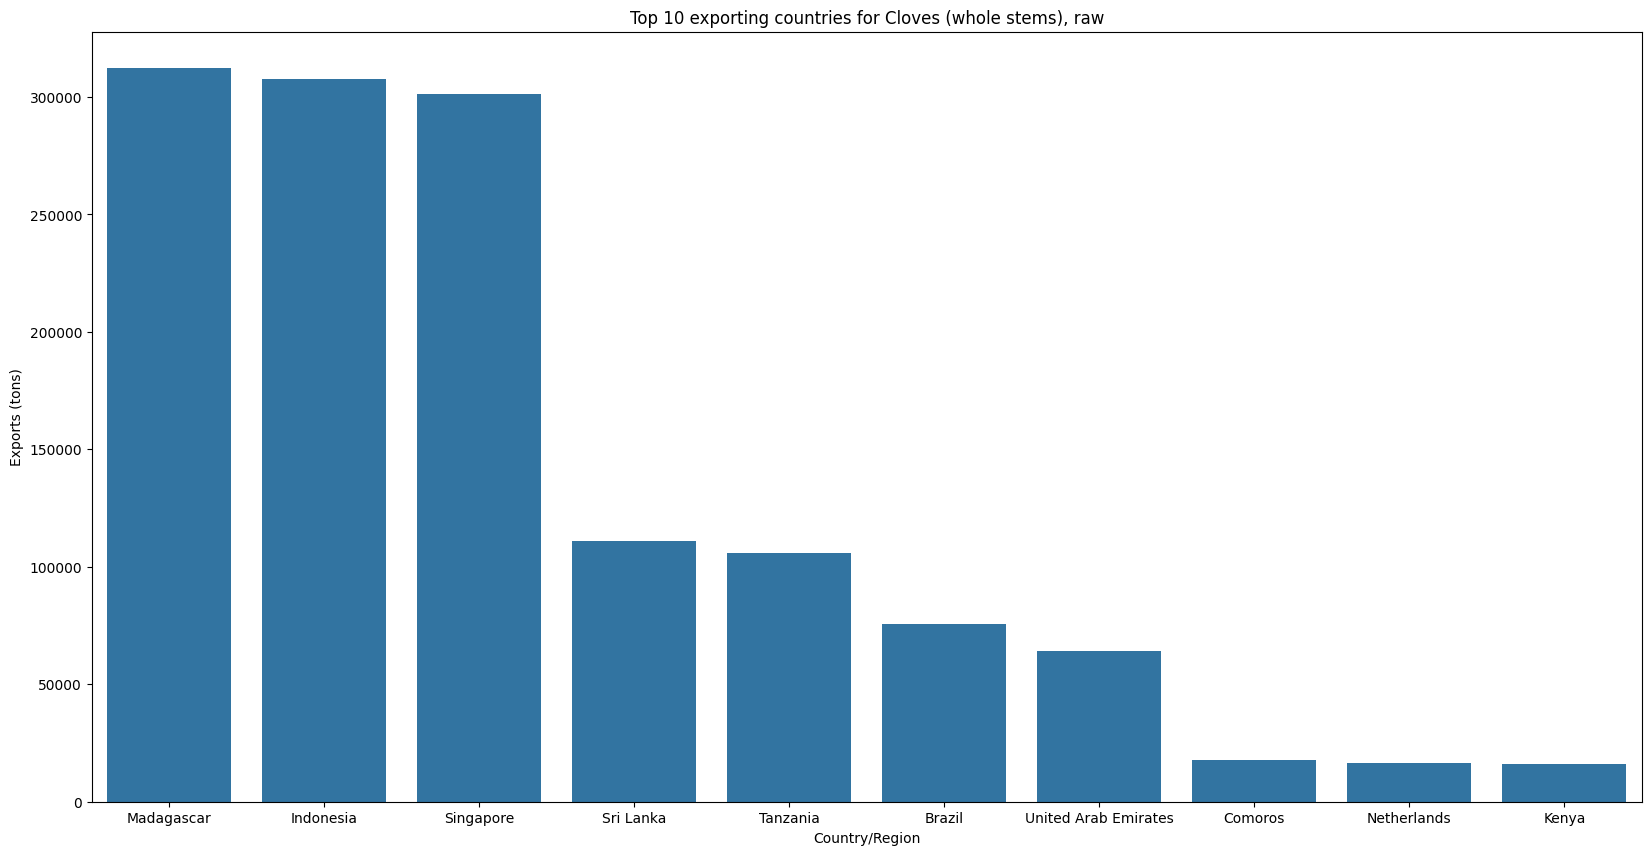

Top 10 exporting countries for Ginger, raw
                Area         Item     Export 
35             China  Ginger, raw  8758979.35
39   China, mainland  Ginger, raw  8661095.77
177         Thailand  Ginger, raw  1111501.32
84             India  Ginger, raw   900800.53
124      Netherlands  Ginger, raw   735109.18
85         Indonesia  Ginger, raw   595708.82
123            Nepal  Ginger, raw   558557.51
129          Nigeria  Ginger, raw   427224.85
139             Peru  Ginger, raw   356448.63
23            Brazil  Ginger, raw   339220.79


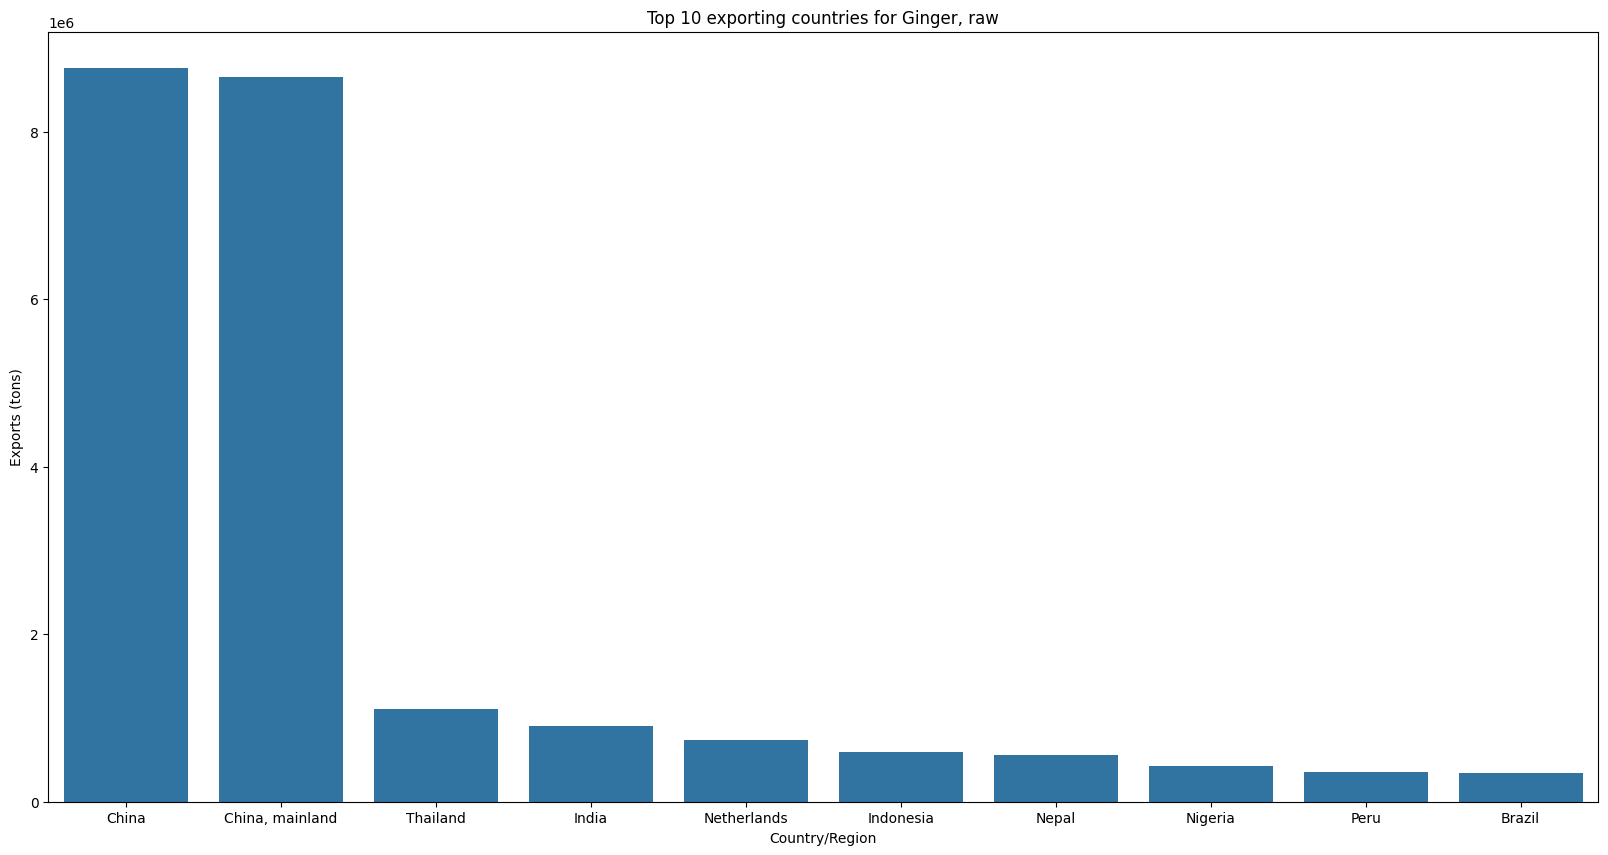

Top 10 exporting countries for Nutmeg, mace, cardamoms, raw
                     Area                          Item    Export 
75              Guatemala  Nutmeg, mace, cardamoms, raw  903504.39
84              Indonesia  Nutmeg, mace, cardamoms, raw  598955.81
83                  India  Nutmeg, mace, cardamoms, raw  194696.39
122                 Nepal  Nutmeg, mace, cardamoms, raw  130249.75
159             Singapore  Nutmeg, mace, cardamoms, raw  105513.34
188  United Arab Emirates  Nutmeg, mace, cardamoms, raw   97569.05
123           Netherlands  Nutmeg, mace, cardamoms, raw   76552.84
167             Sri Lanka  Nutmeg, mace, cardamoms, raw   51383.84
119               Myanmar  Nutmeg, mace, cardamoms, raw   23371.26
71                Germany  Nutmeg, mace, cardamoms, raw   20356.06


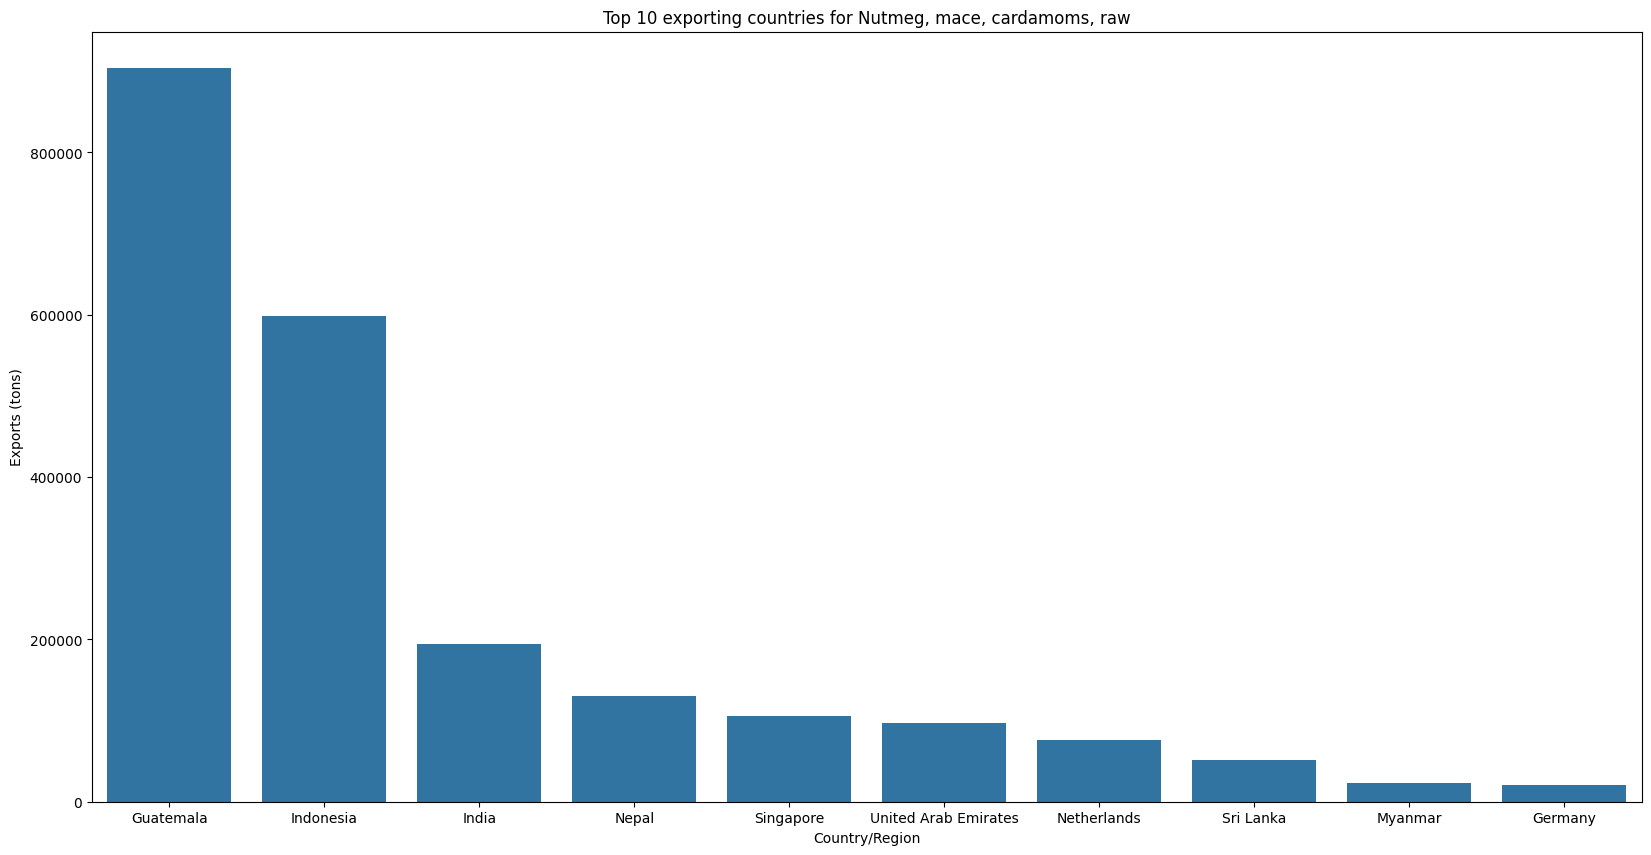

Top 10 exporting countries for Pepper (Piper spp.), raw
                     Area                      Item     Export 
195              Viet Nam  Pepper (Piper spp.), raw  2259545.90
85              Indonesia  Pepper (Piper spp.), raw  1390385.71
23                 Brazil  Pepper (Piper spp.), raw  1307344.05
84                  India  Pepper (Piper spp.), raw   868217.59
160             Singapore  Pepper (Piper spp.), raw   636047.36
109              Malaysia  Pepper (Piper spp.), raw   492925.03
124           Netherlands  Pepper (Piper spp.), raw   326497.09
72                Germany  Pepper (Piper spp.), raw   290440.69
168             Sri Lanka  Pepper (Piper spp.), raw   256120.95
189  United Arab Emirates  Pepper (Piper spp.), raw   244811.12


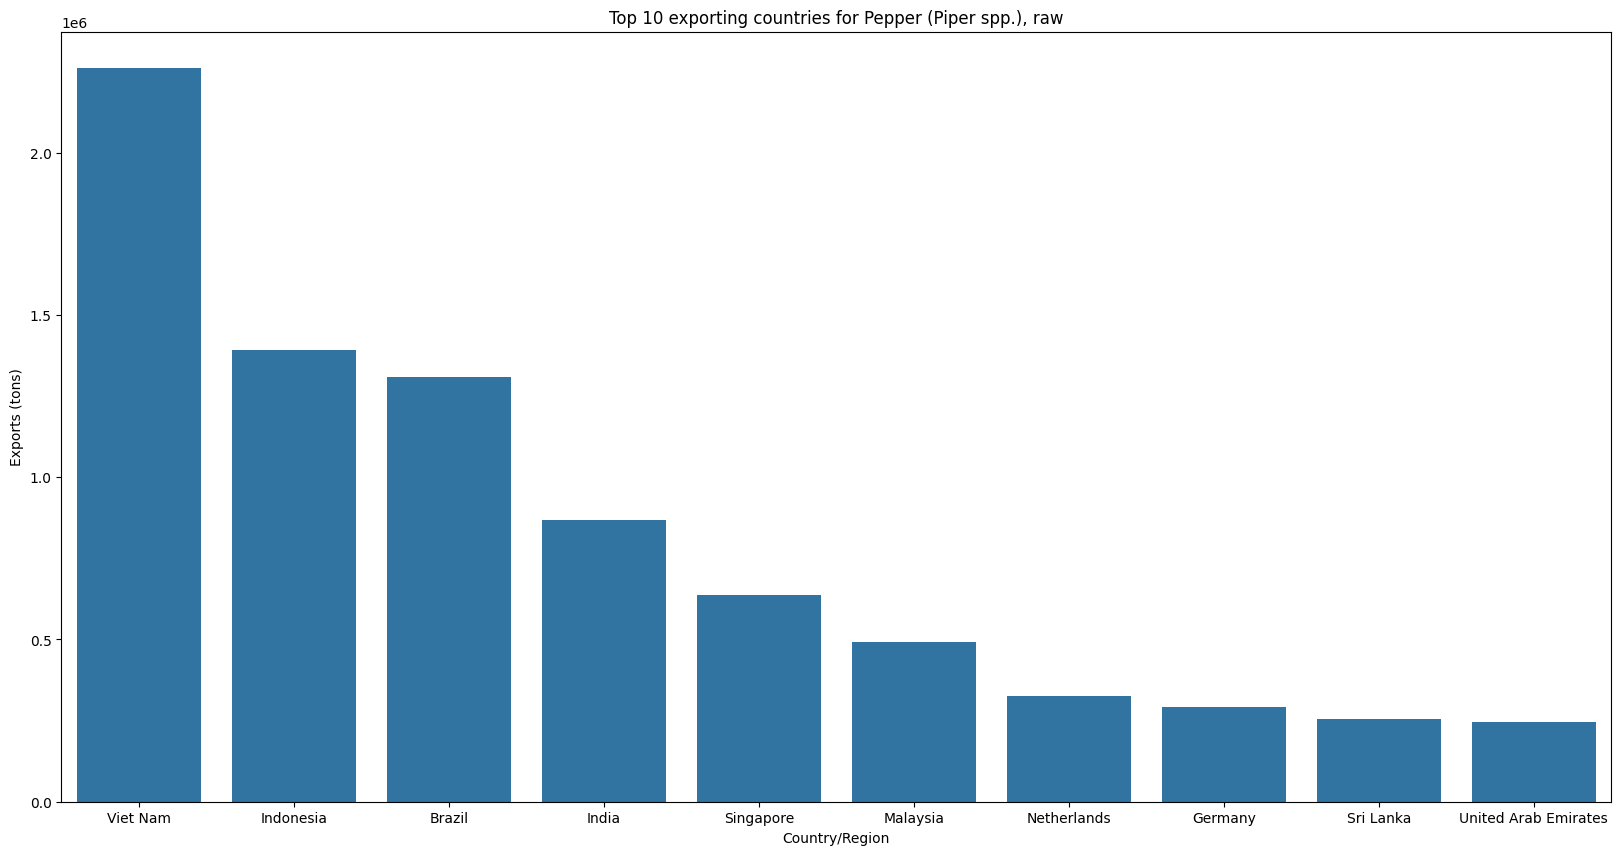

Top 10 exporting countries for Vanilla, raw
                         Area          Item   Export 
107                Madagascar  Vanilla, raw  41657.76
85                  Indonesia  Vanilla, raw  14294.77
67                     France  Vanilla, raw  11980.18
188  United States of America  Vanilla, raw   8709.61
72                    Germany  Vanilla, raw   7643.07
31                     Canada  Vanilla, raw   6602.39
136          Papua New Guinea  Vanilla, raw   5764.83
183                   Türkiye  Vanilla, raw   4962.77
84                      India  Vanilla, raw   4085.67
123               Netherlands  Vanilla, raw   4016.53


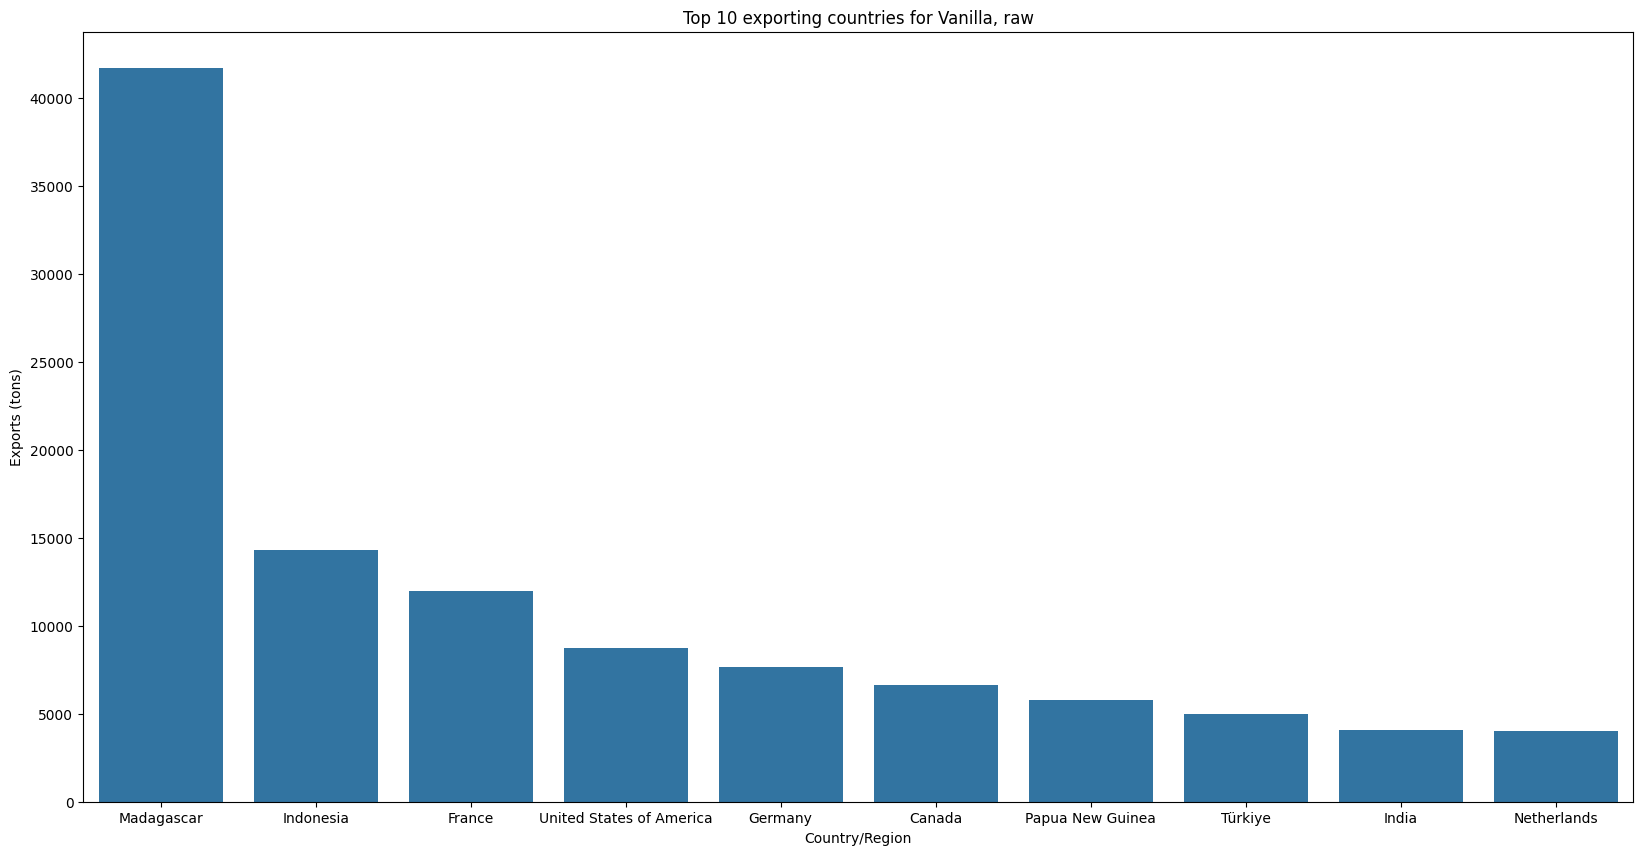

In [ ]:
#Top 10 exporting countries per spice
for spice in data['Item'].unique():
  print(f'Top 10 exporting countries for {spice}')
  top_10_exporting_countries = (data[data['Item'] == spice].groupby(data['Area'])['Export '].sum().reset_index().sort_values(by = 'Export ', ascending = False).head(10))
  top_10_exporting_countries['Item'] = spice
  top_10_exporting_countries = top_10_exporting_countries[['Area', 'Item', 'Export ']]
  print(top_10_exporting_countries)

 #Visualizing the data
  plt.figure(figsize= (20,10))
  sns.barplot(x = top_10_exporting_countries['Area'], y = top_10_exporting_countries['Export '])
  plt.title(f'Top 10 exporting countries for {spice}')
  plt.xlabel('Country/Region')
  plt.ylabel('Exports (tons)')
  plt.show()


##**Check for the countries with the highest spice exports recorded per spice from the year 1993 to the year 2023**
* India is the leading country in the exportation of *Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw* with a recorded 3, 874, 256.43 tonnes of spice exported, followed by Syrian Arab Republic with a recorded 916, 048.71 tonnes of spice exported, followed by Bulgaria with a recorded 638, 633.07 tonnes of spice exported, followed  by Iran with a recorded 549, 574.52 tonnes of spice exported, followed by Russia with a recorded 495, 485.41 tonnes of spice exported.
* India is also the leading country in the exportation of *Chillies and peppers, dry (Capsicum spp., Pimenta spp.), raw* with a recorded 7, 034, 182.41 tonnes of spice exported, followed by China with a recorded 3, 735, 581.80 tonnes of spice exported, followed closely by China, mainland with a recorded 3, 681, 565.08 tonnes of spice exported, followed by Spain with a recorded 1, 207, 350.45 tonnes of spice exported, followed by Peru with a recorded 890, 240 tonnes of spice exported.
* Mexico is the leading country in the exportation of *Chillies and peppers, green (Capsicum spp. and Pimenta spp.)* with a recorded 19, 695, 951.95 tonnes of spice exported, followed by Spain with a recorded 16, 669, 541.61 tonnes of spice exported, followed by Netherlands with a recorded 11, 053, 114.26 tonnes of spice exported, followed by the United States of America with a recorded 3, 058, 930.58 tonnes of spice exported.
* China is the leading country in the exportation of *Cinnamon and cinnamon-tree flowers, raw* with a recorded 1, 276, 069.52 tonnes of spice exported, followed by China, mainland with a recorded 1, 226, 889.63 tonnes of spice exported, followed by Indonesia with a recorded 1, 134, 986.83 tonnes of spice exported, followed by Vietnam with a recorded 819, 745.59 tonnes of spice exported.
* Madagascar is the leading country in the exportation of *Cloves (whole stems), raw* with a recorded 312, 146.94 tonnes of spice exported, followed by Indonesia with a recorded 307, 659.17 tonnes of spice exported, followed by Singapore with a recorded 301, 409.35 tonnes of spice exported, followed by Sri Lanka with a recorded 111, 097.37 tonnes of spice exported, followed by Tanzania with a recorded 105, 916.12 tonnes of spice exported.
* China is the leading country in the exportation of *Ginger, raw* with a recorded 8, 758, 979.35 tonnes of spice exported, followed by China, mainland with a recorded 8, 661, 095.77 tonnes of spice exported, followed by Thailand with a recorded 1, 111, 501.32 tonnes of spice exported, followed by India with a recorded 900, 800.53 tonnes of spice exported.
* Guatemala is the leading country in the exportation of *Nutmeg, mace, cardamoms, raw* with a recorded 903, 504.39 tonnes of spice exported, followed by Indonesia with a recorded 598, 955.81 tonnes of spice exported, followed by India with a recorded 194, 696.39 tonnes of spice exported, followed by Nepal with a recorded 130, 249.75 tonnes of spice exported.
* Vietnam is the leading country in the exportation of *Pepper (Piper spp.), raw* with a recorded 2, 259, 545.90 tonnes of spice exported, followed by Indonesia with a recorded 1, 390, 385.71 tonnes of spice exported, followed by Brazil with a recorded 1, 307, 344.05 tonnes of spice exported, followed by India with a recorded 868, 217.59 tonnes of spice exported.
* Madagascar is the leading country in the exportation of *Vanilla, raw* with a recorded 41, 657.76 tonnes of spice exported, followed by Indonesia with a recorded 14, 294.77 tonnes of spice exported, followed by France with a recorded 11, 980.18 tonnes of spice exported, followed by the United States of America with a recorded 8, 709.61 tonnes of spice exported.

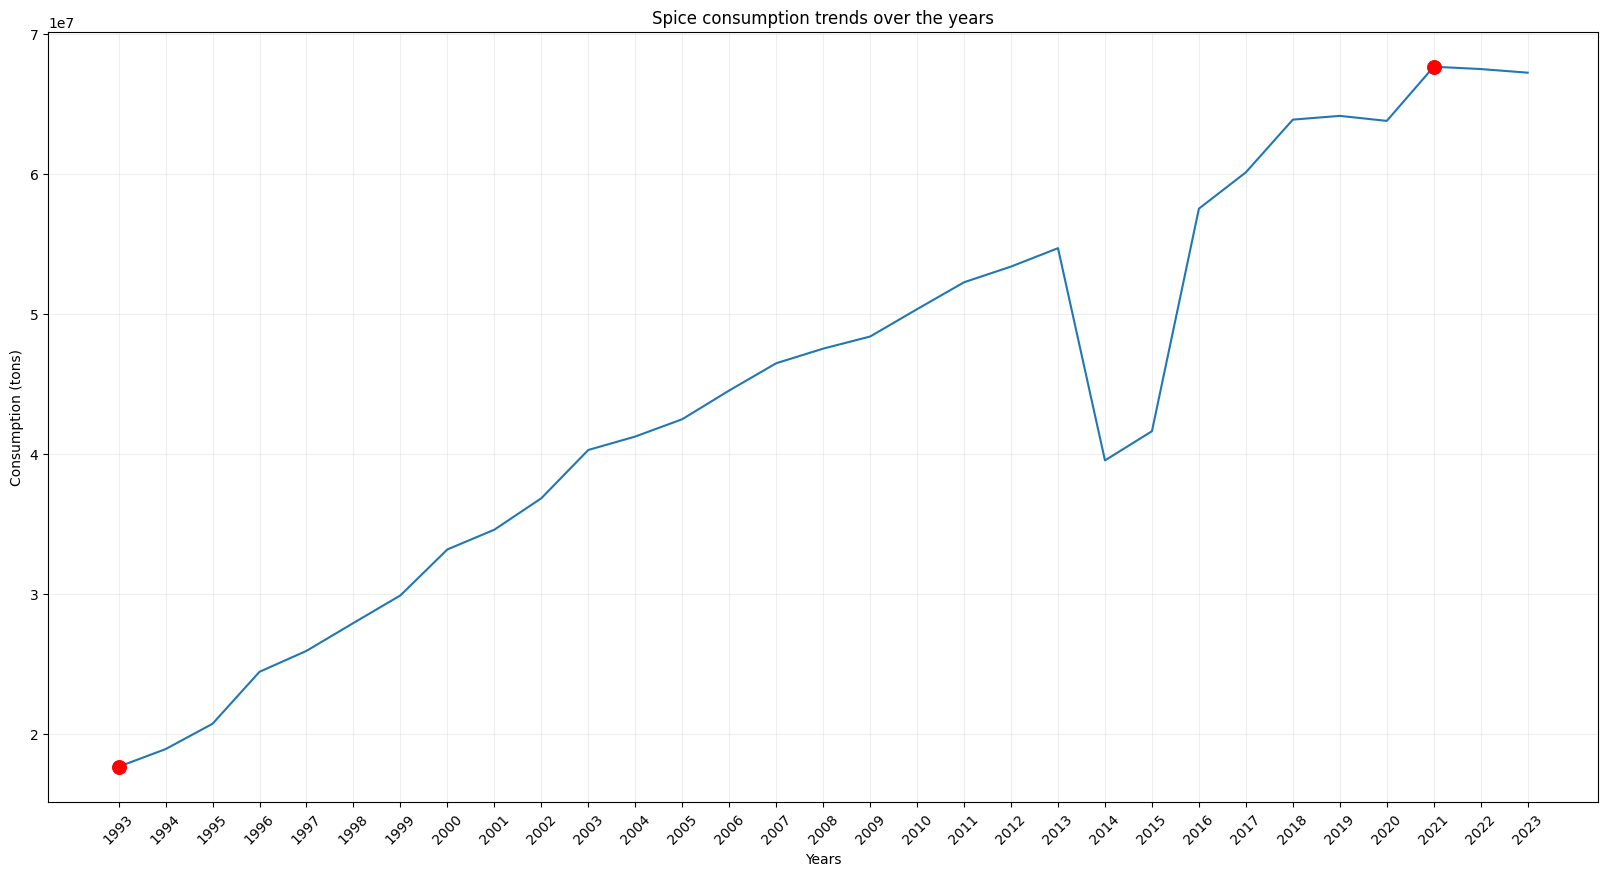

In [ ]:
#Trends in spice consumption over the years
consumption_trends_over_the_years = data.groupby('Year')['Consumption'].sum().sort_index()

  #Visualizing the data in a lineplot
plt.figure(figsize = (20,10))
year_list = consumption_trends_over_the_years.index.tolist()
max_idx = year_list.index(consumption_trends_over_the_years.idxmax())
min_idx = year_list.index(consumption_trends_over_the_years.idxmin())
ax = sns.lineplot(x = consumption_trends_over_the_years.index, y = consumption_trends_over_the_years.values, marker='o', markevery=[max_idx,min_idx],
             markersize=10, markeredgecolor= 'red', markerfacecolor = 'red')
plt.title(f'Spice consumption trends over the years')
plt.xticks(consumption_trends_over_the_years.index, rotation = 45)
plt.grid(alpha = 0.2)
plt.xlabel('Years')
plt.ylabel('Consumption (tons)')
plt.show()

##**Check for trends in the consumption of spice recorded from the year 1993 to the year 2023**
* The year with the least spice consumption was the year 1993 with a recorded 17 million tonnes of spice consumed globally.
* The year with the most recorded spice consumption is 2021 with a record of 68 million tonnes of spice exported.
* There has been a steady increase in the consumption of spice from the year 1993 to 2013 when a significant drop of 15 million tonnes of spice consumed in 2014 relative to the previous year, 2013.
* There was a steep rise of spice consumption of 24 million tonnes of spice consumed from 2015 to the year 2018 when the spice consumption adopted a gradual rise.

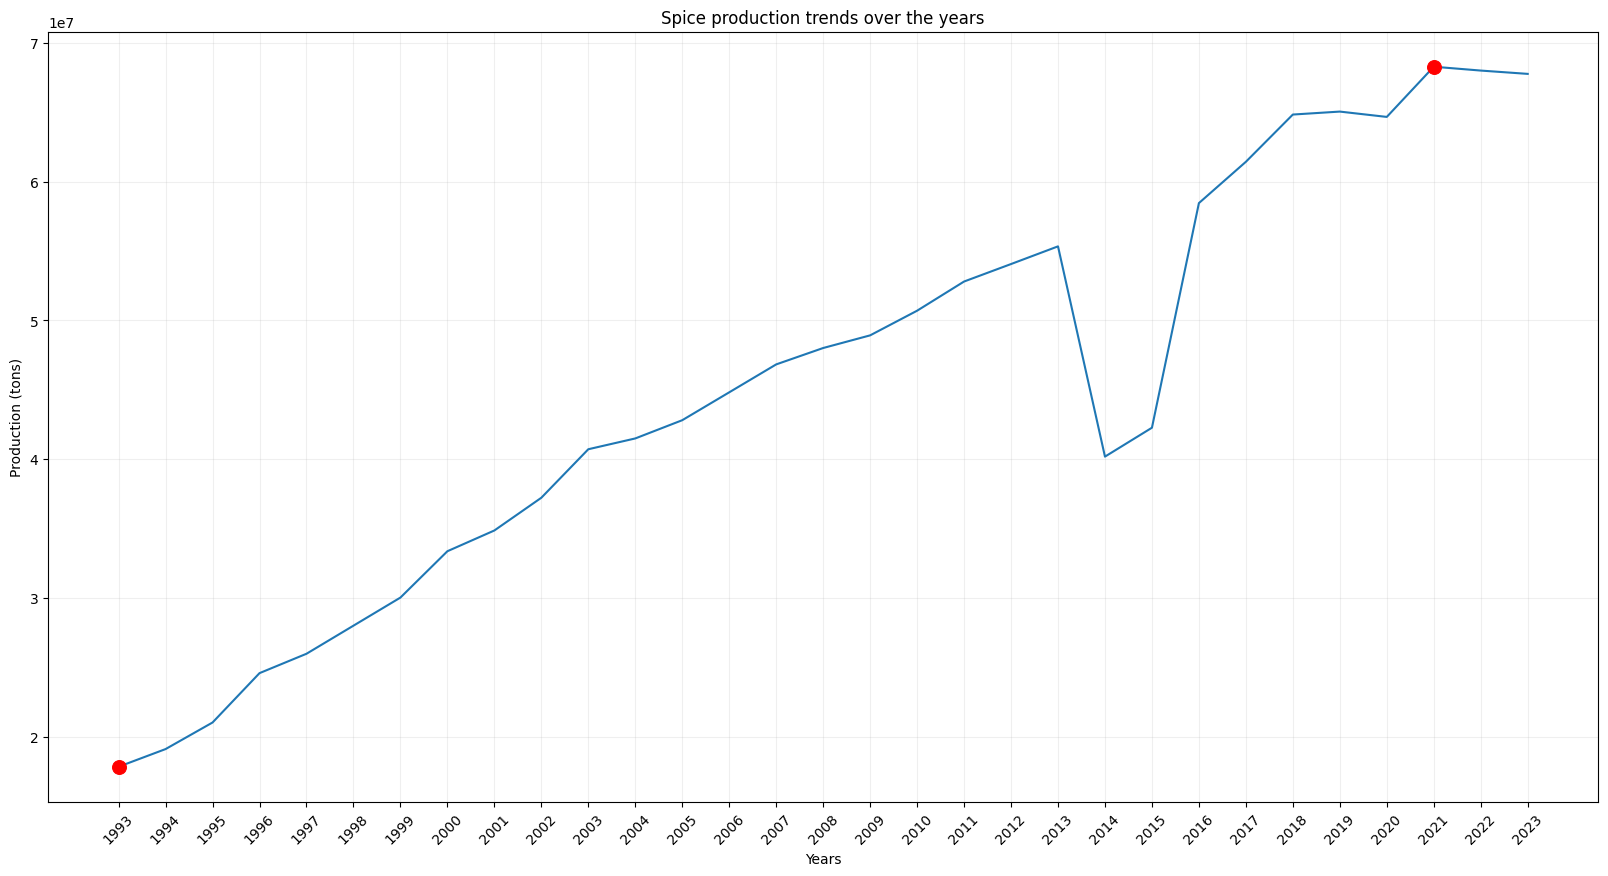

In [ ]:
#Trends in spice production over the years
production_trends_over_the_years = data.groupby('Year')['Production'].sum().sort_index()

  #Visualizing the data in a lineplot
plt.figure(figsize = (20,10))
year_list = production_trends_over_the_years.index.tolist()
max_idx = year_list.index(production_trends_over_the_years.idxmax())
min_idx = year_list.index(production_trends_over_the_years.idxmin())
ax = sns.lineplot(x = production_trends_over_the_years.index, y = production_trends_over_the_years.values, marker='o', markevery=[max_idx,min_idx],
             markersize=10, markeredgecolor= 'red', markerfacecolor = 'red' )
plt.title(f'Spice production trends over the years')
plt.xticks(production_trends_over_the_years.index, rotation = 45)
plt.grid(alpha = 0.2)
plt.xlabel('Years')
plt.ylabel('Production (tons)')
plt.show()


##**Check for trends in the production of spice recorded from the year 1993 to the year 2023**
* The year with the least production of spice is the year 1993 with a recorded 18 million.
* The year with the most recorded production of spice was the year 2021 with a recorded 68.5 million tonnes of spice produced.
* There was a steady increase in the production of spice from the year 1993 to the year 2013 when there occured a significant drop of 15 million tonnes of spice produced, then a steep increase in the production of spice occured from the year 2014 to 2018 with a significant rise of 25 million tonnes of spice produced.
* From the year 2018 to 2023, there was a slight increase in the production of spice.

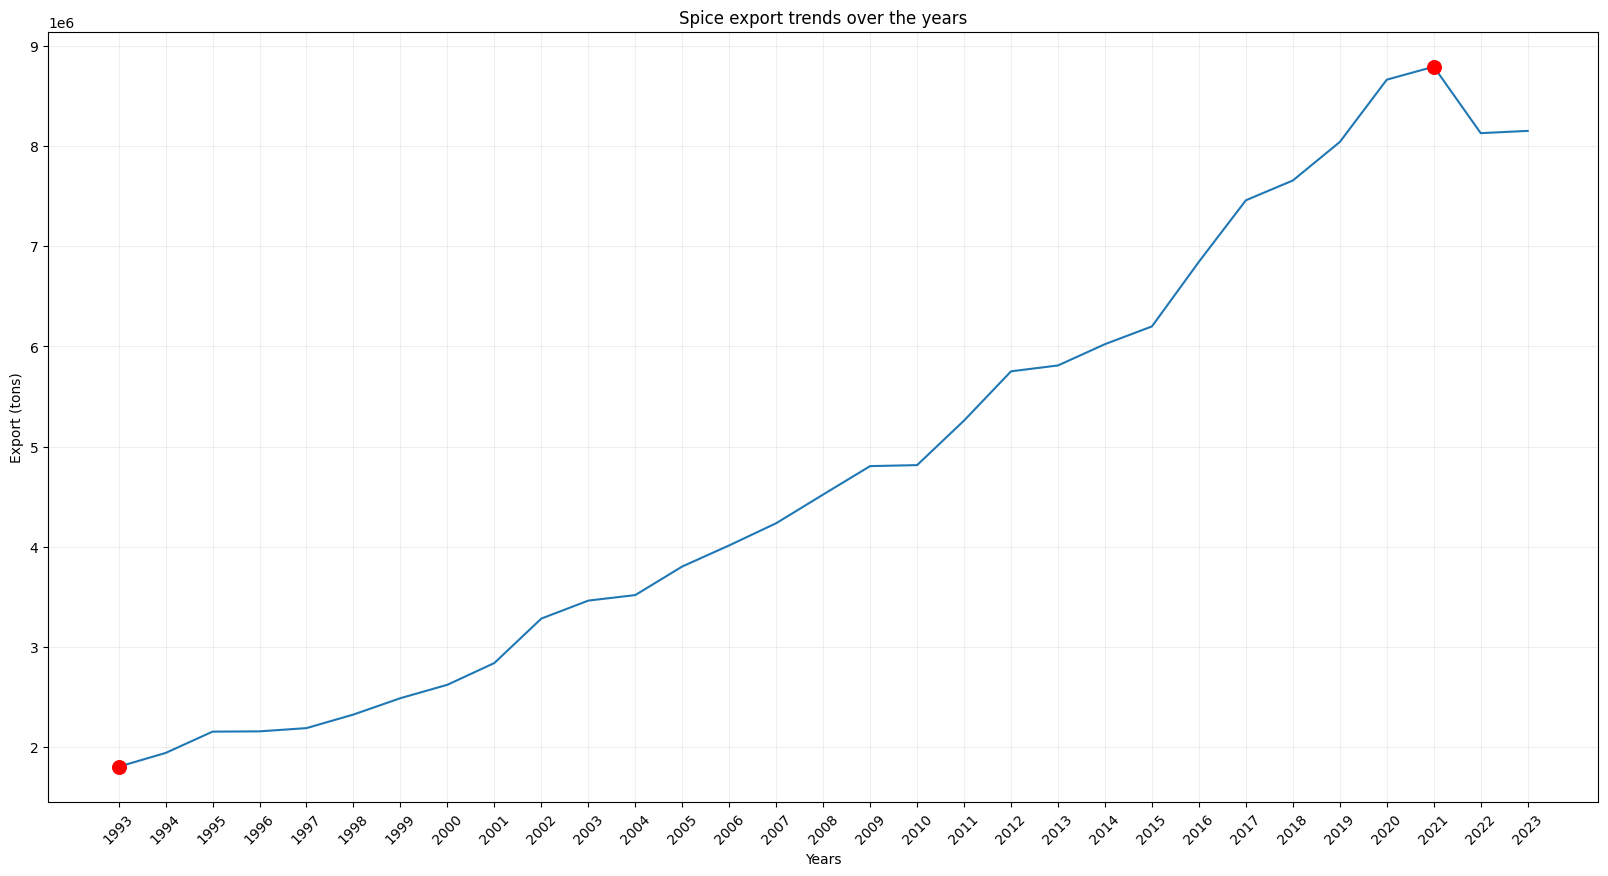

In [ ]:
#Trends in spice export over the years
export_trends_over_the_years = data.groupby('Year')['Export '].sum().sort_index()

  #Visualizing the data in a lineplot
plt.figure(figsize = (20,10))
year_list = export_trends_over_the_years.index.tolist()
max_idx = year_list.index(export_trends_over_the_years.idxmax())
min_idx = year_list.index(export_trends_over_the_years.idxmin())
ax = sns.lineplot(x = export_trends_over_the_years.index, y = export_trends_over_the_years.values, marker='o', markevery=[max_idx,min_idx],
             markersize=10, markeredgecolor= 'red', markerfacecolor = 'red' )
plt.title(f'Spice export trends over the years')
plt.xticks(export_trends_over_the_years.index, rotation=45)  # Show all years
plt.grid(alpha = 0.2)
plt.xlabel('Years')
plt.ylabel('Export (tons)')
plt.show()

##**Check for trends in the export of spice recorded from the year 1993 to the year 2023**
* The year with the most exports of spice was the year 2021 with a recorded 8.9 million tonnes of spice exported.
* The year with the least exports of spice was the year 1993 with a recorded 1.9 million tonnes of spice exported
* There has been a steady rise in the exports of spice from the year 1993 to the year 2021 when a steady decrease of half a million tonnes of spice exported was recorded. From 2022 to 2023, the spice exports remained constant.

Trends for production of Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw


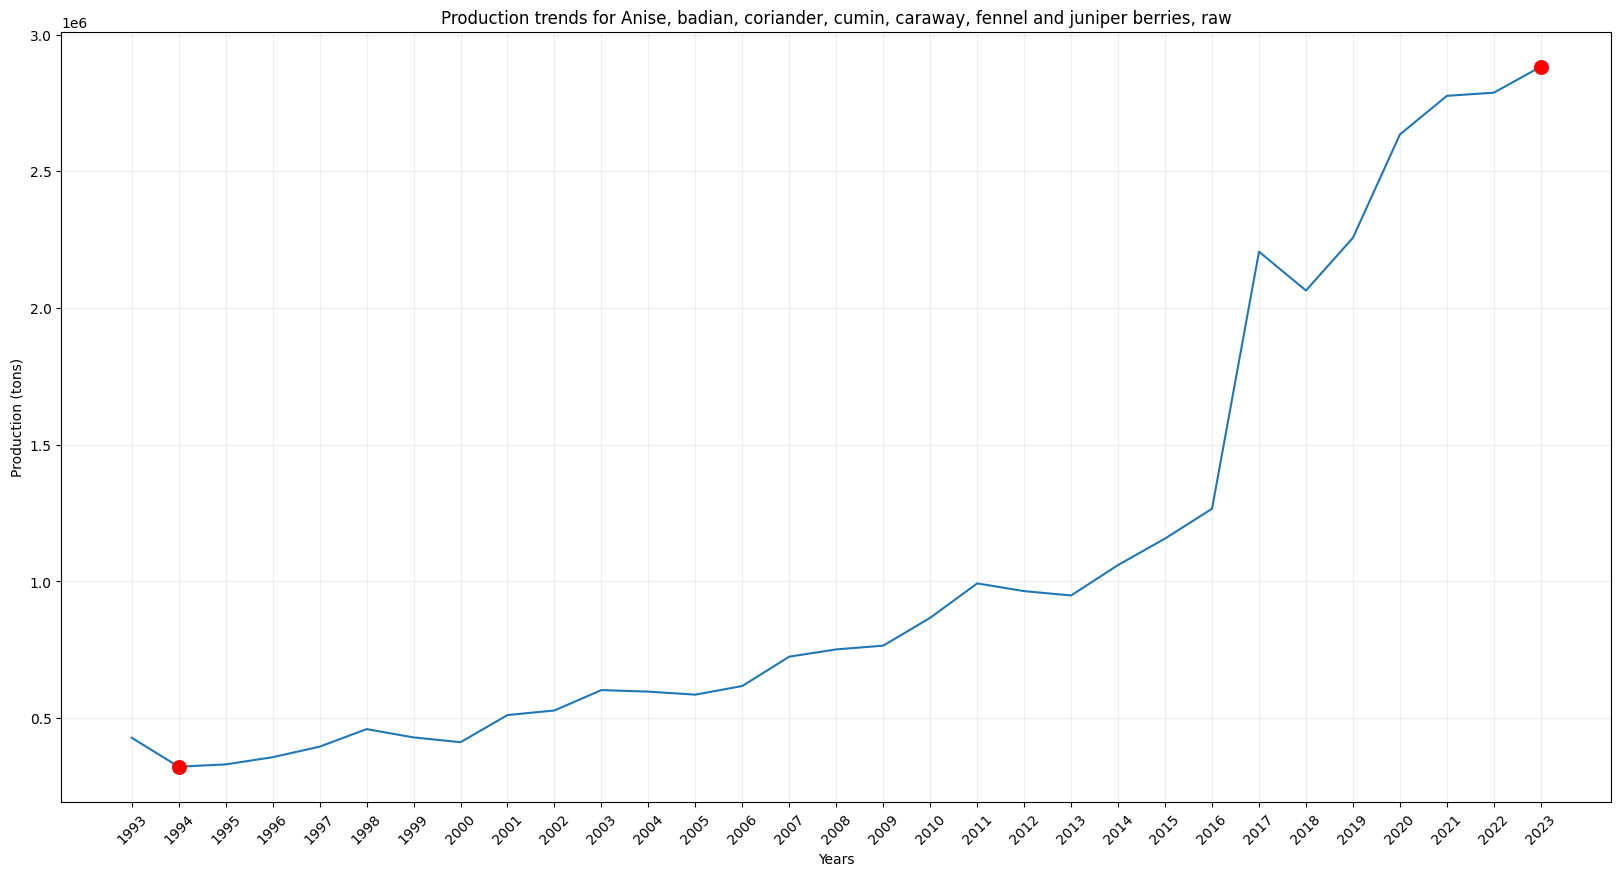

Trends for production of Chillies and peppers, dry (Capsicum spp., Pimenta spp.), raw


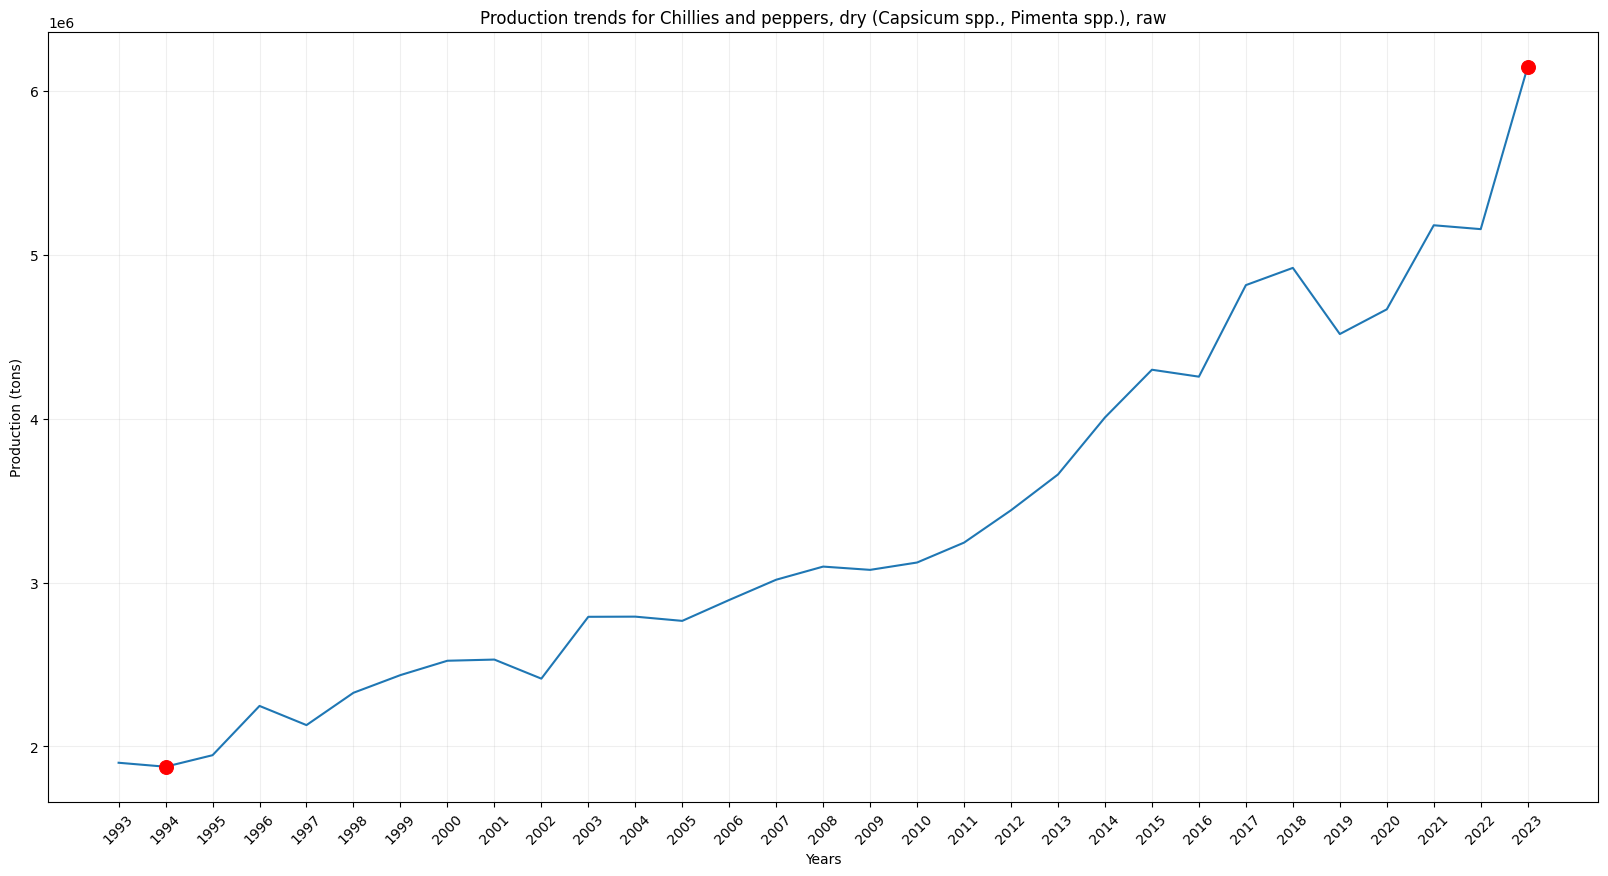

Trends for production of Chillies and peppers, green (Capsicum spp. and Pimenta spp.)


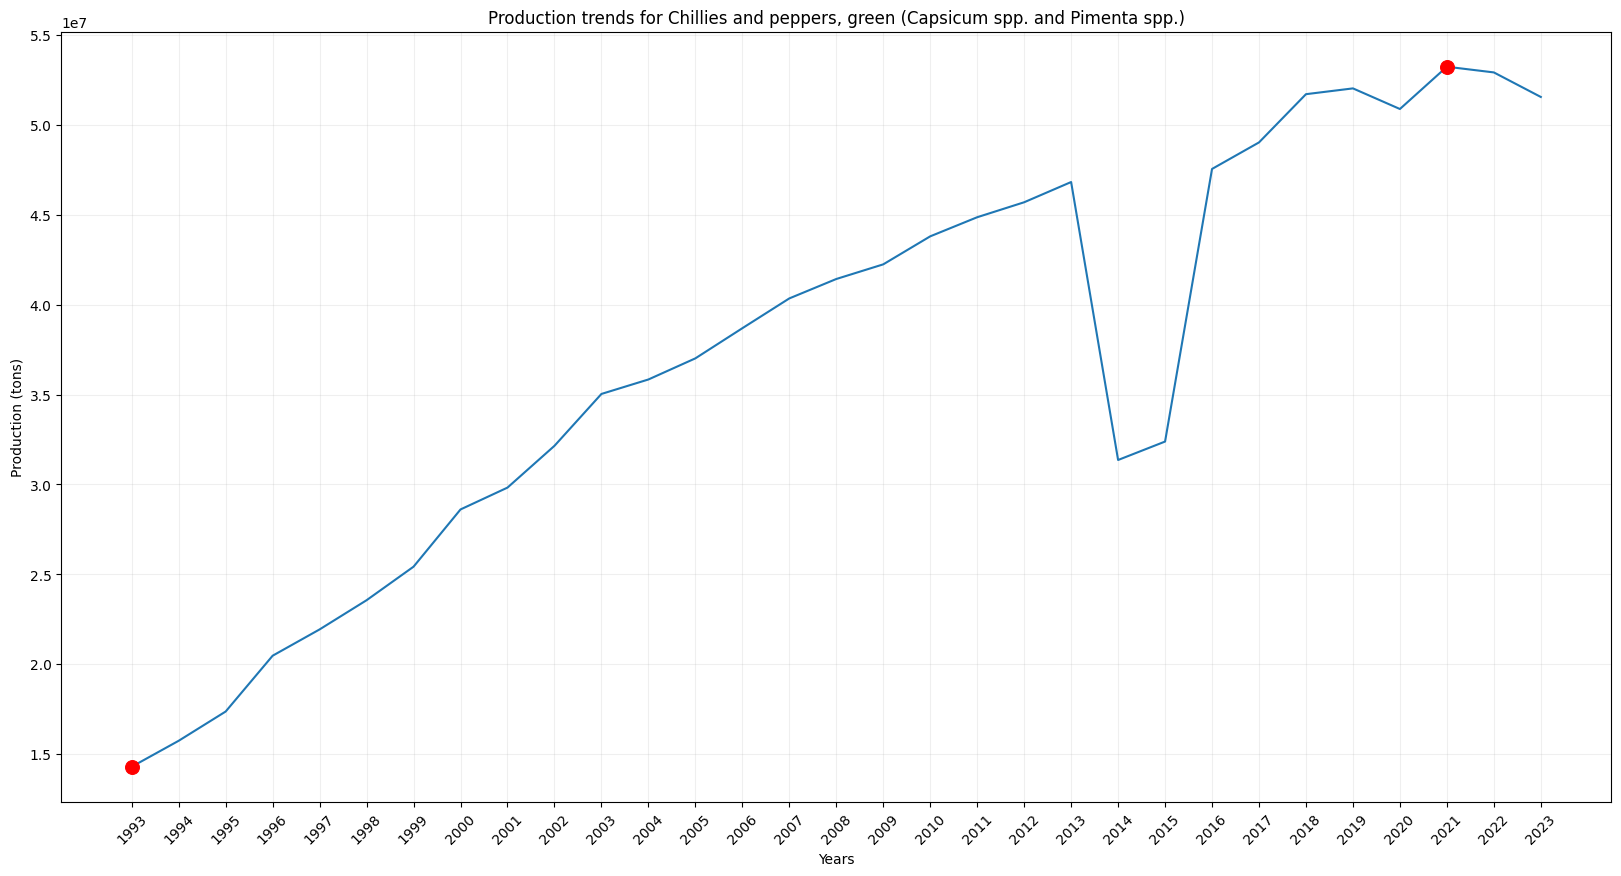

Trends for production of Cinnamon and cinnamon-tree flowers, raw


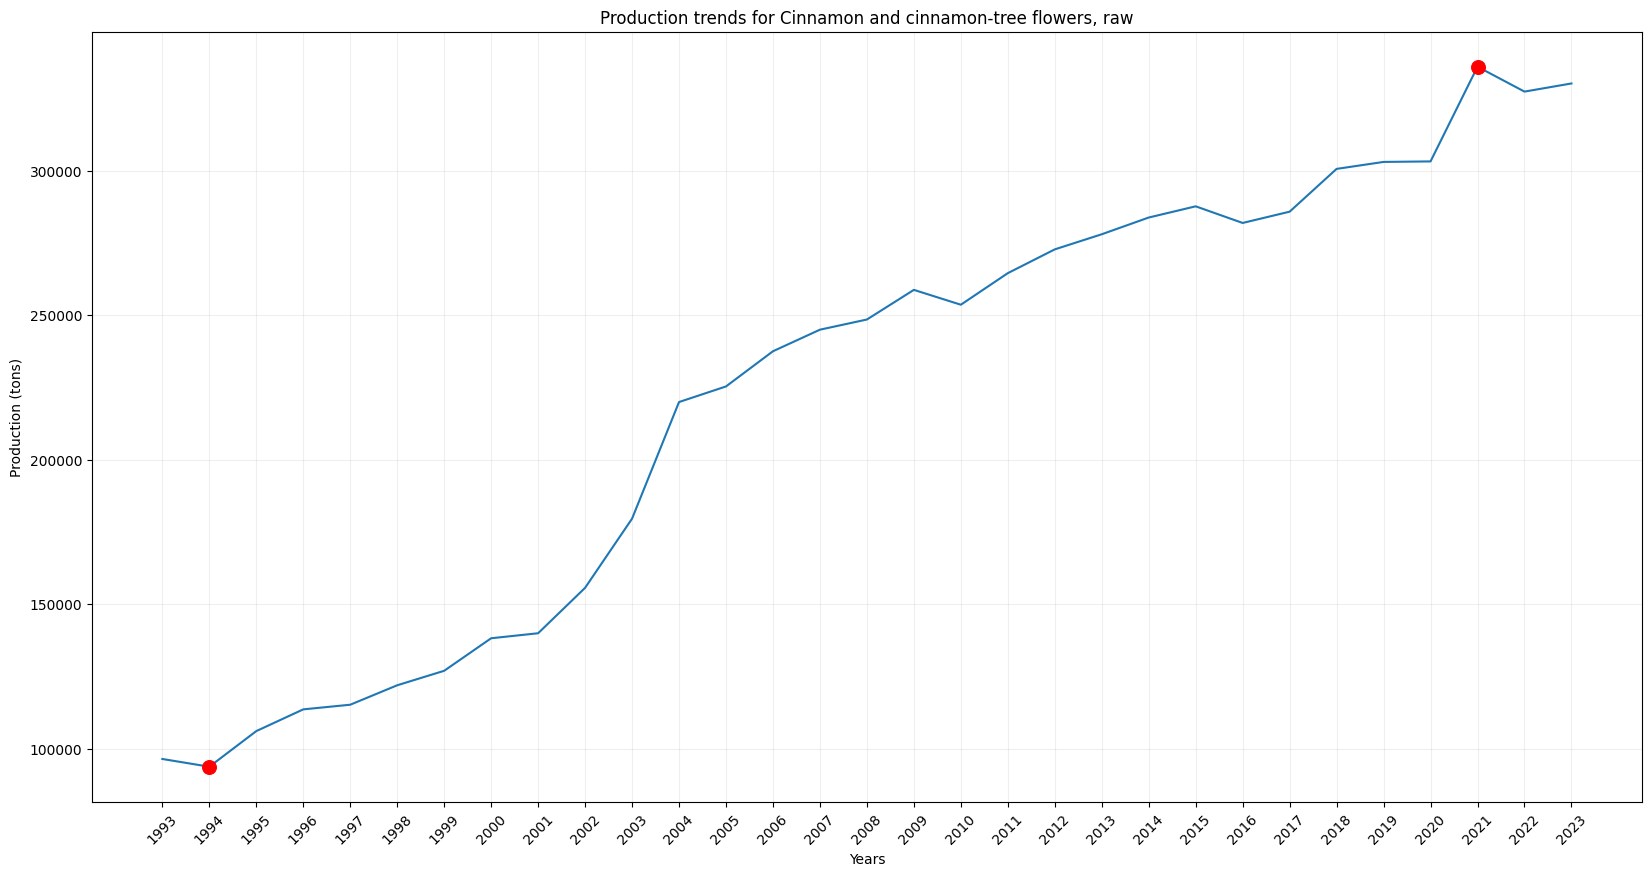

Trends for production of Cloves (whole stems), raw


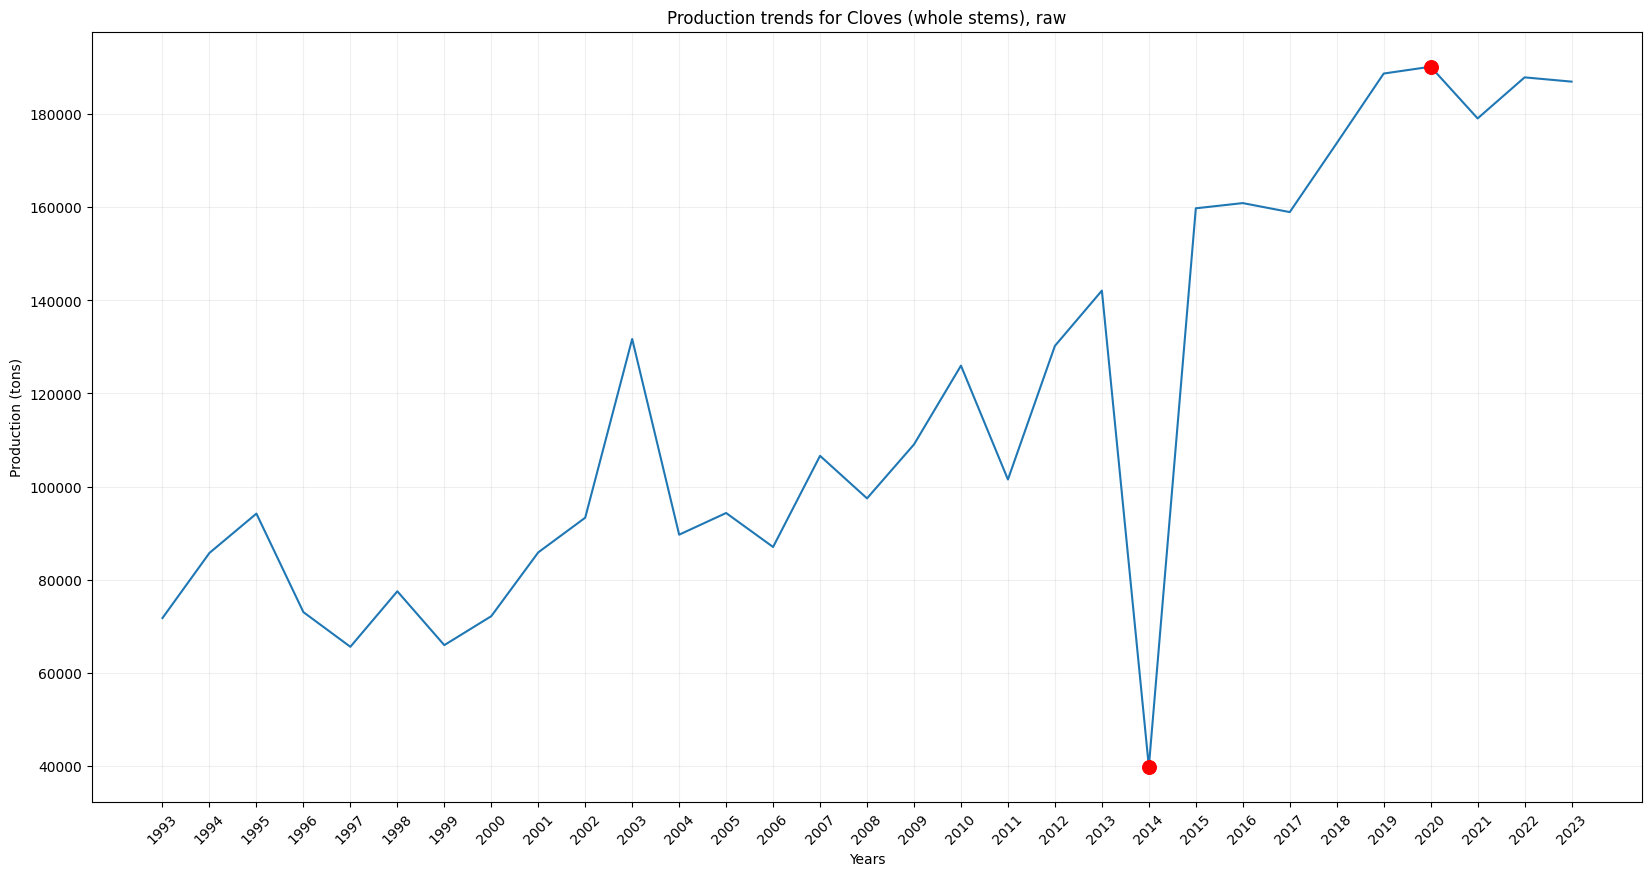

Trends for production of Ginger, raw


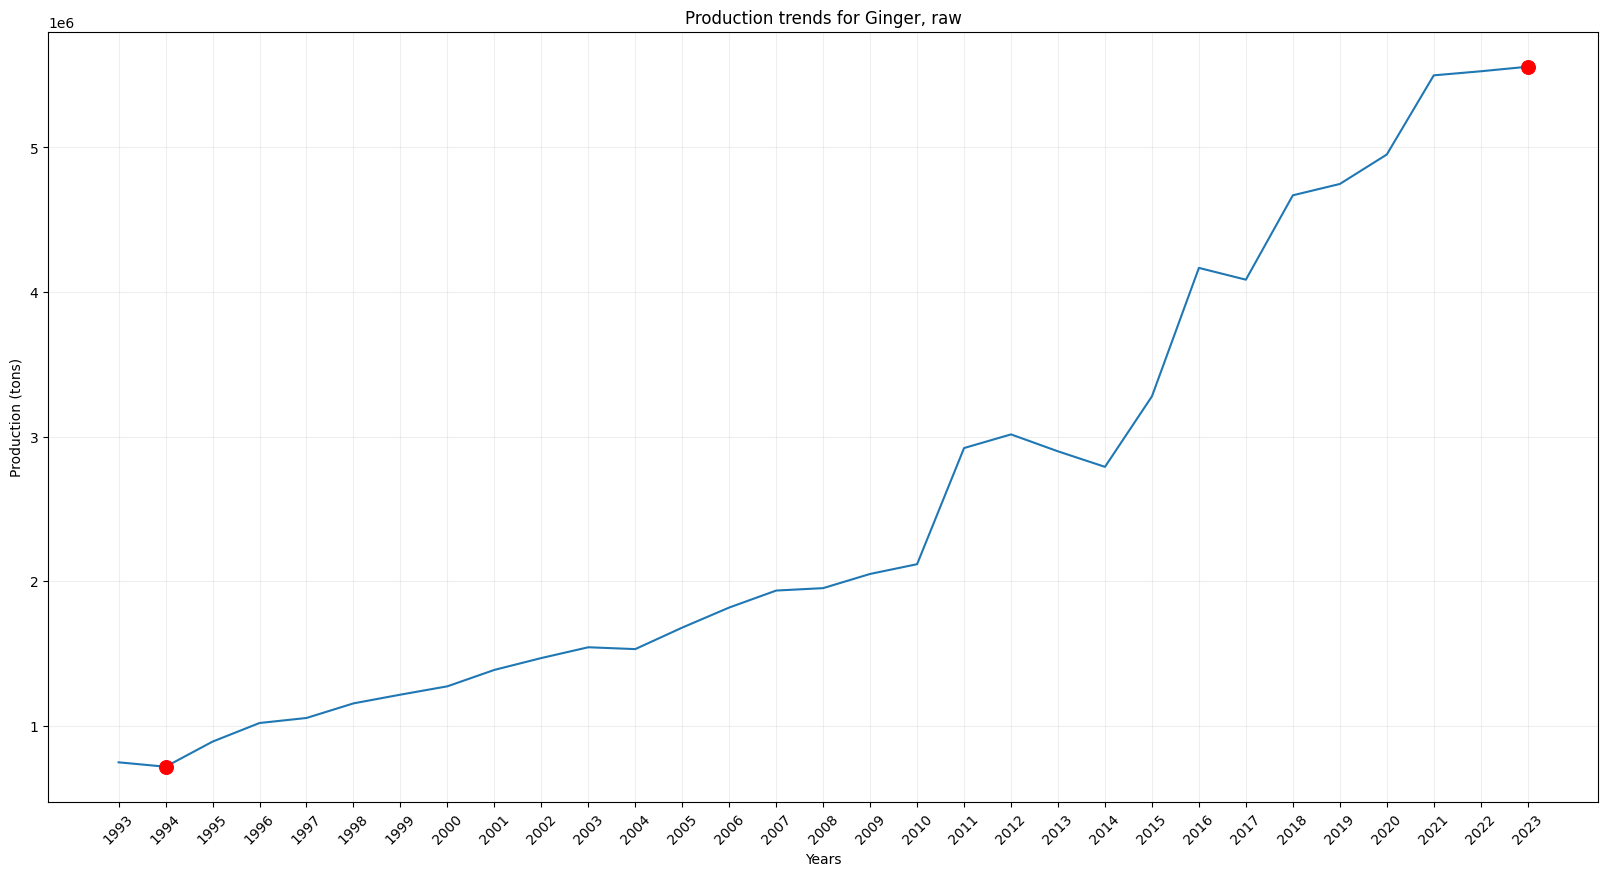

Trends for production of Nutmeg, mace, cardamoms, raw


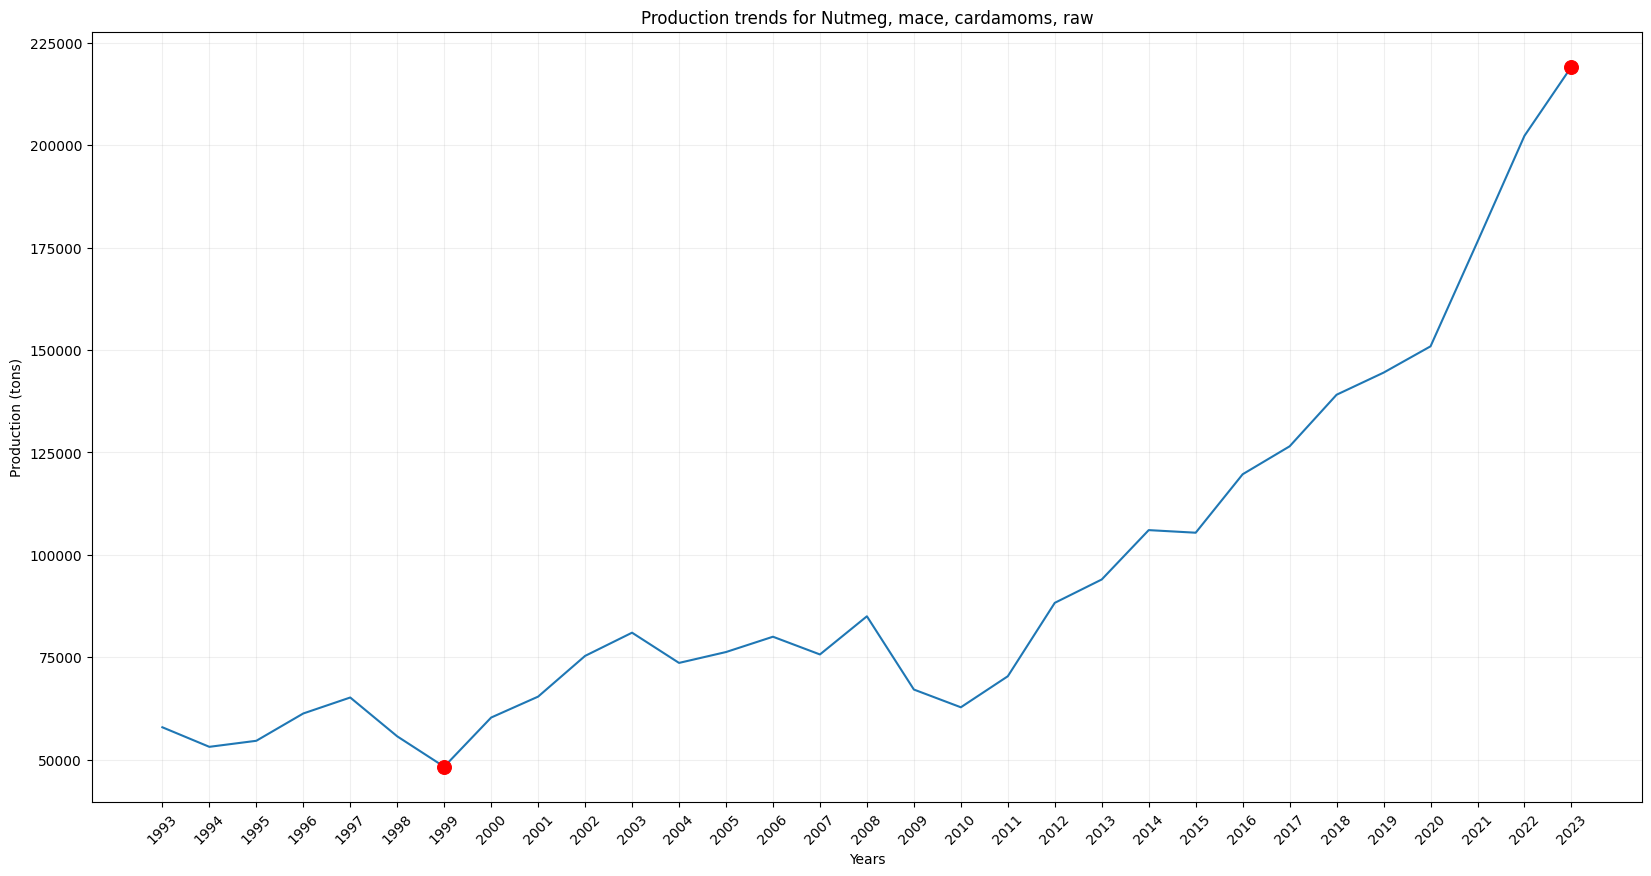

Trends for production of Pepper (Piper spp.), raw


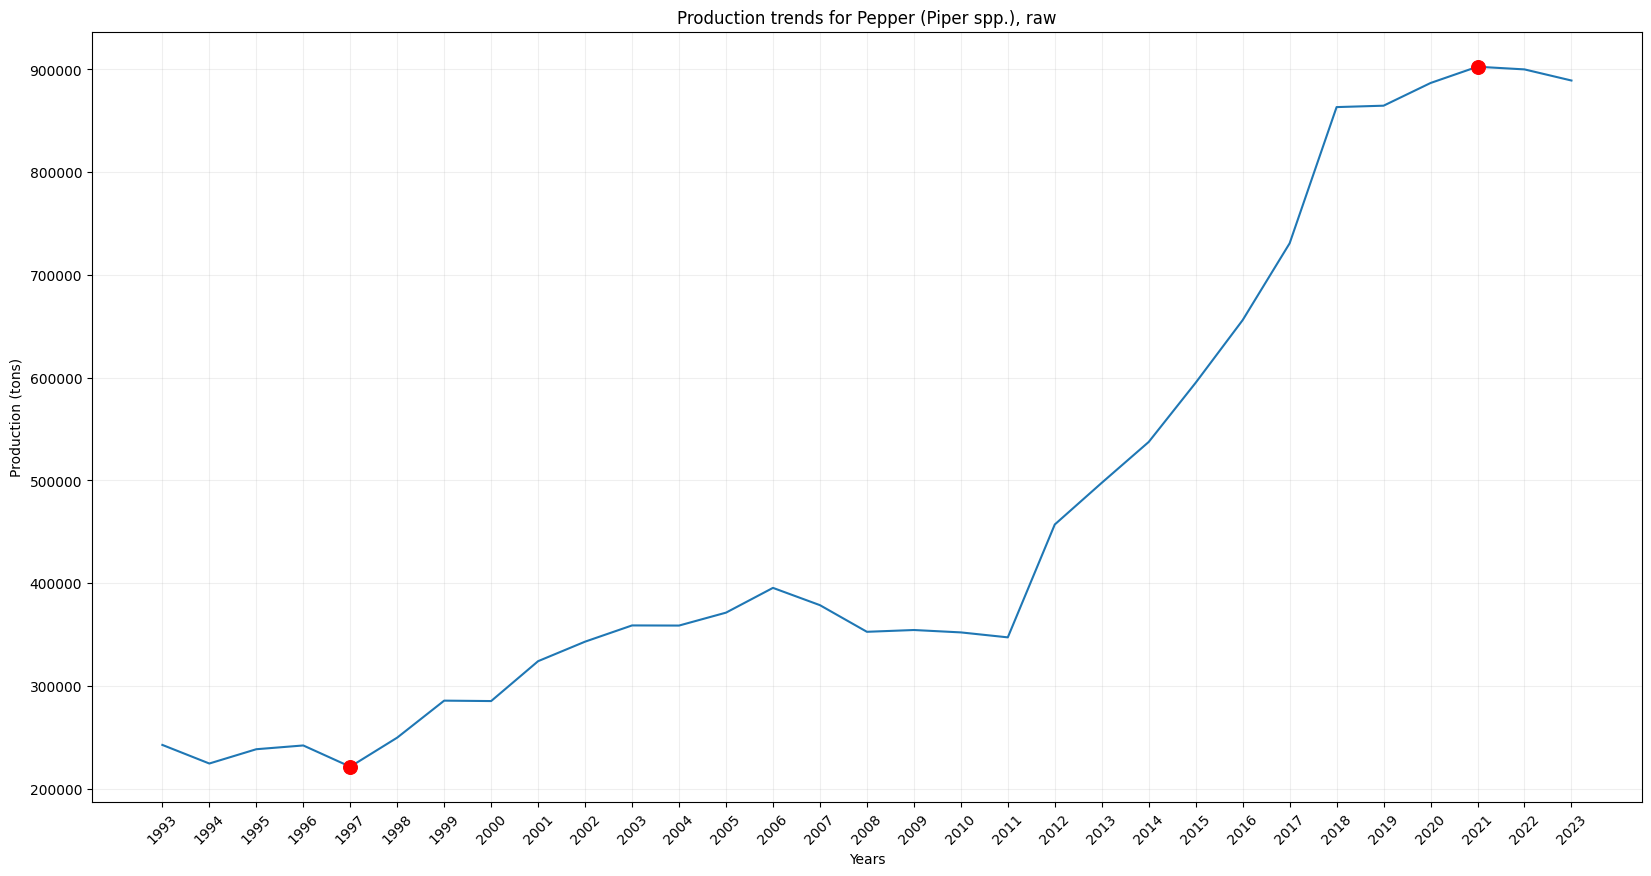

Trends for production of Vanilla, raw


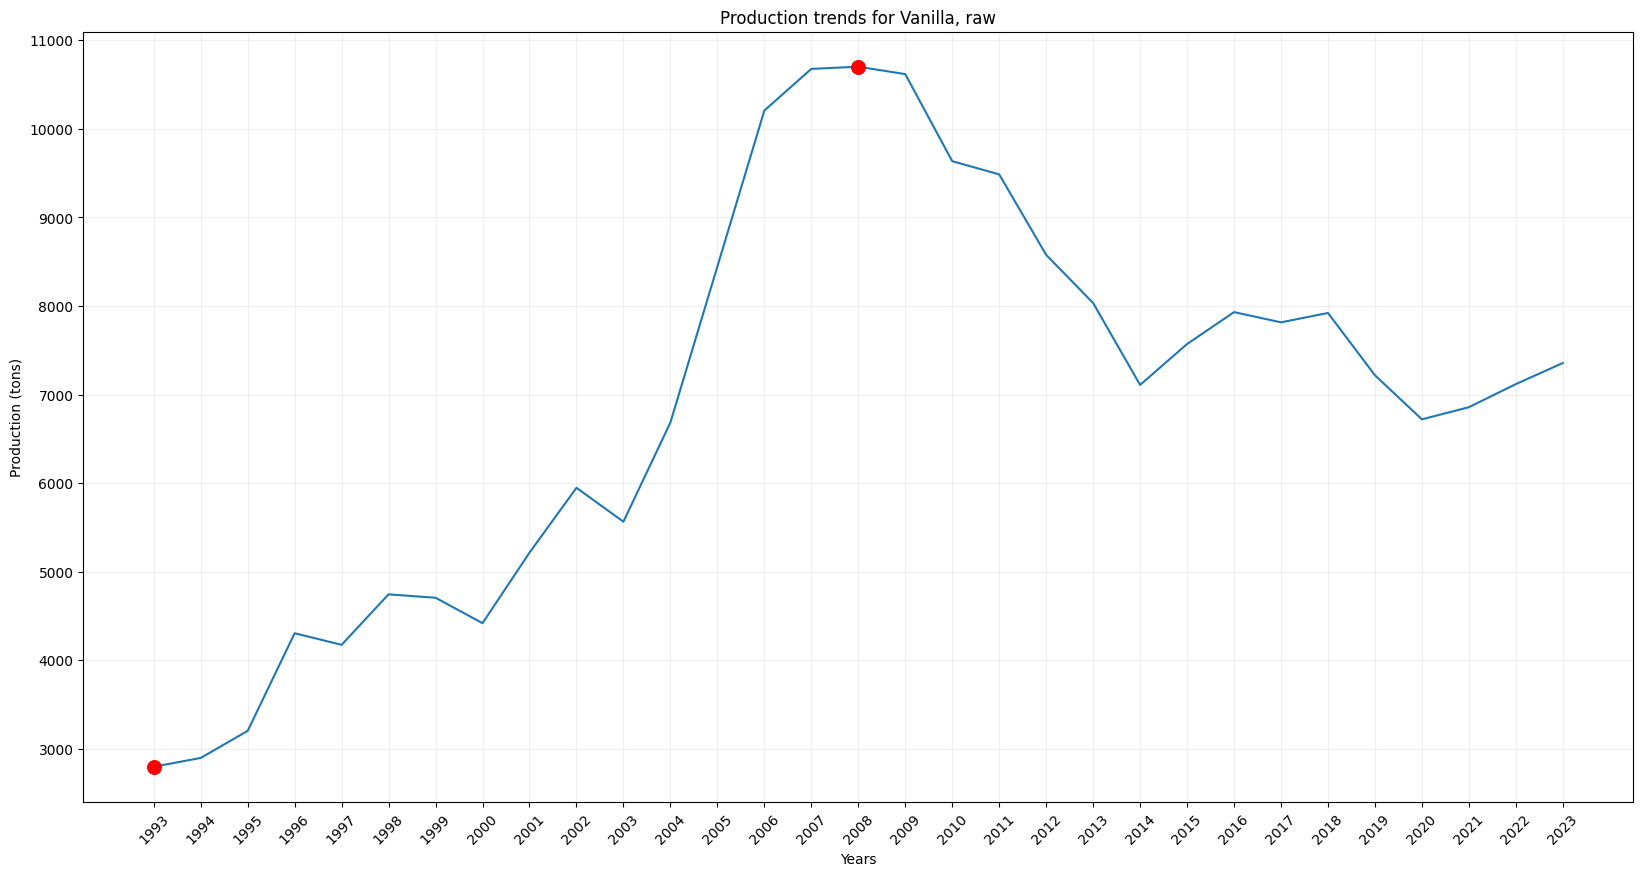

In [ ]:
#Production trends per spice
for spice in data['Item'].unique():
  spice_production_trends= data[data['Item'] == spice].groupby('Year')['Production'].sum().sort_index()
  print(f'Trends for production of {spice}')

  #Visualizing the data using lineplot
  plt.figure(figsize = (20,10))
  year_list = spice_production_trends.index.tolist()
  max_idx = year_list.index(spice_production_trends.idxmax())
  min_idx = year_list.index(spice_production_trends.idxmin())
  ax = sns.lineplot(x = spice_production_trends.index, y = spice_production_trends.values, marker='o', markevery=[max_idx,min_idx],
             markersize=10, markeredgecolor= 'red', markerfacecolor = 'red' )
  plt.title(f'Production trends for {spice}')
  plt.xticks(spice_production_trends.index, rotation=45)  # Show all years
  plt.grid(alpha =0.2)
  plt.xlabel('Years')
  plt.ylabel('Production (tons)')
  plt.show()

##**Check for trends in the production of each spice recorded from the year 1993 to the year 2023**
**1. Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw**
* The year with the least production of this spice was in the year 1994 with a recorded 300, 000 tonnes of spice produced.
* The year with the highest production of this spice was the year 2023 with a recorded 2.9 million tonnes of spice produced.
* There occured a slight decrease of production of this spice from 1993 to 1994 from which a steady increase in the production of this spice was recorded to the year 2016 where a sharp increase of 1 million tonnes of spice produced was recorded, then a slightv decrease of spice produced was recorded in the year 2017 after which a steady increase in the production of spice was recorded till 2023.

**2. Chillies and peppers, dry (Capsicum spp., Pimenta spp.), raw**
* The year with the least production of this spice was the year 1994 with a recorded 1.9 million tonnes of spice produced.
* The year with the highest production of this spice was the year 2023 with a recorded 6.2 million tonnes of spice produced.
* There has been a steady rise of production of this spice from the year 1993 to the year 2018 when a slight decrease was recorded, then a steep increase in the production of this spice was recorded from 2019 to 2023.

**3. Chillies and peppers, green (Capsicum spp. and Pimenta spp.)**
* The year with the least production of this spice was the year 1993 with a recorded  14 million tonnes of spice produced.
* The year with the highest production of this spice was the year 2021 with a recorded 53 million tonnes of spice produced.
* There was a steady increase in the production of this spice from the year 1993 to the year 2012 where a significant decrease in the production of this spice was recorded, there then occurred a steep increase in the production of this spice from 2014 to 2016 from which there has been a steady increase in the production of this spice.

**4. Cinnamon and cinnamon-tree flowers, raw**
* The year with the least production of this spice was the year 1994 with a recorded 92, 000 tonnes of spice produced.
* The year with the highest production of this spice was the year 2021 with a recorded 340, 000 tonnes of spice produced.
* There was a slight decrease in the production of spice in the year 1994 compared to that of 1993, then a steady increase in the production of this spice was recorded from 1994 to 2021 and a steady decrease was recorded from 2021 to 2023.

**5. Cloves (whole stems), raw**
* The year with the least production of this spice was the year 2014 with a recorded 400, 000 tonnes of spice produced.
* The year with the highest production of this spice was the year 2020 with a recorded 190, 000 tonnes of spice produced.
* There has been a fluctuating increase and decrease simultaneously of production of this spice since 1993 to the year 2023.

**6. Ginger, raw**
* The year with the least production of this spice was the year 1994 with a recorded 700, 000 tonnes of spice produced.
* The year with the highest production of this spice produced was the year 2023 with a recorded 5.7 million tonnes of spice produced.
*There occured a slight decrease in the production of this spice in the year 1994, from then, there has been a steady increase in the production of this spice to the year 2023.

**7. Nutmeg, mace, cardamoms, raw**
* The year with the least production of this spice was the year 1999 with a recorded 50, 000 tonnes of spice produced.
* The year with the highest production of this spice was the year 2023 with a recorded 220, 000 tonnes of spice produced.
* There has been a slight decrease of production of this spice from the year 1993 to the year 1999 where a slight increase followed by a slight decrease in the production of this spice was recorded from 1999 to the year 2010. A steady increase in the production of the spice from 2010 to 2023.

**8. Pepper (Piper spp.), raw**
* The year with the least production of this spice was the year 1997 with a recorded 220, 000 tonnes of spice produced.
* The year with the highest production is the year 2021 with a recorded900, 000 tonnes of spice produced.
* There was a slight decrease from 1993 to 1997 then a steady incrrease from 1998 to 2006 where a slight decrease was recorded from 2006 to 2011 and a steep rise was witnessed from 2011 to 2021.

**9. Vanilla, raw**
* The year with the least production of this spice was the year 1993 with a recorded 2, 800 tonnes of spice produced.
* The year with the highest production of this spice was the year 2008 with a recorded 10, 800 tonnes of spice produced.
* There was a steady rise in the production of this spice from the year 1993 to the year 2002. A steep rise in the production of this spice was witnessed from 2003 to 2008, then a steady decrease was witnessed from 2008 to 2023.

Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw


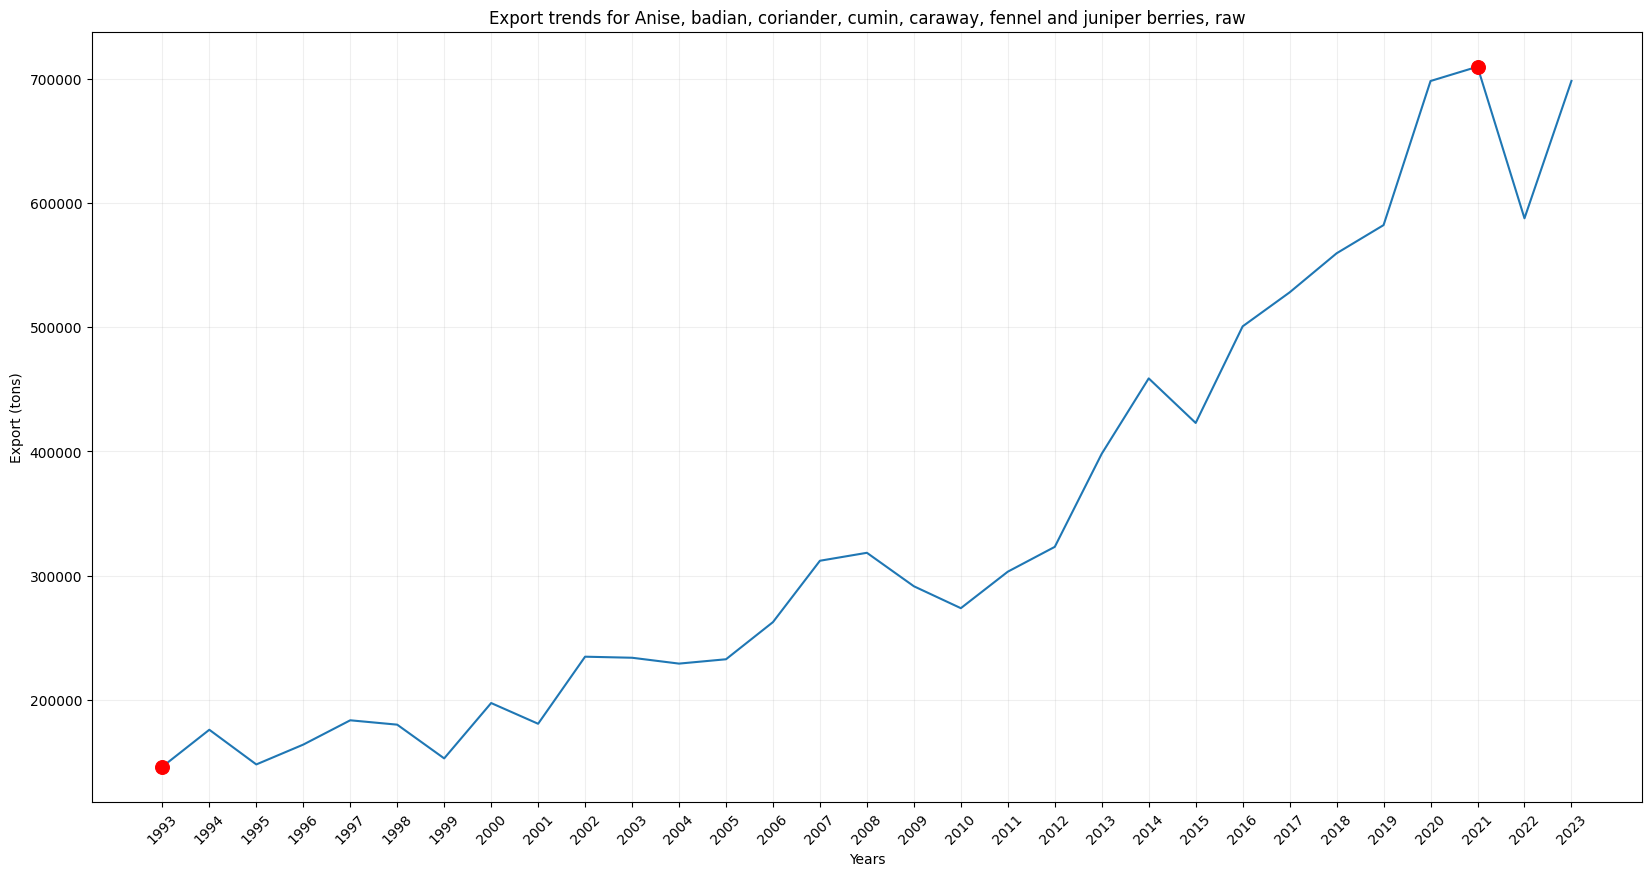

Chillies and peppers, dry (Capsicum spp., Pimenta spp.), raw


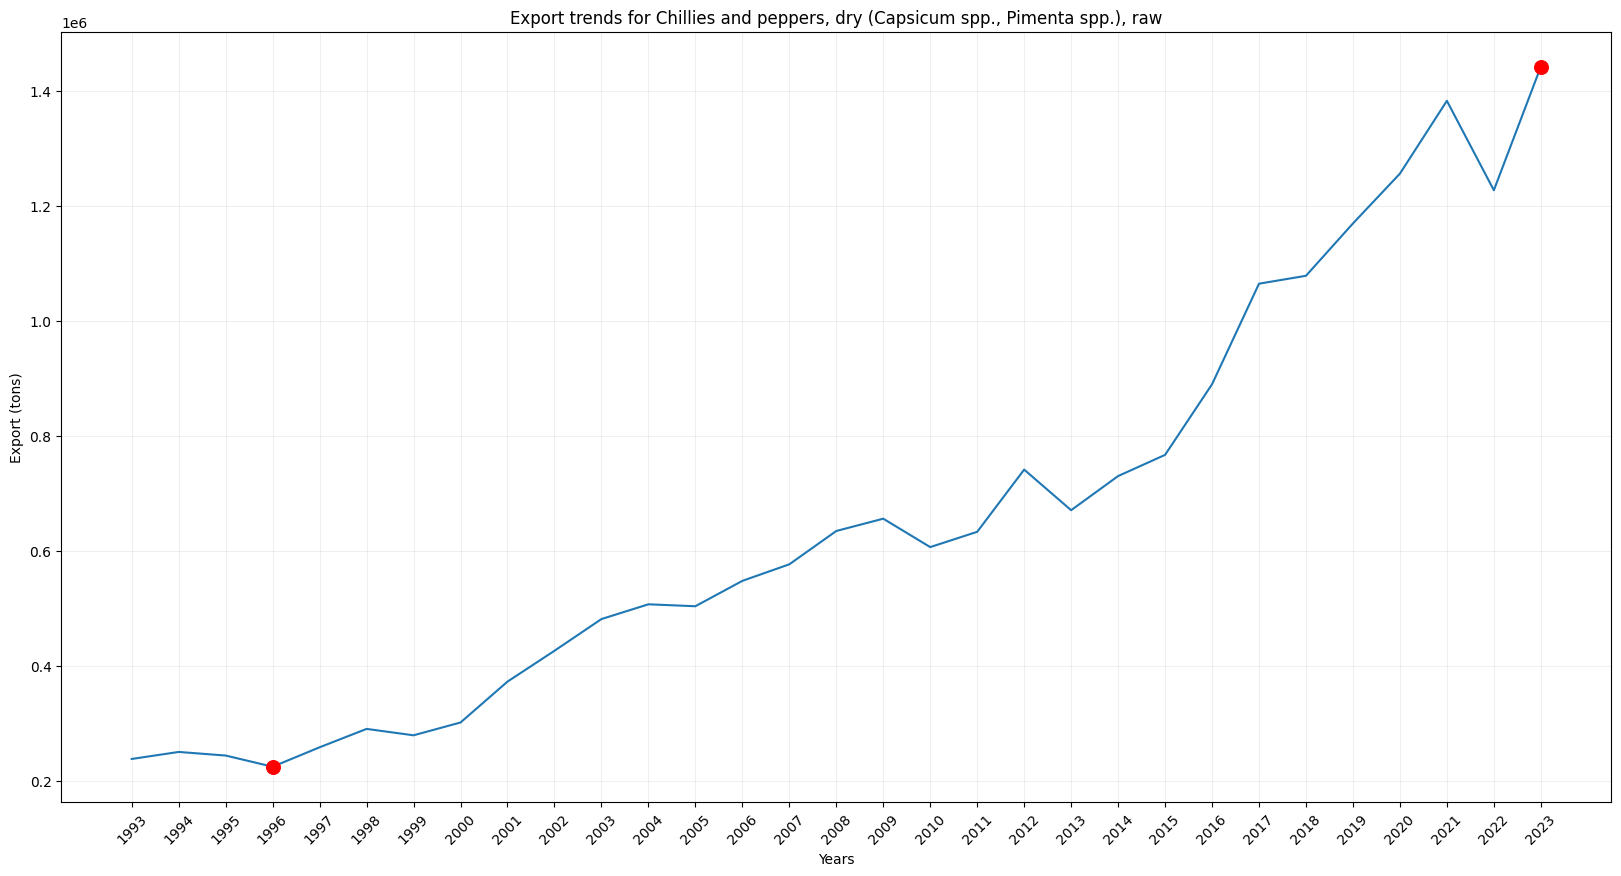

Chillies and peppers, green (Capsicum spp. and Pimenta spp.)


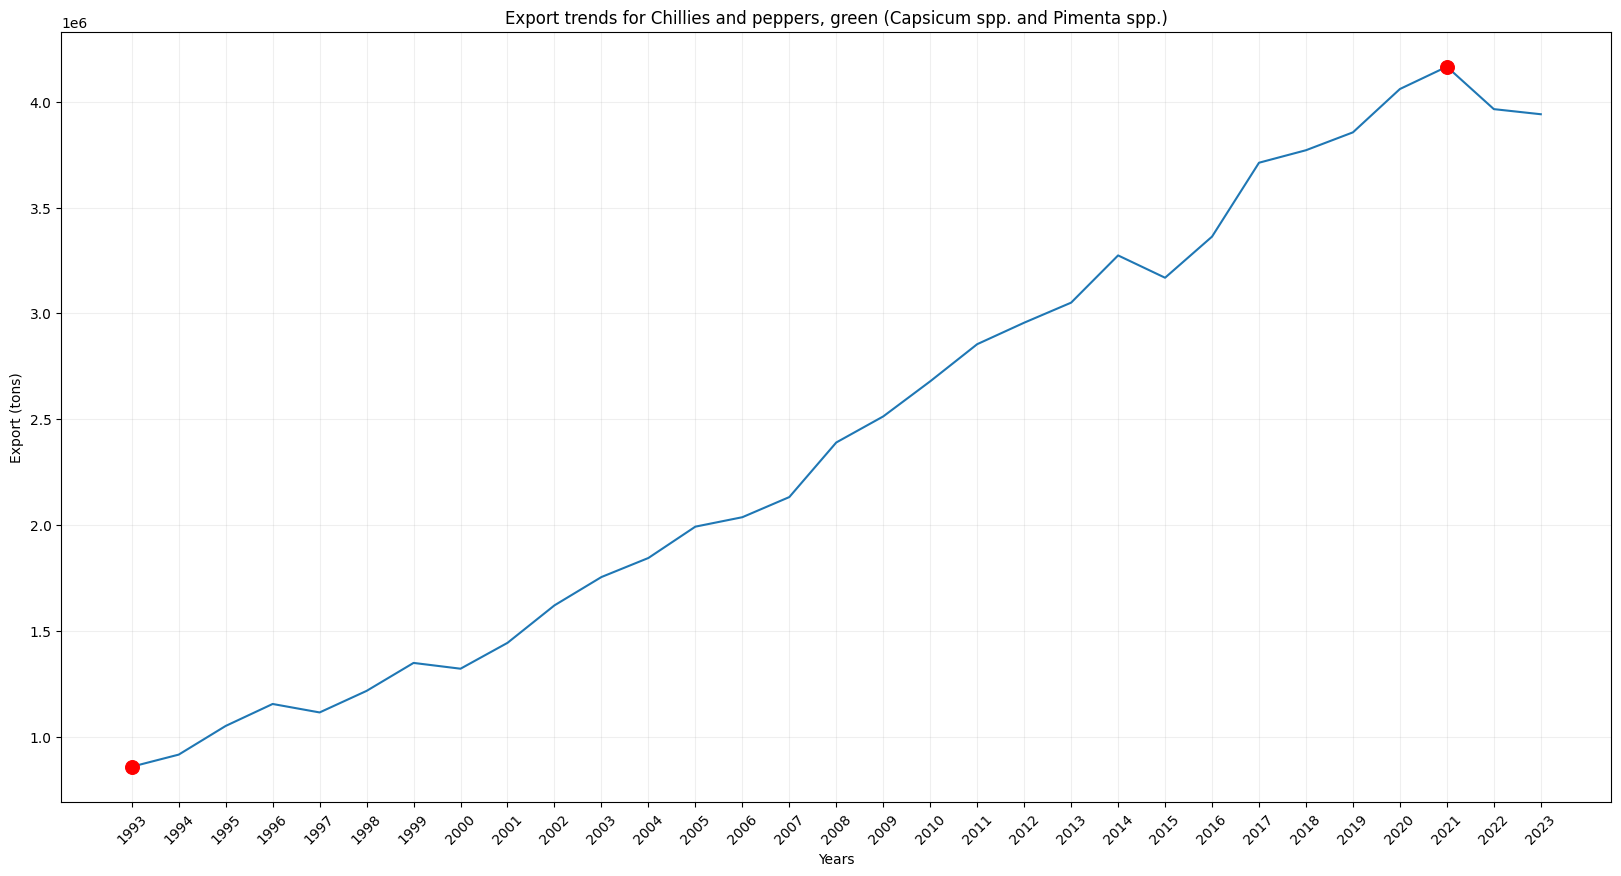

Cinnamon and cinnamon-tree flowers, raw


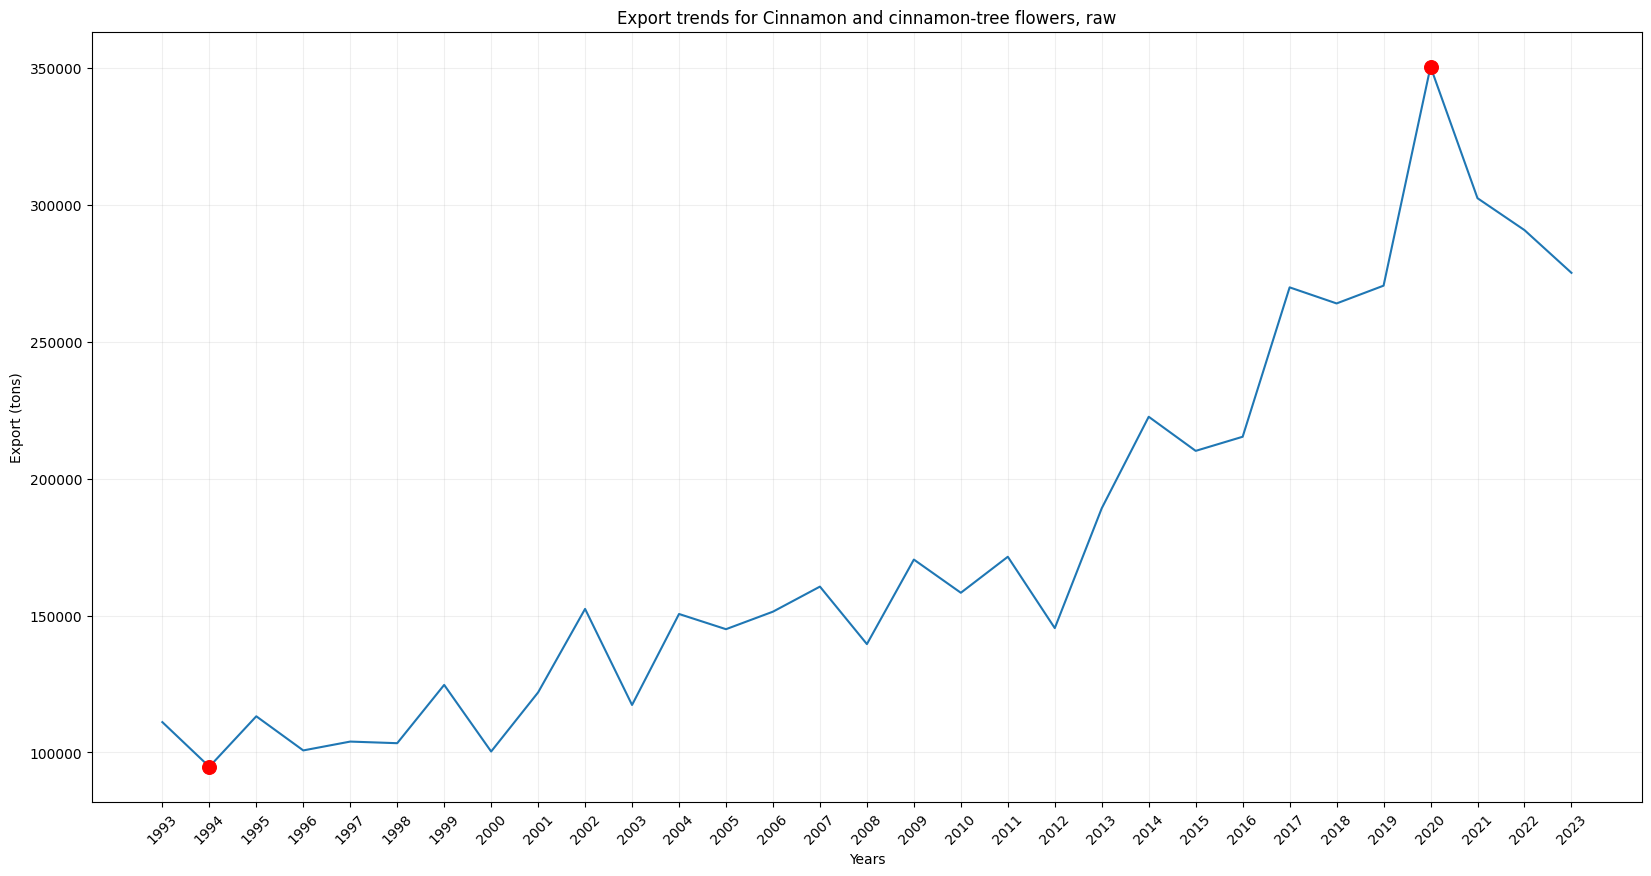

Cloves (whole stems), raw


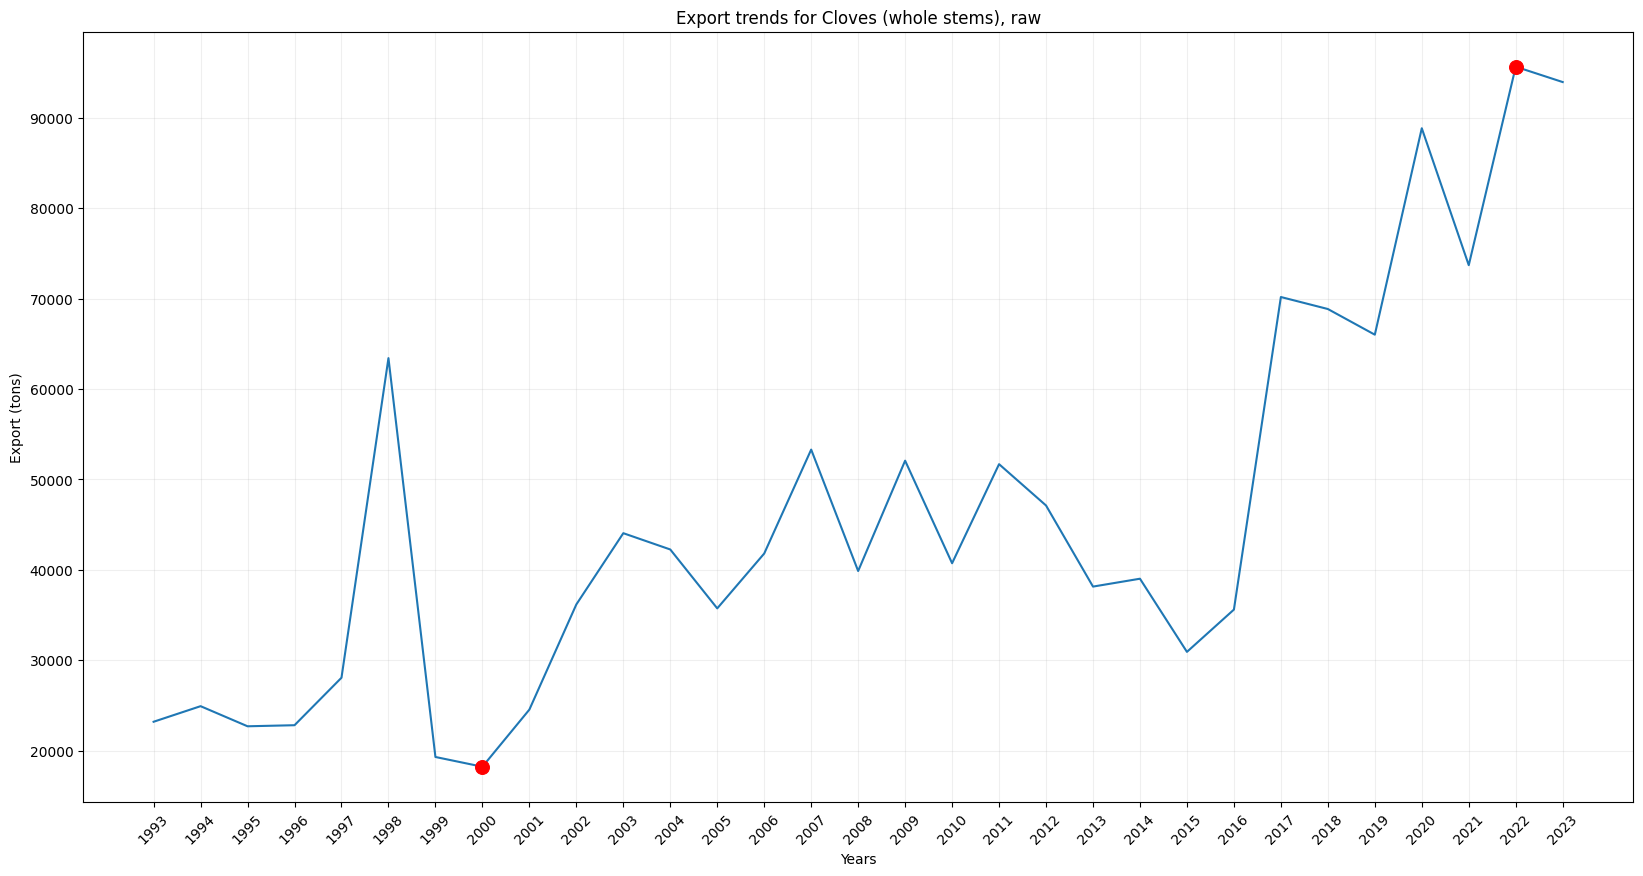

Ginger, raw


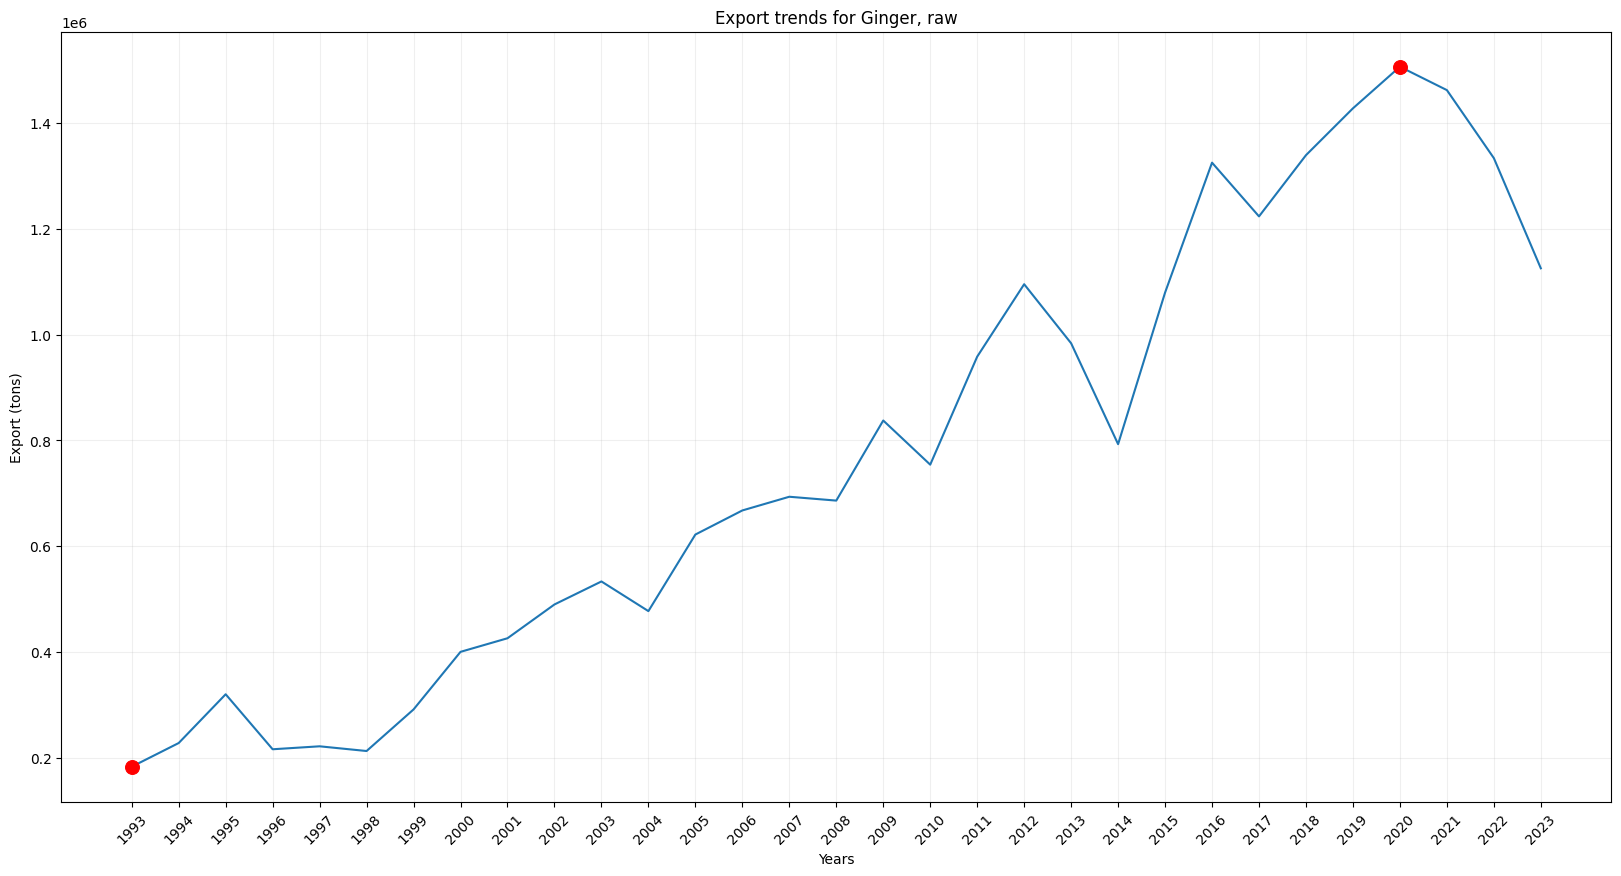

Nutmeg, mace, cardamoms, raw


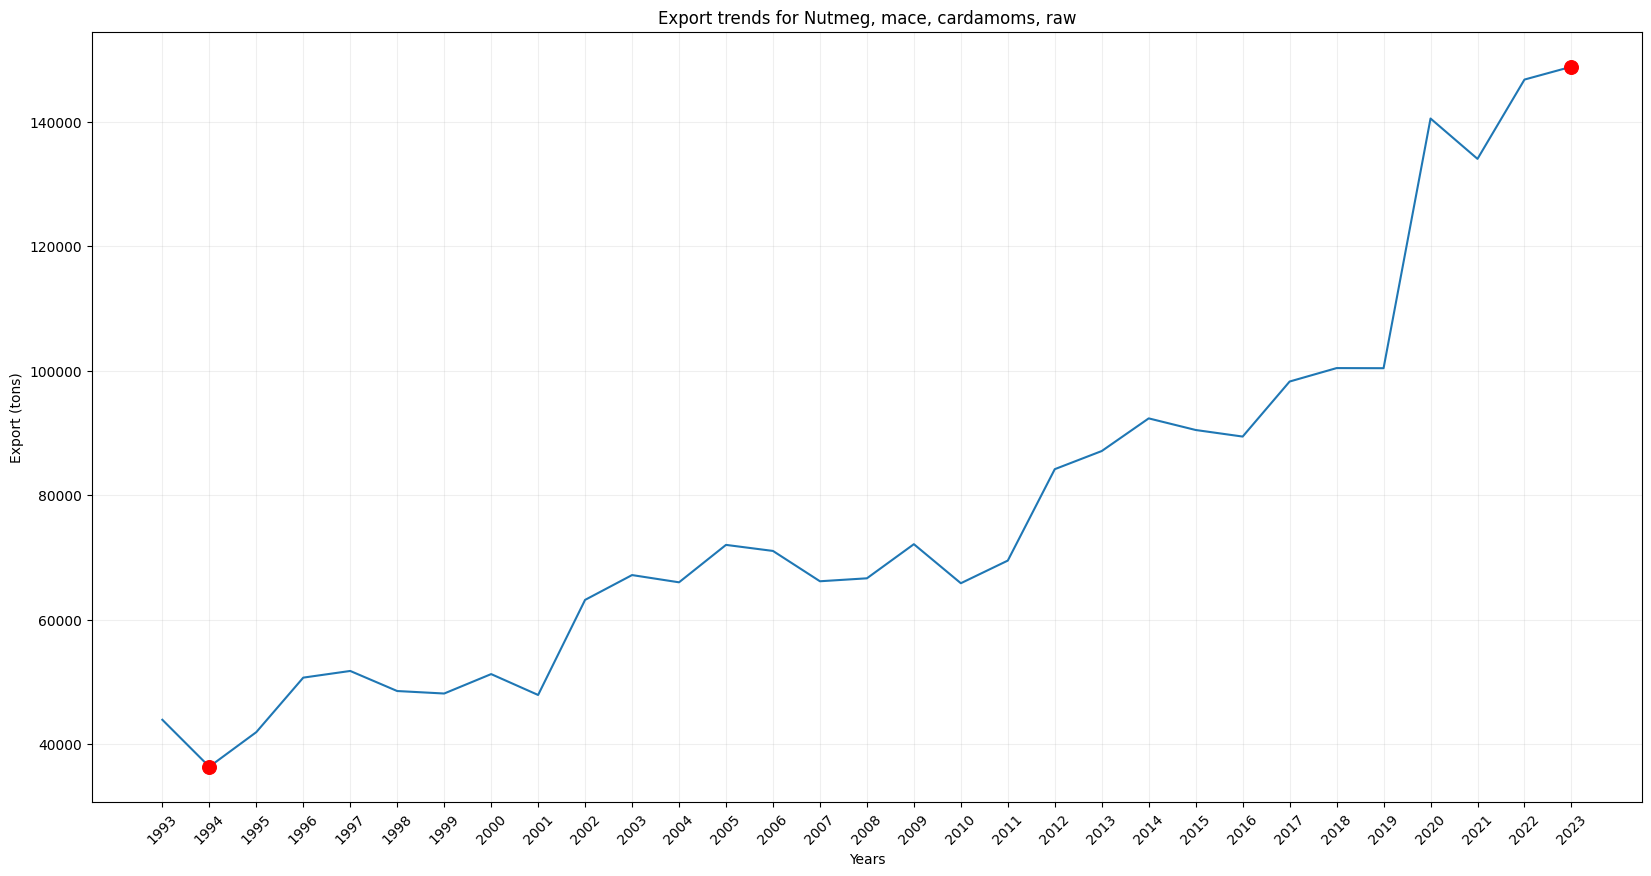

Pepper (Piper spp.), raw


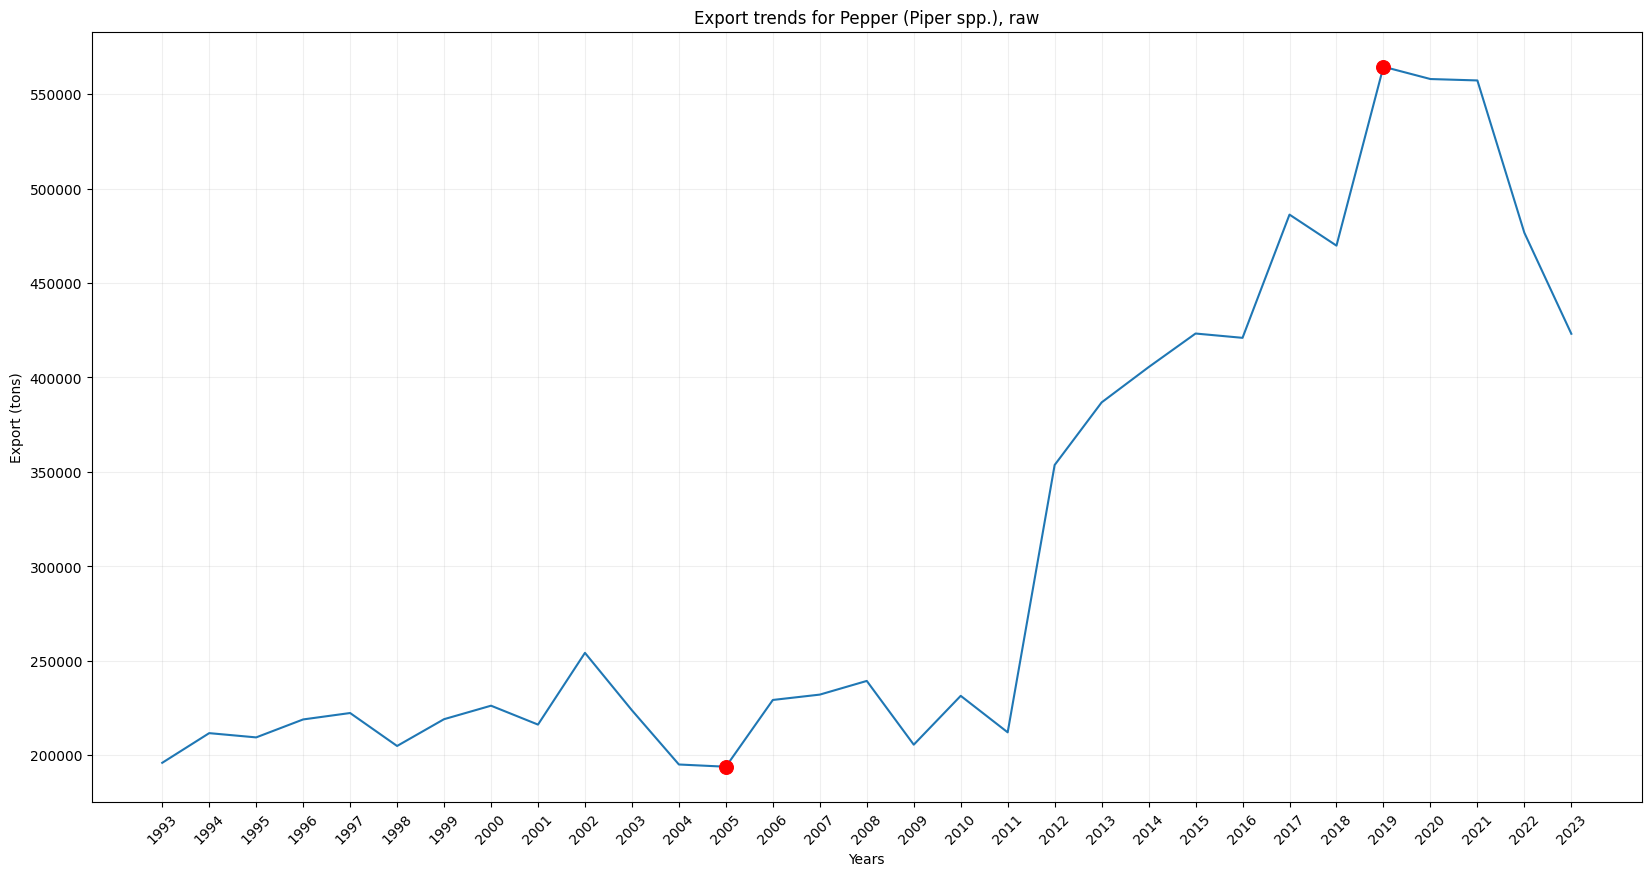

Vanilla, raw


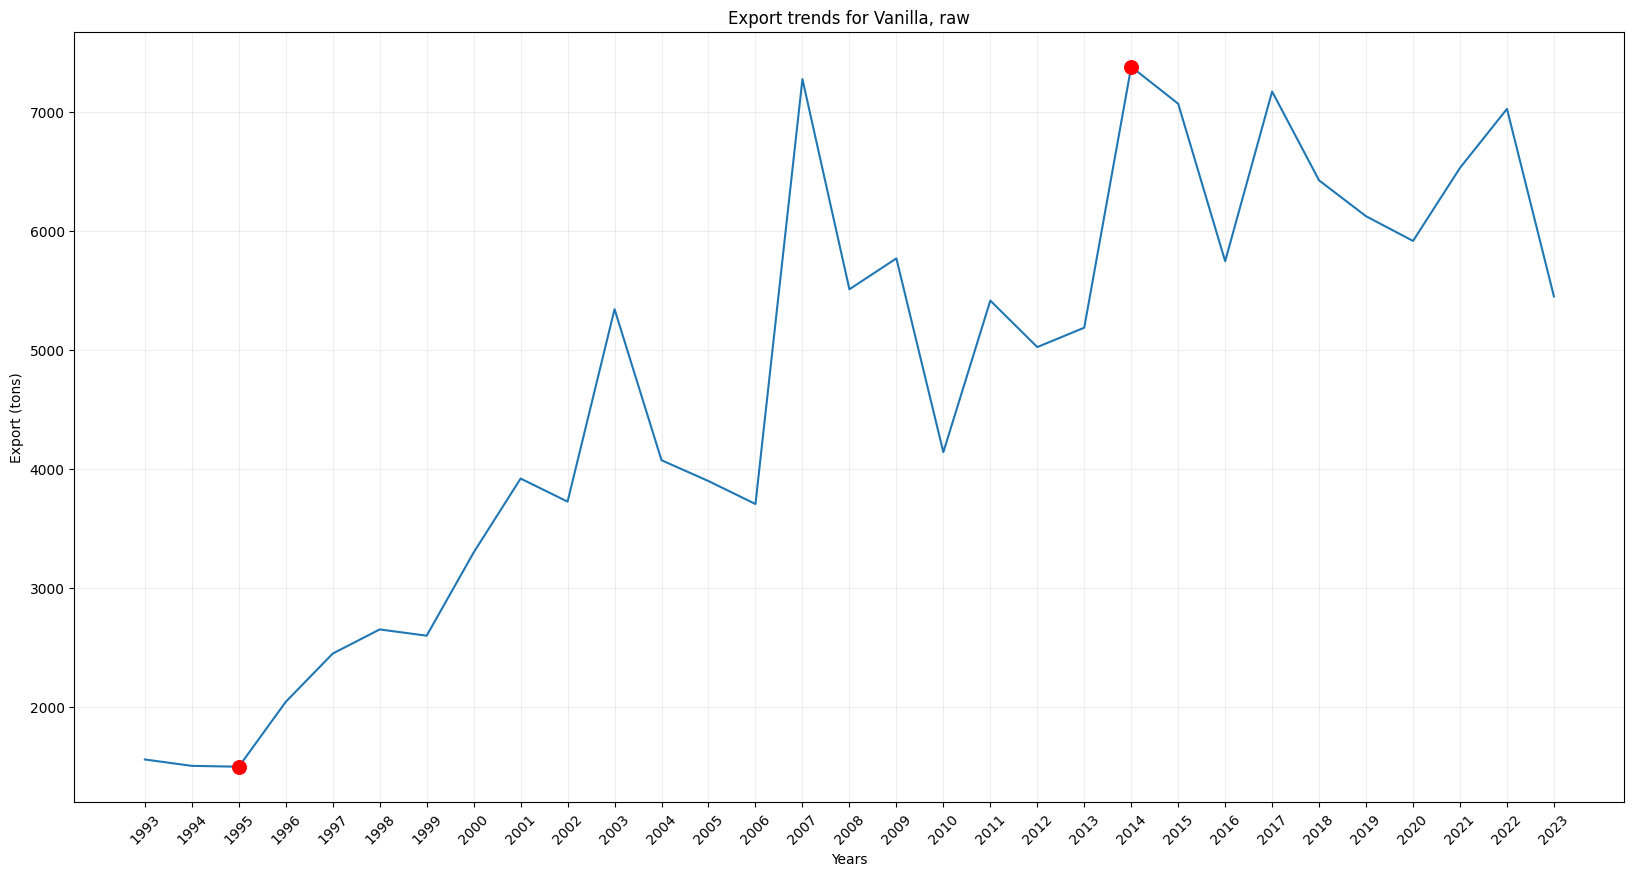

In [ ]:
#Export trends per spice
for spice in data['Item'].unique():
  spice_export_trends= data[data['Item'] == spice].groupby('Year')['Export '].sum().sort_index()
  print(spice)

  #Visualizing the data using lineplot
  plt.figure(figsize = (20,10))
  year_list = spice_export_trends.index.tolist()
  max_idx = year_list.index(spice_export_trends.idxmax())
  min_idx = year_list.index(spice_export_trends.idxmin())
  ax = sns.lineplot(x = spice_export_trends.index, y = spice_export_trends.values, marker='o', markevery=[max_idx,min_idx],
             markersize=10, markeredgecolor= 'red', markerfacecolor = 'red' )
  plt.title(f'Export trends for {spice}')
  plt.xticks(spice_export_trends.index, rotation=45)  # Show all years
  plt.grid(alpha = 0.2)
  plt.xlabel('Years')
  plt.ylabel('Export (tons)')
  plt.show()

##**Check for trends in the exports of each spice recorded from the year 1993 to the year 2023**
**1. Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw**
* The year with the least exports of this spice was the year 1993 with a recorded 130, 000 tonnes of spice exported.
* The year with the highest exports of this spice was the year 2021 with a recorded 710, 000 tonnes of spice exported.
* There has been a series of increase and decrease in the exports of this spice over the years from 1993 to the year 2023.

**2. Chillies and peppers, dry (Capsicum spp., Pimenta spp.), raw**
* The year that recorded the least export of this spice was the year 1996 with a recorded 210, 000 tonnes of spice exported.
* The year with the highest export of this spice was the year 2023 with a recorded 1.43 million tonnes of spice exported.
* There was a slight decrease in the export of this spice from 1993 to 1996 from which a steady increase was observed upto 2021 when there was a decrease and finally, an increase upto the year 2023 which was the peak of all the exports.

**3. Chillies and peppers, green (Capsicum spp. and Pimenta spp.)**
* The year with the least export of this spice was the year 1993 with a recorded 800, 000 tonnes of spice exported.
* The year with the highest export of this spice was the year 2021 with a recorded 4.25 million tonnes of spice exported.
* A steady increase in the exports of this spice was witnessed from the year 1993 to the year 2021, which was the peak, after which a slight decrease was recorded to the year 2023.

**4. Cinnamon and cinnamon-tree flowers, raw**
* The year with the least export of this spice was the year 1994 with a recorded 90, 000 tonnes of spice exported.
* The year with the highest export of this spice exported was the year 2020 with a recorded 350, 000 tonnes of spice exported.
* There has been a series of increase and decrease of exports from the year 1993 to 2020 which was the highest exports in a year after which a decrease in the exports was recorded from 2020 to 2023.

**5. Cloves (whole stems), raw**
* The year with the least export of this spice was the year 2000 with a recorded 19, 000 tonnes of spice exported.
* The year with the highest export of this spice was the year 2022 with a recorded 96, 000 tonnes of spice exported.
* There was a slight decrease in the export of this spice from 1993 to 1996 when a significant increase was witnessed between the year 1996 to the year 1998 where a significant decrease in the amount of exports was witnessed to the year 2000 which recorded the least exports per year. After this, there was a series of increase and decrease of exports upto 2016 when a steep rise was witnessed until 2022 when the highest exports was recorded, then a slight decrease was witnessed from 2022 to 2023.

**6. Ginger, raw**
* The year with the least export of this spice was the year 1993 with a recorded 200, 000 tonnes of spice exported.
* The year with the highest export of this spice was the year 2020 with a recorded 1.5 million tonnes of spice exported.
* There was a series of increase and decrease in the exports of this spice from the year 1993 to the year 2020 which was the highest export recorded, from which a steady decrease in the export of the spice was recorded upto the year 2023.

**7. Nutmeg, mace, cardamoms, raw**
* The year with the least export of this spice was the year 1994 with a recorded 46, 000 tonnes of spice exported.
* The year with the highest export of this spice was the year 2023 with a recorded 152, 000 tonnes of spice exported.
* There was a slight decrease in the exports from 1993 to 1994 then a series of increase and decrease in the exports upto 2019 when a steep increase in the exports was witnessed upto the year 2023.

**8. Pepper (Piper spp.), raw**
* The year with the least export of this spice was the year 2005 with a recorded 195, 000 tonnes of spice exported.
* The year with the highest export of this spice was the year 2019 with a recorded 570, 000 tonnes of spice exported.
* There was a series of increase and decrease in the export of this spice from 1993 upto the year 2011 when a steep rise of the exports was witnessed upto the year 2019, then a steady decrease in the exports occurred upto the year 2023.

**9. Vanilla, raw**
* The year with the least export of this spice was the year 1995 with a recorded 1, 200 tonnes of spice exported.
* The year with the highest export of this spice was the year 2014 with a recorded 7, 500 tonnes of spice exported.
* There has been a fluctuation in the exports of this spice since 1993 to the year 2023.

Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw


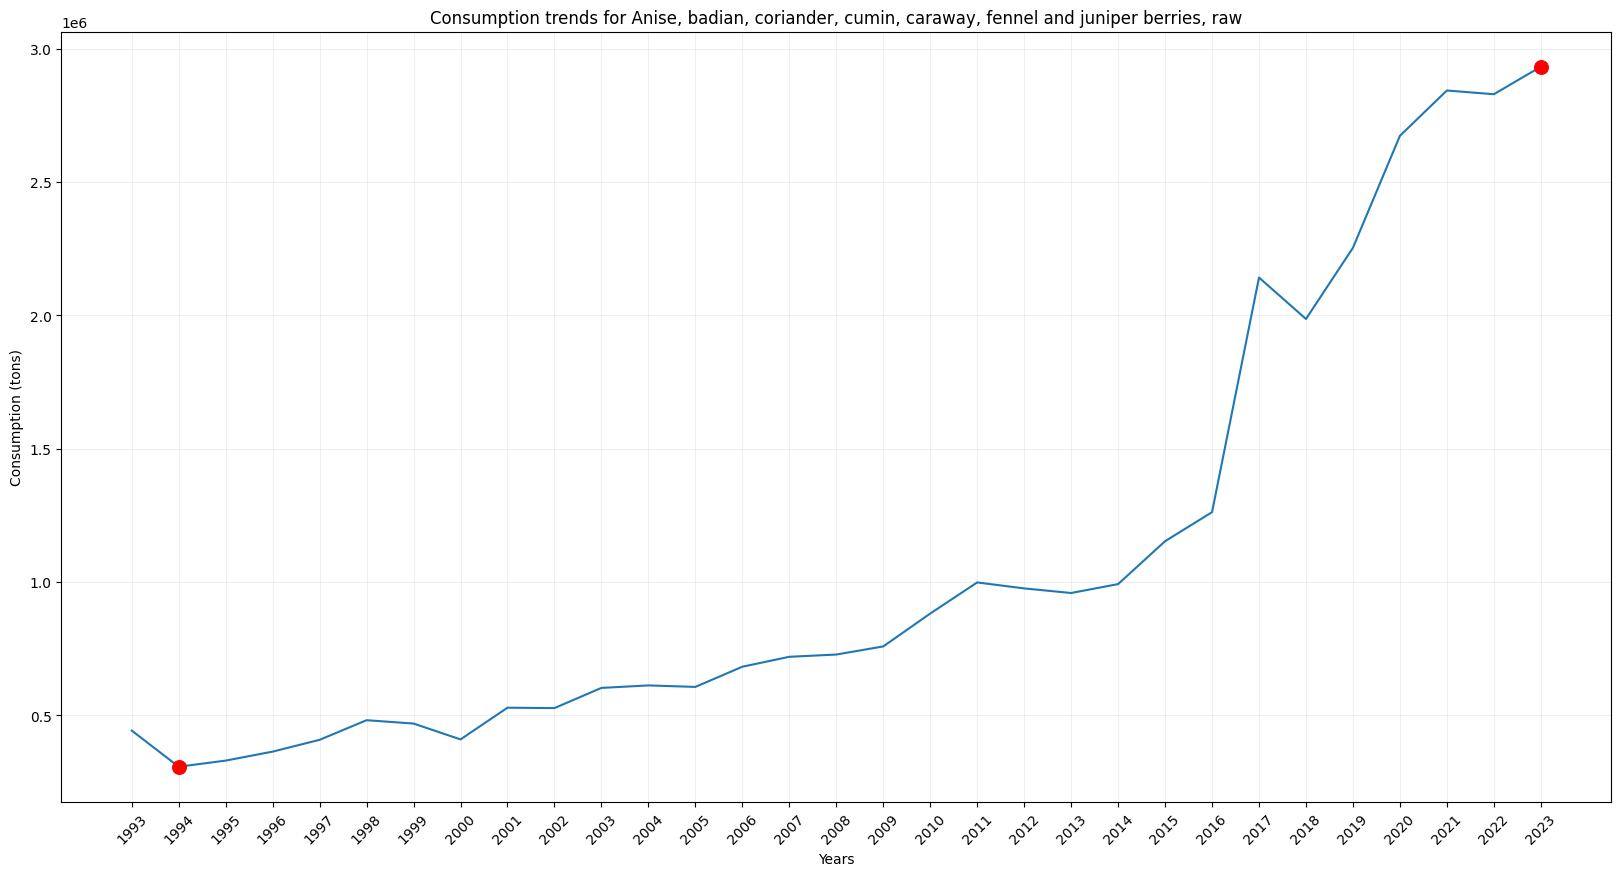

Chillies and peppers, dry (Capsicum spp., Pimenta spp.), raw


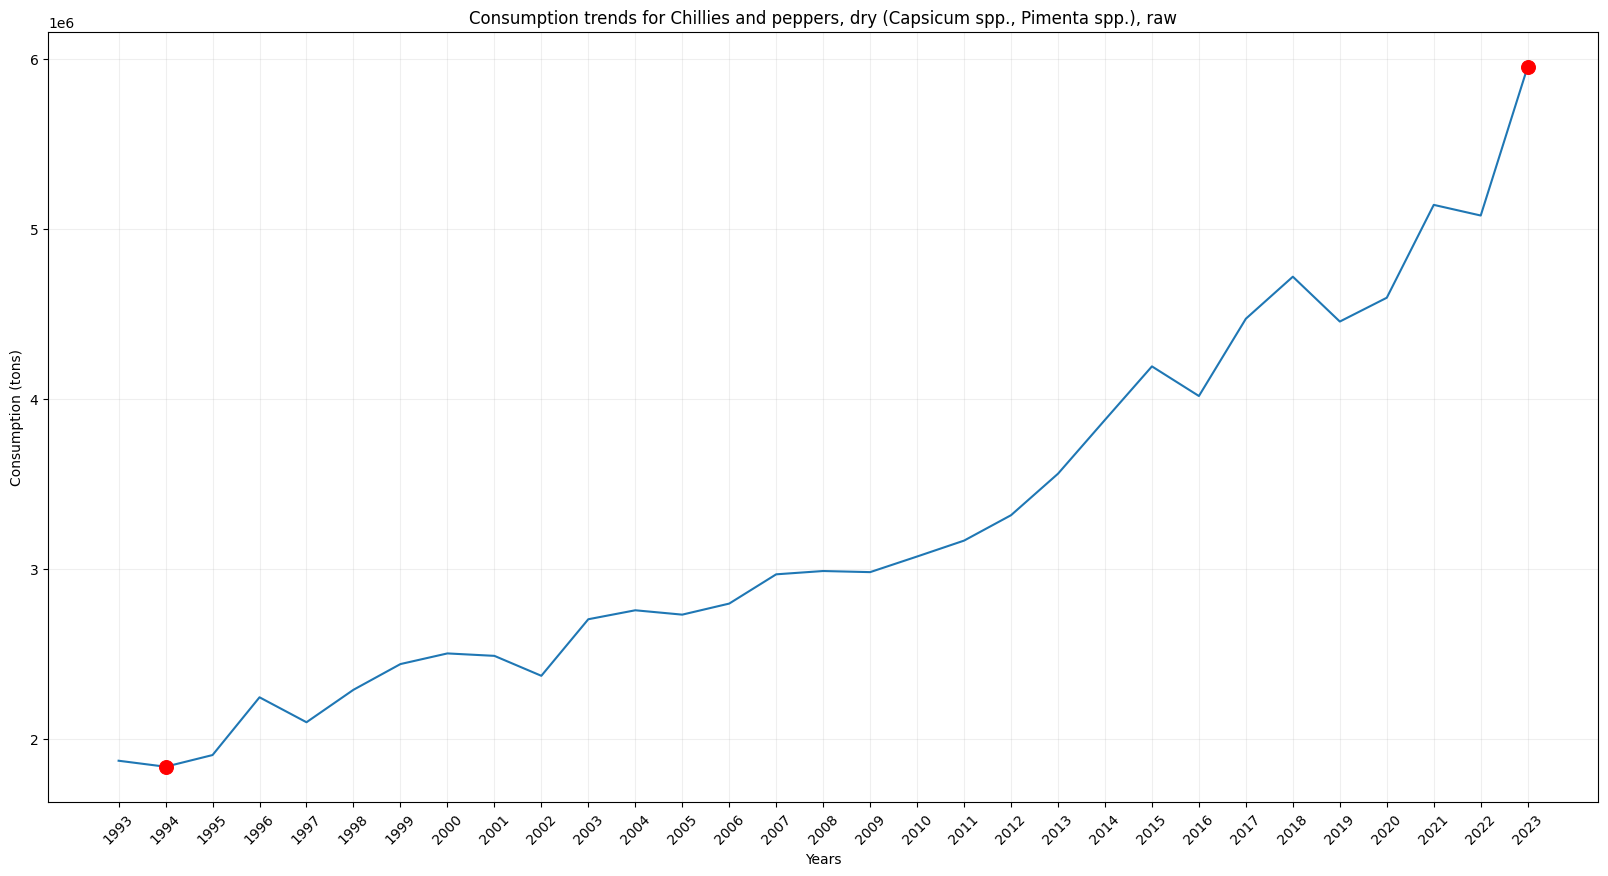

Chillies and peppers, green (Capsicum spp. and Pimenta spp.)


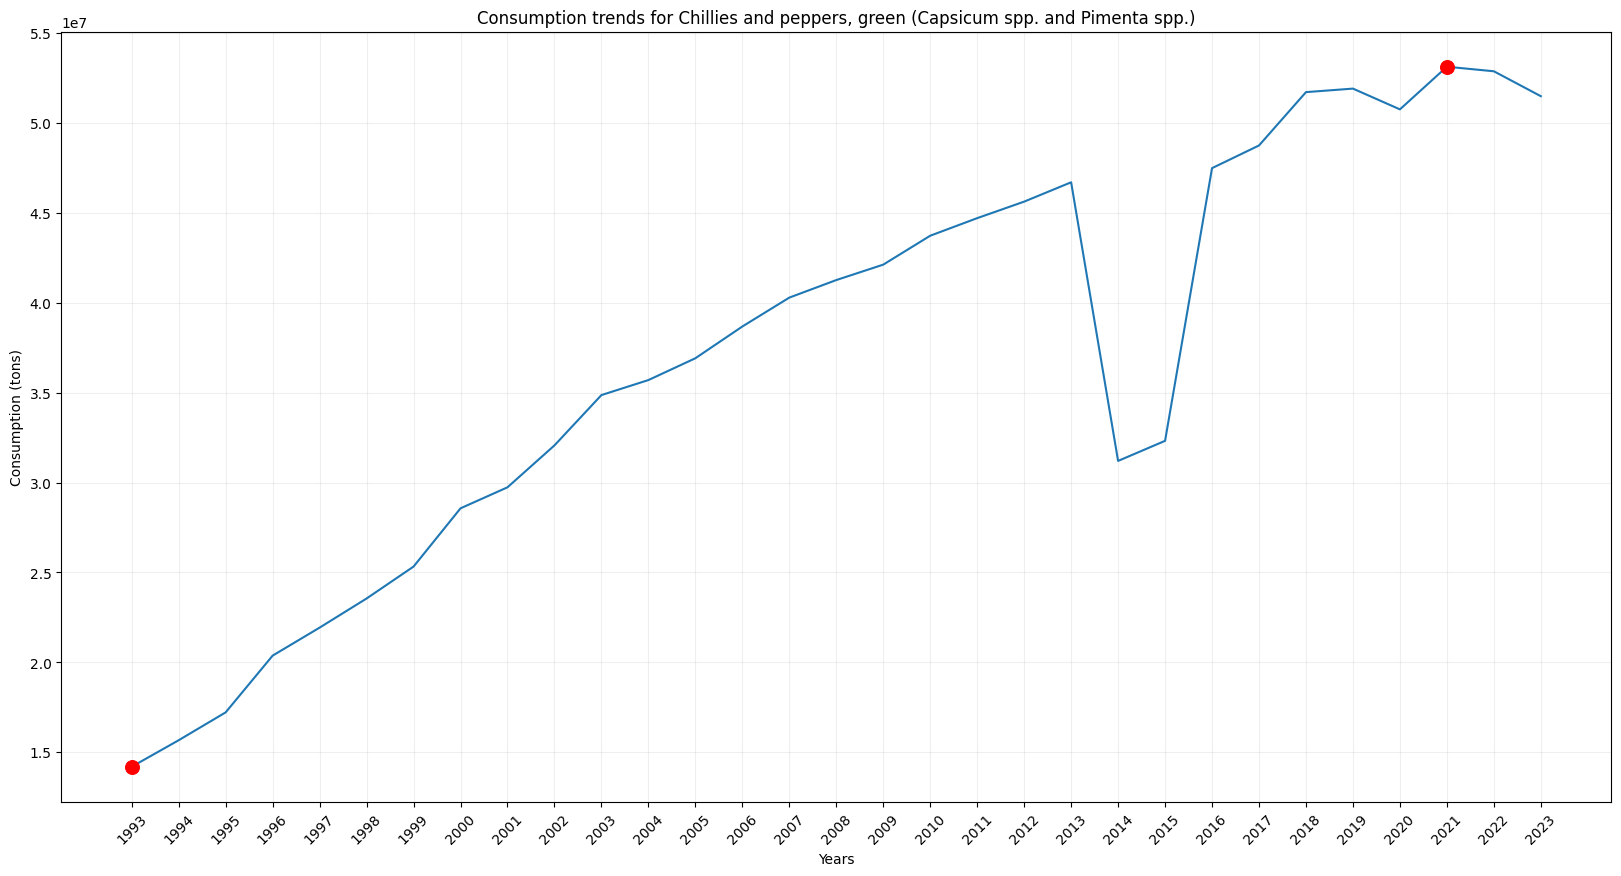

Cinnamon and cinnamon-tree flowers, raw


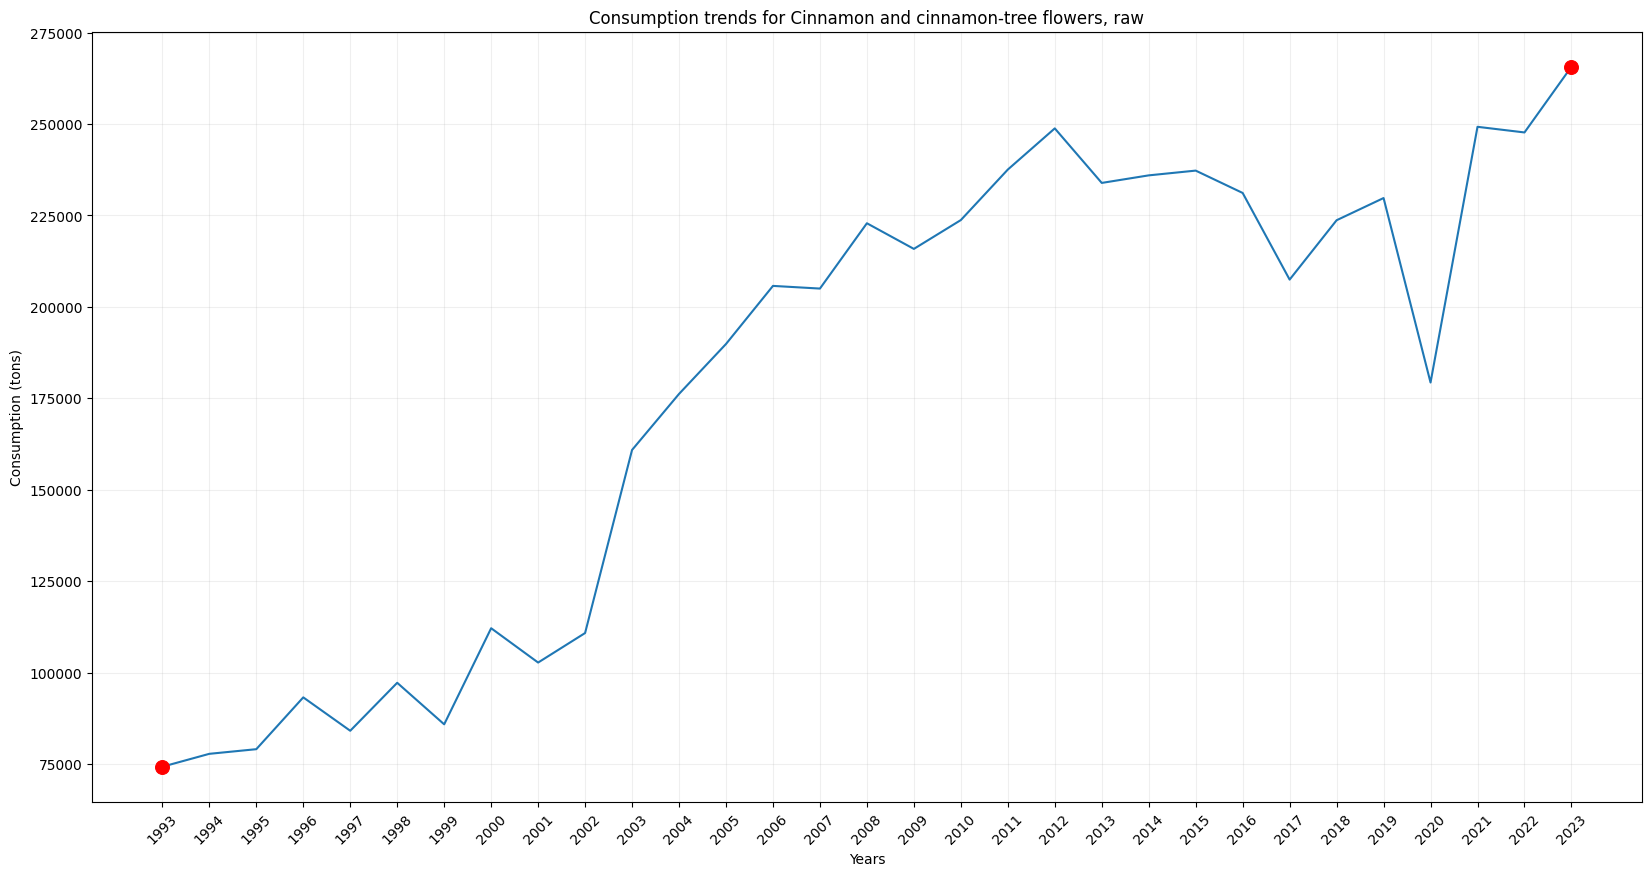

Cloves (whole stems), raw


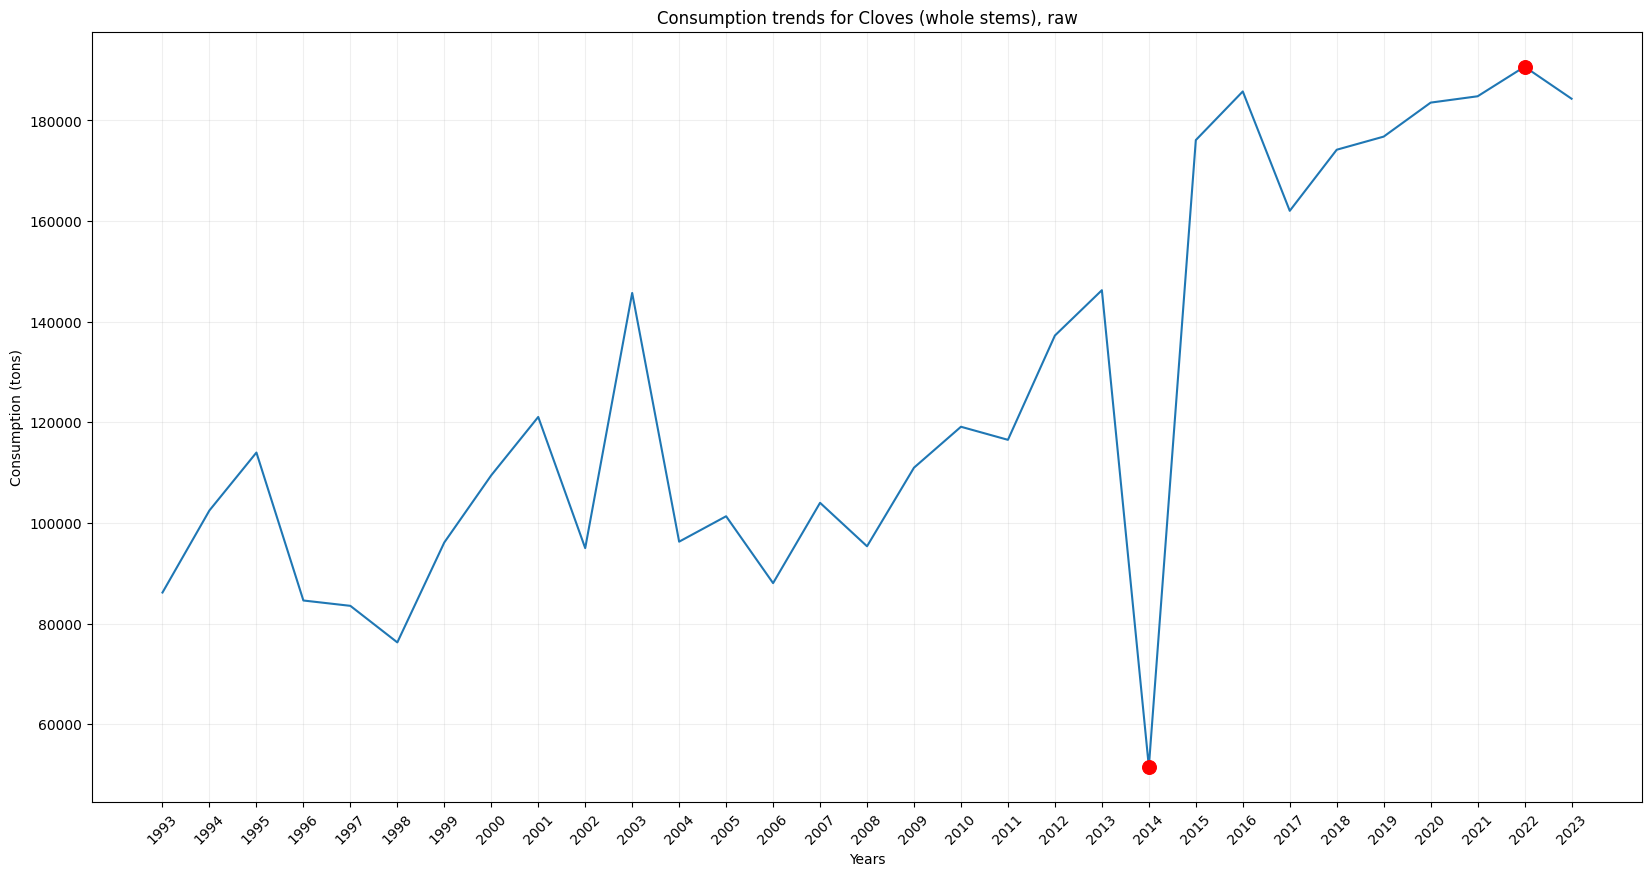

Ginger, raw


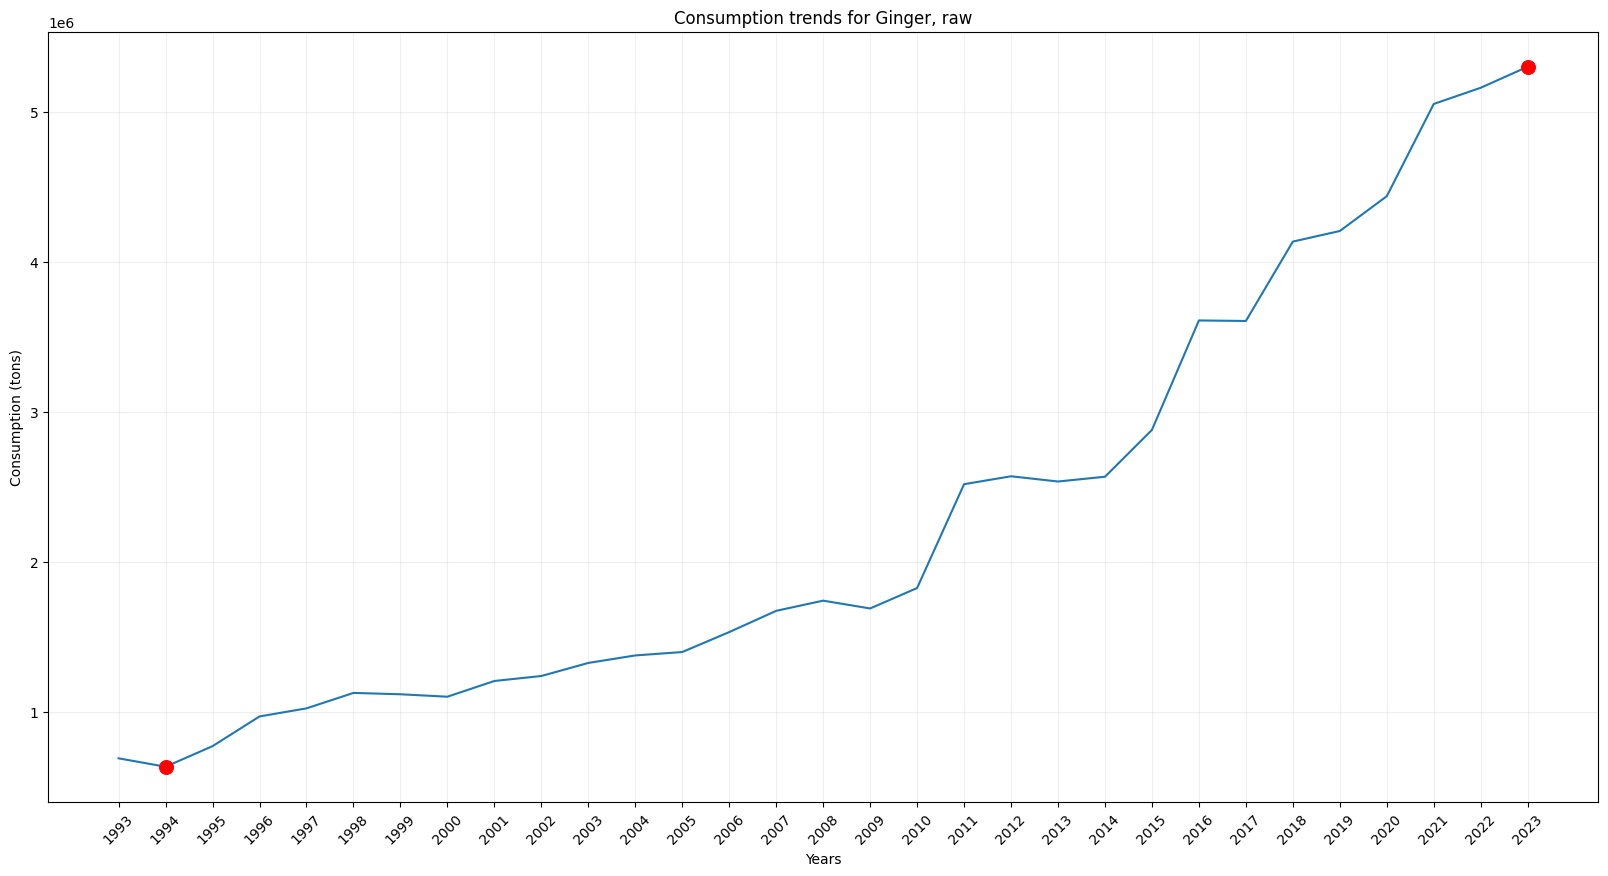

Nutmeg, mace, cardamoms, raw


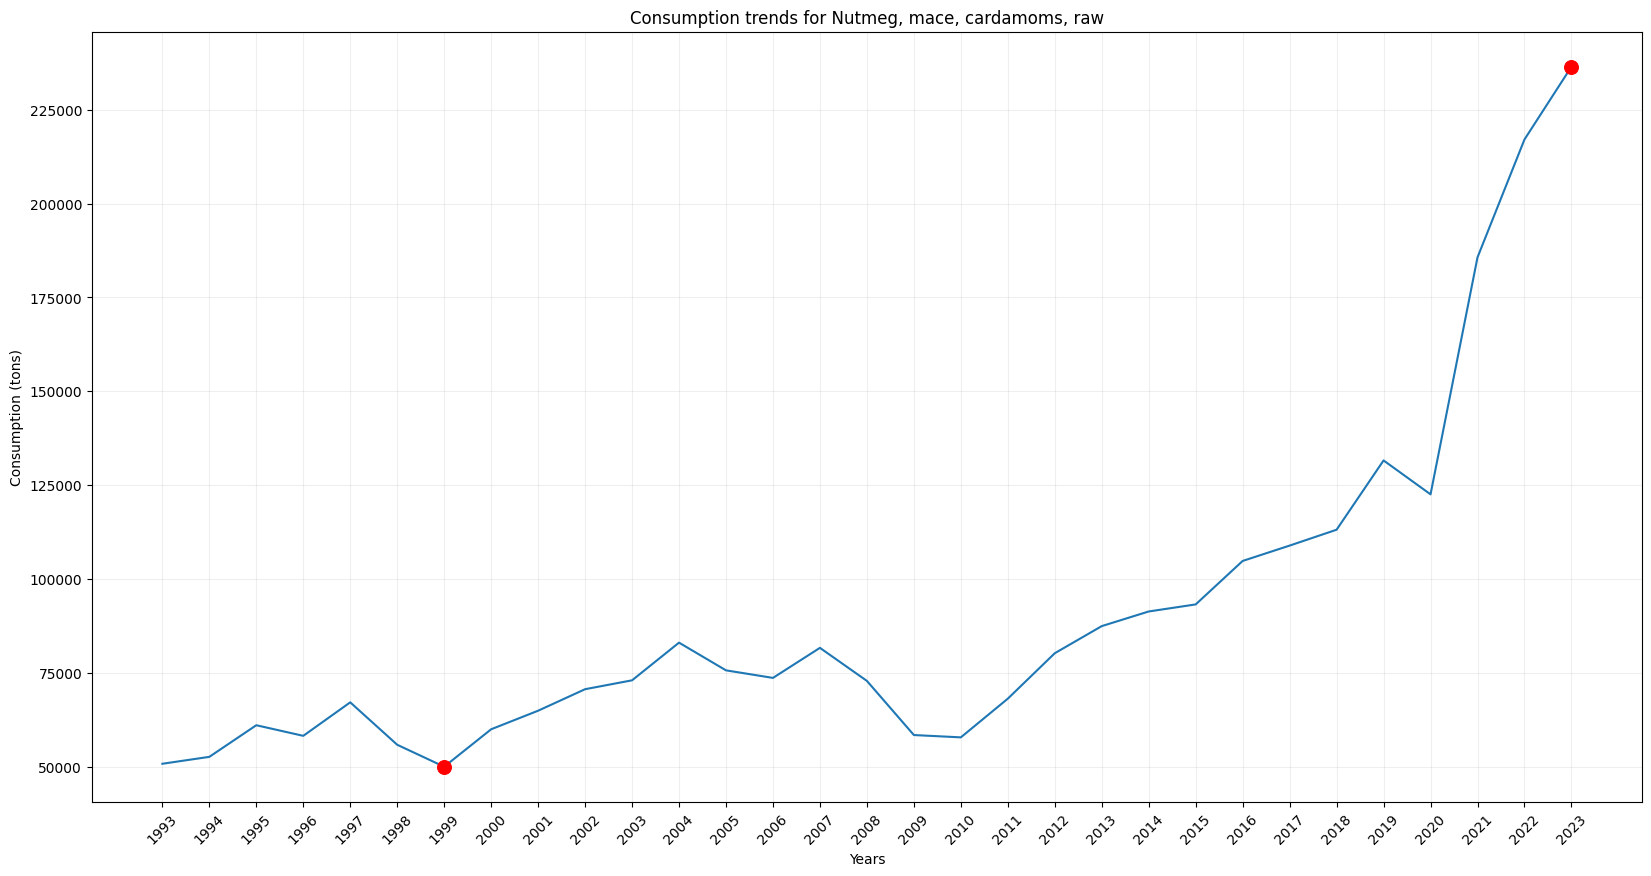

Pepper (Piper spp.), raw


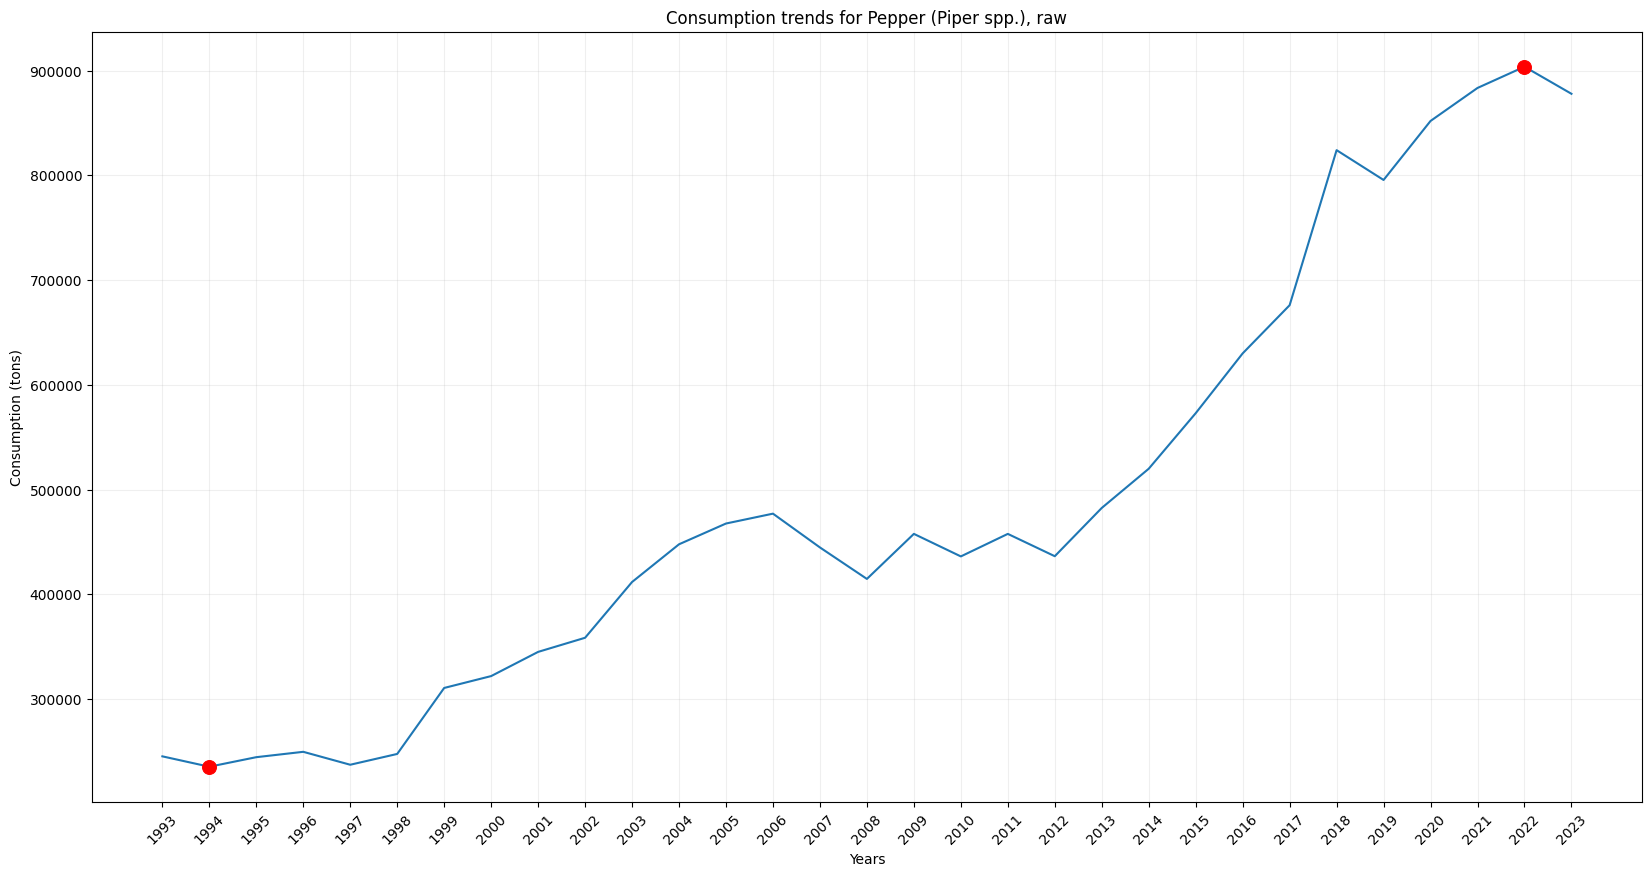

Vanilla, raw


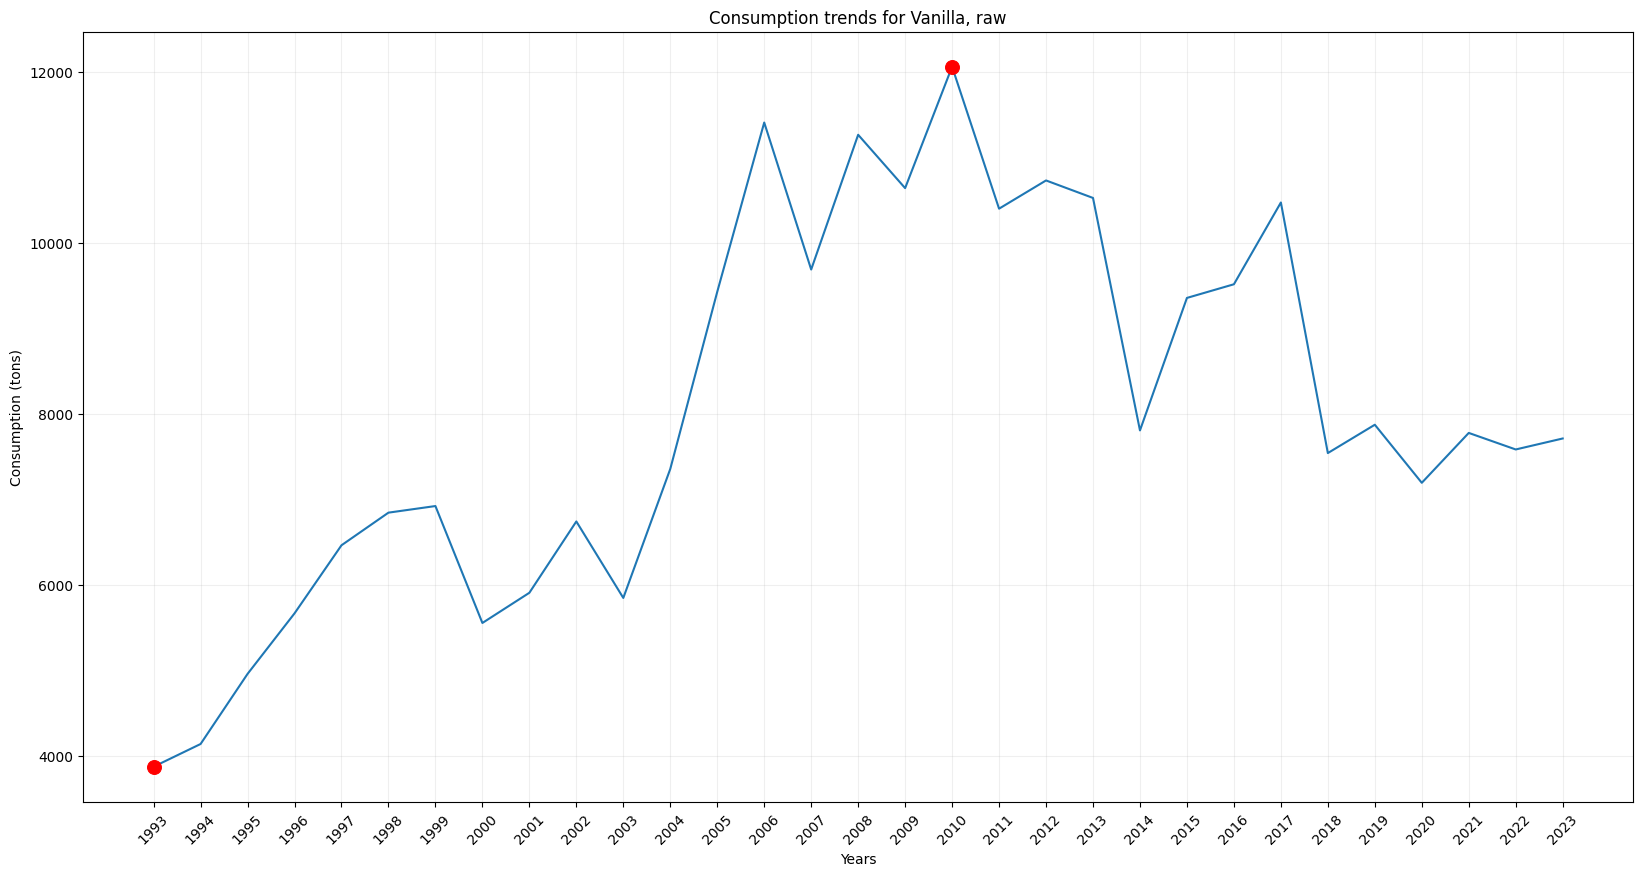

In [ ]:
#Consumption trends per spice
for spice in data['Item'].unique():
  spice_consumption_trends= data[data['Item'] == spice].groupby('Year')['Consumption'].sum().sort_index()
  print(spice)

  #Visualizing the data using lineplot
  plt.figure(figsize = (20,10))
  year_list = spice_consumption_trends.index.tolist()
  max_idx = year_list.index(spice_consumption_trends.idxmax())
  min_idx = year_list.index(spice_consumption_trends.idxmin())
  max_val = spice_consumption_trends.loc[year_list[max_idx]]
  ax = sns.lineplot(x = spice_consumption_trends.index, y = spice_consumption_trends.values, marker='o', markevery=[max_idx,min_idx],
             markersize=10, markeredgecolor= 'red', markerfacecolor = 'red' )
  plt.title(f'Consumption trends for {spice}')
  plt.xticks(spice_consumption_trends.index, rotation=45)  # Show all years
  plt.grid(alpha = 0.2)
  plt.xlabel('Years')
  plt.ylabel('Consumption (tons)')
  plt.show()

##**Check for trends in the consumption of each spice recorded from the year 1993 to the year 2023**
**1. Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw**
* The year with the highest consumption of this spice was the year 2023 with a recorded 2.9 million tonnes of spice consumed.
* The year with the least consumption of this spice was the year 1994 with a recorded 220, 000 tonnes of spice consumed.
* There occurred a slight decrease in the consumption of this spice from 1993 to 1994, followed by a steady increase until 2016 when a steep rise  was recorded upto the year 2023, the peak year.

**2. Chillies and peppers, dry (Capsicum spp., Pimenta spp.), raw**
* The year with the highest consumption of this spice was the year 2023 with a recorded 5.95 million tonnes of spice consumed.
* The year with the least consumption of this spice was the year 1994 with a recorded 1.9 million tonnes of spice consumed.
* There has been a steady increase in the consumption of this spice from the year 1993 to the year 2023 with a few slight decreases witnessed which are not significant.

**3. Chillies and peppers, green (Capsicum spp. and Pimenta spp.)**
* The year with the highest consumption of this spice was the year 2021 with a recorded 5.3 million tonnes of spice consumed.
* The year with the least consumption of this spice was the year 1993 with a recorded 1.4 million tonnes of spice consumed.
* There was a steady increase in the consumption of spice consumed from the year 1993 to the year 2013 when a significant decrease was recorded upto the year 2014 when a steep rise was recorded upto 2021 when a slight drop in the consumption of the spice was recorded.

**4. Cinnamon and cinnamon-tree flowers, raw**
* The year with the highest consumption of this spice was the year 2023 with a recorded 270, 000 tommes of spice consumed.
* The year with the least consumption of this spice was the year 1993 with a recorded 75, 000 tonnes of spice consumed.
* There has been a series of increase and decrease in the consumption of this spice from the year 1993 to 2001, followed by a steep rise in the consumption upto 2012 when a slight decrease was witnessed upto the year 2020, followed by a steep rise from 2020 to 2023, the peak year.

**5. Cloves (whole stems), raw**
* The year with the highest consumption of this spice was the year 2022 with a recorded 190,000 tonnes of spice consumed.
* The year with the least consumption of this spice was the year 2014 with a recorded 50, 000 tonnes of spice consumed.

* There was a series of increase and decrease in the consumption of this spice from the year 1993 to the year 2013 where a significant drop in the consumption of this spice was recorded in 2014 followed by a steep rise in the consumption recorded from 2015 to 2016, followed by a slight drop then a steady increase from 2017 to 2022, and a slight decrease was recorded in 2023.

**6. Ginger, raw**
* The year with the highest consumption of this spice was the year 2023 with a recorded 5.4 million tonnes of spice consumed.
* The year with the least consumption of this spice was the year 1994 with a recorded 400, 000 tonnes of spice consumed.
* There was a slight drop in consumption in the year 1994, followed by a steady increase in the consumption of the spice upto the year 2023, the peak year.

**7. Nutmeg, mace, cardamoms, raw**
* The year with the highest consumption of this spice was the year 2023 with a recorded 240, 000 tonnes of spice consumed.
* The year with the least consumption of this spice was the year 1999 with a recorded 50, 000 tonnes of spice consumed.
* There was a slight increase then a slight drop in the consumption of the spice from the year 1993 to 1999, followed by a steady increase upto 2007 where a decrease was recorded upto 2010 where an increase in the consumption was witnessed upto 2023, the peak year.

**8. Pepper (Piper spp.), raw**
* The year with the highest consumption of this spice was the year 2022 with a recorded 900, 000 tonnes of spice consumed.
* The year with the least consumption of this spice was the year 1994 with a recorded 230, 000 tonnes of spice consumed.
* Generally, there has been a steady rise in the consumption of this spice from the year 1994 to the year 2023 after a slight decrease was witnessed from 1993 to 1994.

**9. Vanilla, raw**
* The year with the highest consumption of this spice was the year 2010 with a recorded 12, 000 tonnes of spice consumed.
* The year with the least consumption of this spice was the year 1993 with a recorded 3, 900 tonnes of spice consumed.
* There  was a steady rise in the consumption from 1993 to 1999, followed by a decrease in the consumption  until 2003, followed by a steep rise  from 2003 to 2006, after which a series of increase and decrease in the consumption was recorded.


In [ ]:
#Exporting the cleaned dataset to csv
data.to_csv('cleaned_global_spice_consumption_data.csv', index = False)

#**INSIGHTS FROM THE DATA**
* China is the country with the highest spice consumption of a whooping 407,480,200 tonnes.
* Niue is the country with the lowest spice consumption of just 8.49 tonnes.
* China is the country with the highest spice production of a whooping 420,728,900 tonnes.
* There are 38 countries/regions that have not recorded even a single tonne of spice production, namely : *Angola, Armenia, Belarus, Bahamas, Burundi, Botswana, China, Hong Kong SAR, Chad, Eritrea, Estonia, Eswatini, Equatorial Guinea, Congo, Guinea, Gambia, Nauru, Kiribati, Liberia, Lesotho, Latvia, Luxembourg, Mozambique, Mauritania, Malta, Mongolia, New Caledonia, Haiti, Iceland, Guinea Bissau, Faroe Islands, Norway, Niue, Singapore, Solomon Islands, Somalia, Suriname, Tuvalu and Turkmenistan*
* Mexico is the country with the highest amount of spice exports having exported 20, 435, 119.43 tonnes of spice.
* There are 4 countries that did not record any exports of spice, namely: Kiribati, Nauru, Tuvalu and Niue
* United States of America is the country wich recorded the highest amounts of spice imports with a total of 29, 791, 513 tonnes of spice.
* Niue is the country with the least amount of spice imports recorded with a total of only 8.49 tonnes of spice imports recorded.
* India is the leading country in the consumption of four different types of spices, namely : *(Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw), ( Chillies and peppers, dry (Capsicum spp., Pimenta spp.), raw), raw ginger and (*raw nutmeg mace cardamons).
* China is the leading country in the consumption of green chillies and peppers spices.
* Indonesia is the country in the consumption of three sets of spices, namely *: raw cinnamon & cinnamon tree flowers, raw cloves, and raw vanilla.
* United States of America is the leading country in the consumption of raw pepper (piper spp).

* India is the leading country in the production of three different sets of spices, namely : *(raw Anise, badian, coriander, cumin, caraway, fennel and juniper berries), (raw Chillies and peppers, dry (Capsicum spp., Pimenta spp.)) and raw ginger.
* China is the leading country in the production of green chillies and peppers(Capsicum spp. and Pimenta spp).
*Indonesia is the leading country in the production of three different sets of spices, namely : (raw cinnamon and cinnamon tree flowers), raw cloves(whole stems) and raw vanilla.
* Guatemala is the leading country in the production of (raw nutmeg, mace, cardamorns) spice.
* Vietnam is the leading country in the production of raw pepper(piper spp.) spice.
* India is the leading country in the export of two sets of spices, namely : *(raw anise, badian, coriander, cumin, caraway, fennel and juniper berries) and dry , raw chillies and peppers (Capsicum spp., Pimenta spp)
* Mexico is the leading country in the export of green chillies and peppers (Capsicum spp., Pimenta spp) spice.
* China is the leading country in the export of two sets of spices, namely: *(raw cinnamon and cinnamon tree flowers) and raw ginger.
* Madagascar is the leading country in the export of two sets of spices, namely: * raw cloves(whole stems) and raw vanilla*.
* Guatemala is the leading country in the export of *(raw nutmeg, mace and cardamoms) spices.
* Vietnam is the leading country in the export of raw pepper (piper spp.).

###**Spices arranged according to their demand**
* Chillies and peppers, dry (Capsicum spp., Pimenta spp.), raw  **(highest in demand)**
* Raw ginger.
*  Chillies and peppers, green (Capsicum spp. and Pimenta spp.)
* Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw.
* Pepper (Piper spp.), raw
* Cinnamon and cinnamon-tree flowers, raw
* Nutmeg, mace, cardamoms, raw
* Cloves (whole stems), raw
* Vanilla, raw  **(lowest in demand)**

###**Trends in consumption**
* The year with the highest recorded spice consumption is 2021 with a record of 68 million tonnes of spice consumed.
* The year with the least spice consumption was the year 1993 with a recorded 17 million tonnes of spice consumed globally.
* There was a steady increase in the consumption of spice from the year 1993 to 2013 when a significant drop of 15 million tonnes of spice consumed in 2014 relative to the previous year, 2013.
There was a steep rise of spice consumption of 24 million tonnes of spice consumed from 2015 to the year 2018 when the spice consumption adopted a gradual rise.

###**Trends in production**
* The year with the highest recorded production of spice was the year 2021 with a recorded 68.5 million tonnes of spice produced.
* The year with the lowest recorded production of spice is the year 1993 with a recorded 18 million.
* There was a steady increase in the production of spice from the year 1993 to the year 2013 when there occured a significant drop of 15 million tonnes of spice produced, then a steep increase in the production of spice occured from the year 2014 to 2018 with a significant rise of 25 million tonnes of spice produced.
From the year 2018 to 2023, there was a slight increase in the production of spice.

###**Trends in exports**
* The year with the most exports of spice was the year 2021 with a recorded 8.9 million tonnes of spice exported.
* The year with the least exports of spice was the year 1993 with a recorded 1.9 million tonnes of spice exported
* There has been a steady rise in the exports of spice from the year 1993 to the year 2021 when a steady decrease of half a million tonnes of spice exported was recorded. From 2022 to 2023, the spice exports remained constant.

##**Who is this information for?**
* Farmers looking for marketable crops to plant will use these insights to identify the spices that they should prioritize during farming.
* Businessmen who are interested in the selling of spices so that they can identify the spices that are on high demand so that they can put more focus on them.
* Investors who would like to build processing factories for the different spices so that they can know the best locations for the establishment of their factories, depending on the market size for their end products and the quantity of spices produced in that particular area.
* Governments so that they can identify the spices that thrive in their regions and this will aid them to allocate more land and resources so that they can generate more revenue from it through exports of the spice.
* Anyone interested in knowing the trends in spice production, exports and consumption.